# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alam Surya Inggil
- **Email:** alamsuryainggil001@gmail.com
- **ID Dicoding:** greatesteggscuses


## Tentang Dataset yang Digunakan

[tulis keterangan dataset di sini]
dataset berupa

## Menentukan Pertanyaan Bisnis

- Seberapa besar perbedaan jumlah pengguna sepeda umum pada hari libur (holiday dan weekend) dan hari kerja (weekdays)? Berapa perbandingannya?
- Kategori cuaca nomor berapa yang memiliki jumlah pengguna sepeda umum paling banyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sqlalchemy as sqla
import scipy
import sklearn

## Data Wrangling

### Gathering Data

In [3]:
from google.colab import files

# Mengunggah file CSV
uploaded = files.upload()

# Menampilkan file CSV
print(uploaded.keys())


ModuleNotFoundError: No module named 'google.colab'

### Membuat data frame

In [2]:
df_day = pd.read_csv("day.csv", delimiter = ",")
df_hour = pd.read_csv("hour.csv", delimiter = ",")

In [3]:
df_day.head()


instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
df_hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

Menggabungkan data frame dengan outer join

In [5]:
bike_df = pd.merge(
    left=df_day,
    right=df_hour,
    how="outer",
    left_on="dteday",
    right_on="dteday"
)

In [6]:
bike_df[['instant_x','instant_y']].head(20)

instant_x  instant_y
0           1          1
1           1          2
2           1          3
3           1          4
4           1          5
5           1          6
6           1          7
7           1          8
8           1          9
9           1         10
10          1         11
11          1         12
12          1         13
13          1         14
14          1         15
15          1         16
16          1         17
17          1         18
18          1         19
19          1         20

### Assessing Data

#### Mengecek tipe data

In [7]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant_x     17379 non-null  int64  
 1   dteday        17379 non-null  object 
 2   season_x      17379 non-null  int64  
 3   yr_x          17379 non-null  int64  
 4   mnth_x        17379 non-null  int64  
 5   holiday_x     17379 non-null  int64  
 6   weekday_x     17379 non-null  int64  
 7   workingday_x  17379 non-null  int64  
 8   weathersit_x  17379 non-null  int64  
 9   temp_x        17379 non-null  float64
 10  atemp_x       17379 non-null  float64
 11  hum_x         17379 non-null  float64
 12  windspeed_x   17379 non-null  float64
 13  casual_x      17379 non-null  int64  
 14  registered_x  17379 non-null  int64  
 15  cnt_x         17379 non-null  int64  
 16  instant_y     17379 non-null  int64  
 17  season_y      17379 non-null  int64  
 18  yr_y          17379 non-nu

#### Menampilkan statistik deskriptif 

In [8]:
bddesc = bike_df.describe(include='all')
bddesc

instant_x      dteday      season_x          yr_x        mnth_x  \
count   17379.000000       17379  17379.000000  17379.000000  17379.000000   
unique           NaN         731           NaN           NaN           NaN   
top              NaN  2011-01-01           NaN           NaN           NaN   
freq             NaN          24           NaN           NaN           NaN   
mean      367.172622         NaN      2.501640      0.502561      6.537775   
std       210.072051         NaN      1.106918      0.500008      3.438776   
min         1.000000         NaN      1.000000      0.000000      1.000000   
25%       185.000000         NaN      2.000000      0.000000      4.000000   
50%       367.000000         NaN      3.000000      1.000000      7.000000   
75%       549.000000         NaN      3.000000      1.000000     10.000000   
max       731.000000         NaN      4.000000      1.000000     12.000000   

           holiday_x     weekday_x  workingday_x  weathersit_x        temp_x  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.028770      3.003683      0.682721      1.391680      0.496987   
std         0.167165      2.005771      0.465431      0.540501      0.182445   
min         0.000000      0.000000      0.000000      1.000000      0.059130   
25%         0.000000      1.000000      0.000000      1.000000      0.340000   
50%         0.000000      3.000000      1.000000      1.000000      0.502500   
75%         0.000000      5.000000      1.000000      2.000000      0.655833   
max         1.000000      6.000000      1.000000      3.000000      0.861667   

        ...     weekday_y  workingday_y  weathersit_y        temp_y  \
count   ...  17379.000000  17379.000000  17379.000000  17379.000000   
unique  ...           NaN           NaN           NaN           NaN   
top     ...           NaN           NaN           NaN           NaN   
freq    ...           NaN           NaN           NaN           NaN   
mean    ...      3.003683      0.682721      1.425283      0.496987   
std     ...      2.005771      0.465431      0.639357      0.192556   
min     ...      0.000000      0.000000      1.000000      0.020000   
25%     ...      1.000000      0.000000      1.000000      0.340000   
50%     ...      3.000000      1.000000      1.000000      0.500000   
75%     ...      5.000000      1.000000      2.000000      0.660000   
max     ...      6.000000      1.000000      4.000000      1.000000   

             atemp_y         hum_y   windspeed_y      casual_y  registered_y  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.475775      0.627229      0.190098     35.676218    153.786869   
std         0.171850      0.192930      0.122340     49.305030    151.357286   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.333300      0.480000      0.104500      4.000000     34.000000   
50%         0.484800      0.630000      0.194000     17.000000    115.000000   
75%         0.621200      0.780000      0.253700     48.000000    220.000000   
max         1.000000      1.000000      0.850700    367.000000    886.000000   

               cnt_y  
count   17379.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean      189.463088  
std       181.387599  
min         1.000000  
25%        40.000000  
50%       142.000000  
75%       281.000000  
max       977.000000  

[11 rows x 32 columns]

#### Mencari missing value

```
tidak ada data yang missing
```

In [9]:
bike_df.isnull().sum()

instant_x       0
dteday          0
season_x        0
yr_x            0
mnth_x          0
holiday_x       0
weekday_x       0
workingday_x    0
weathersit_x    0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
instant_y       0
season_y        0
yr_y            0
mnth_y          0
hr              0
holiday_y       0
weekday_y       0
workingday_y    0
weathersit_y    0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64

#### Mencari data yang terduplikasi

```
tidak ada data yang terduplikasi
```

In [10]:
bike_df.duplicated().sum()

0

#### Mencari innacurate value, mencari inconsistent value, mencari outlier dan mencari nilai

In [11]:
stats = bike_df.describe(include='all')
print(stats)

           instant_x      dteday      season_x          yr_x        mnth_x  \
count   17379.000000       17379  17379.000000  17379.000000  17379.000000   
unique           NaN         731           NaN           NaN           NaN   
top              NaN  2011-01-01           NaN           NaN           NaN   
freq             NaN          24           NaN           NaN           NaN   
mean      367.172622         NaN      2.501640      0.502561      6.537775   
std       210.072051         NaN      1.106918      0.500008      3.438776   
min         1.000000         NaN      1.000000      0.000000      1.000000   
25%       185.000000         NaN      2.000000      0.000000      4.000000   
50%       367.000000         NaN      3.000000      1.000000      7.000000   
75%       549.000000         NaN      3.000000      1.000000     10.000000   
max       731.000000         NaN      4.000000      1.000000     12.000000   

           holiday_x     weekday_x  workingday_x  weathersit_x 

In [12]:
bike_df['windspeed_x'].describe(include='all')

count    17379.000000
mean         0.190098
std          0.077204
min          0.022392
25%          0.134950
50%          0.180967
75%          0.233204
max          0.507463
Name: windspeed_x, dtype: float64

#### Melihat daftar kolom

In [13]:
print(bike_df.columns)


Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y',
       'weekday_y', 'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y',
       'hum_y', 'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')


In [14]:
# cari tau nilai hari
"""
senin 1
selasa 2
rabu 3
kamis 4
jumat 5
sabtu 6
minggu 0
"""

weeks = bike_df[bike_df['workingday_x']==1]
#cntx4[['weekday_x', 'holiday_x', 'workingday_x']]
weeks['weekday_x'].value_counts()

weekday_x
3    2451
5    2439
2    2430
4    2423
1    2122
Name: count, dtype: int64

In [15]:
# cari tau nilai hari
"""
senin 1
selasa 2
rabu 3
kamis 4
jumat 5
sabtu 6
minggu 0
"""

weeks = bike_df[bike_df['holiday_x']==1]
#cntx4[['weekday_x', 'holiday_x', 'workingday_x']]
weeks['weekday_x'].value_counts()

weekday_x
1    357
5     48
4     48
3     24
2     23
Name: count, dtype: int64

In [16]:
# cari tau nilai hari
"""
senin 1
selasa 2
rabu 3
kamis 4
jumat 5
sabtu 6
minggu 0
"""

weeks = bike_df[bike_df['workingday_x']==0]
weeks1 = weeks[weeks['holiday_x']==1]
#cntx4[['weekday_x', 'holiday_x', 'workingday_x']]
weeks1['weekday_x'].value_counts()

weekday_x
1    357
5     48
4     48
3     24
2     23
Name: count, dtype: int64

#### Mencari outlier

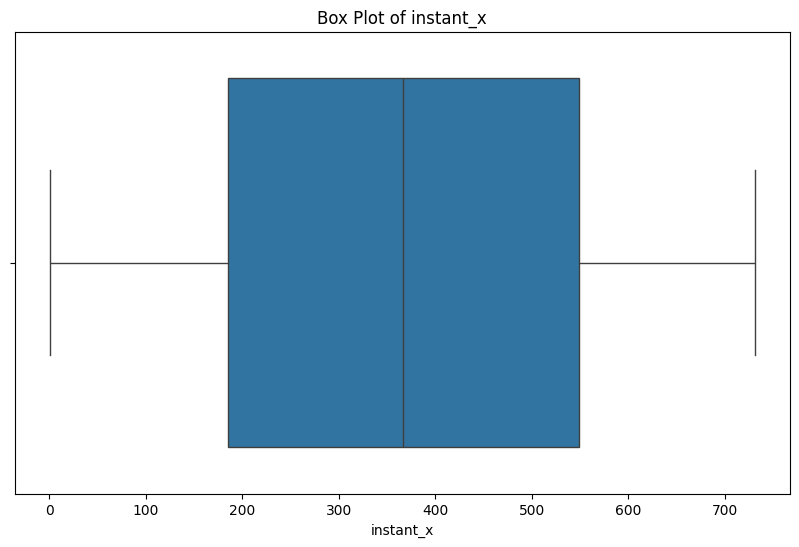

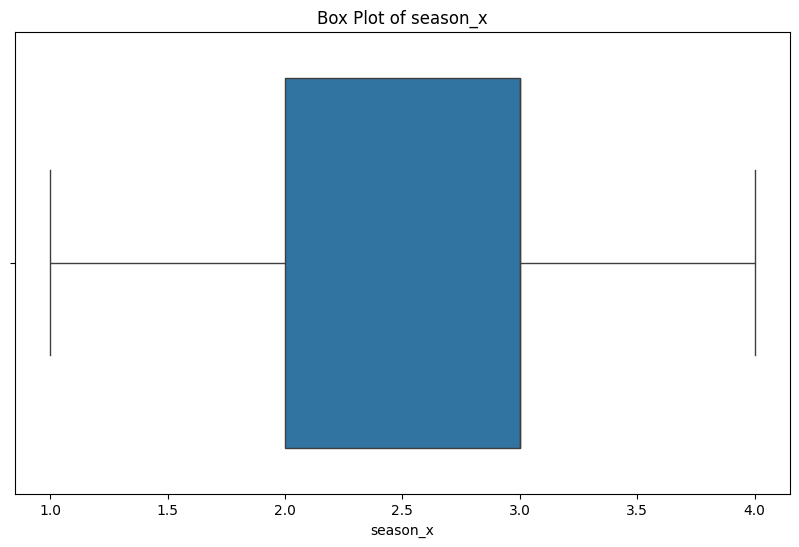

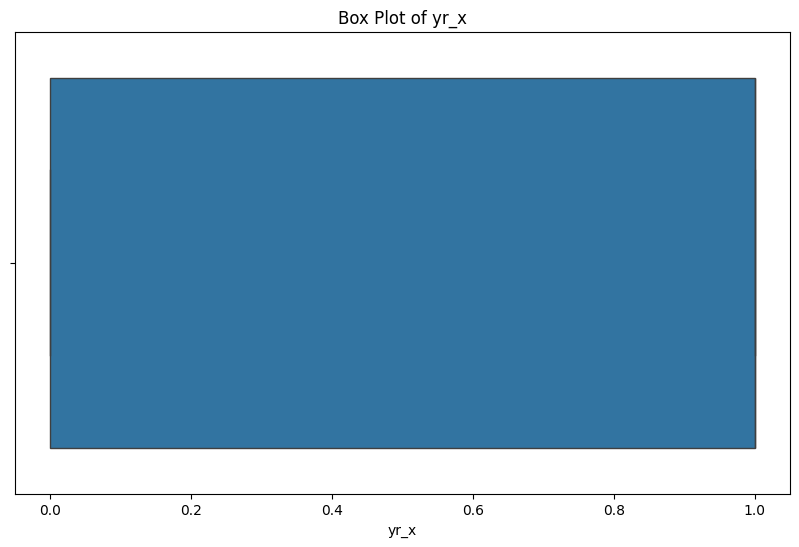

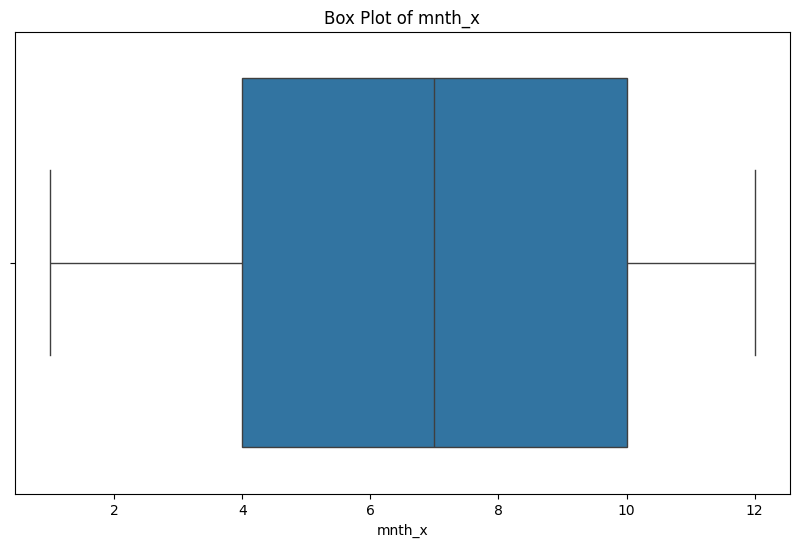

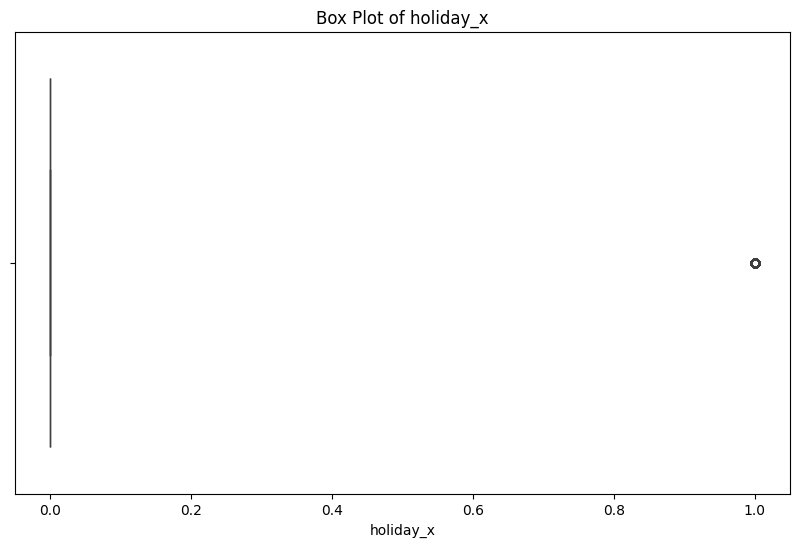

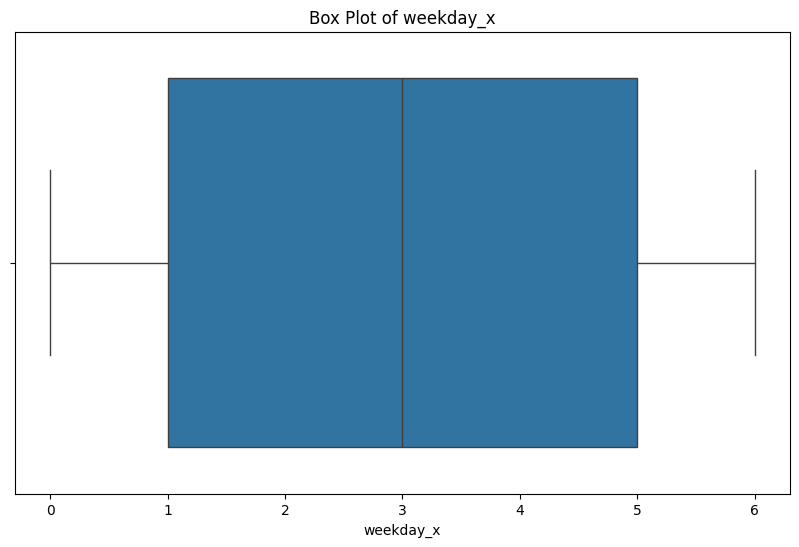

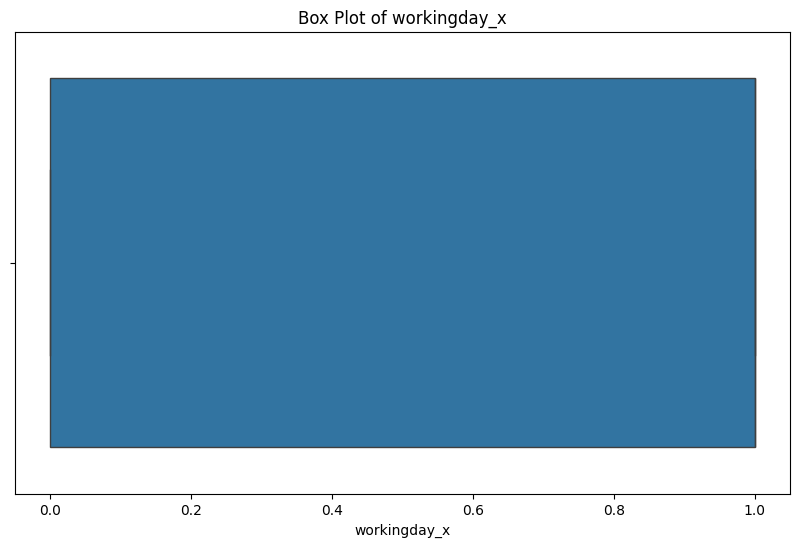

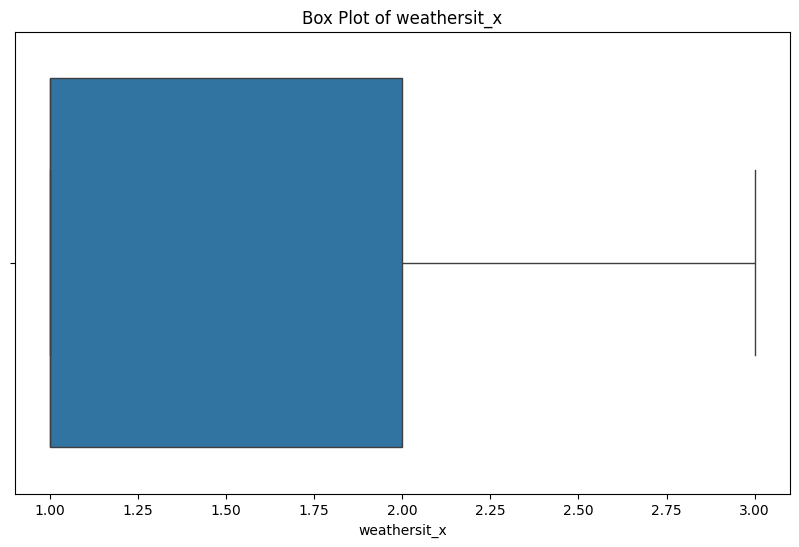

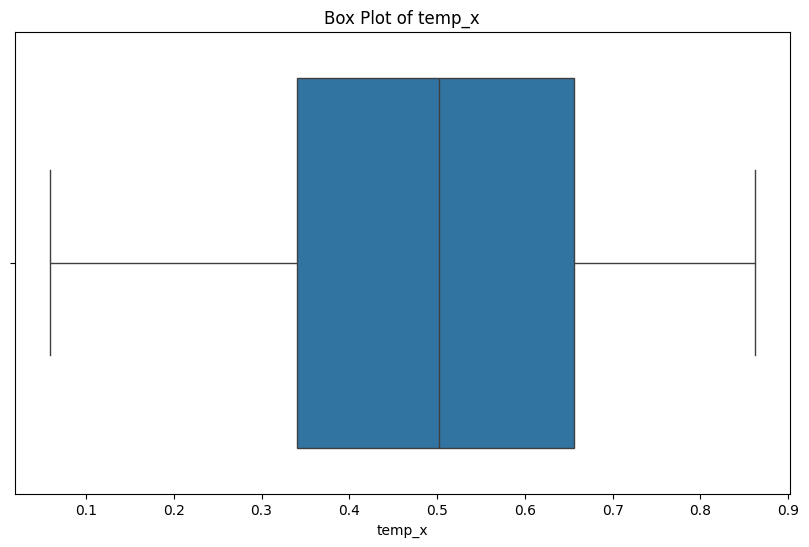

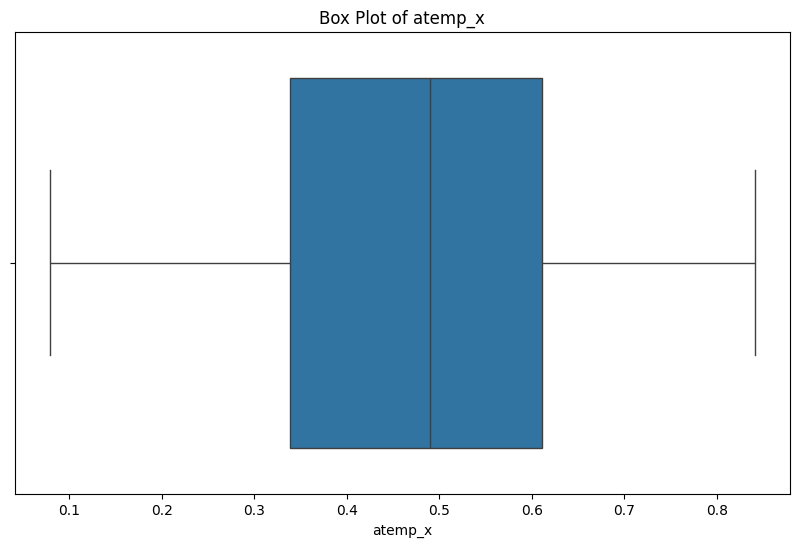

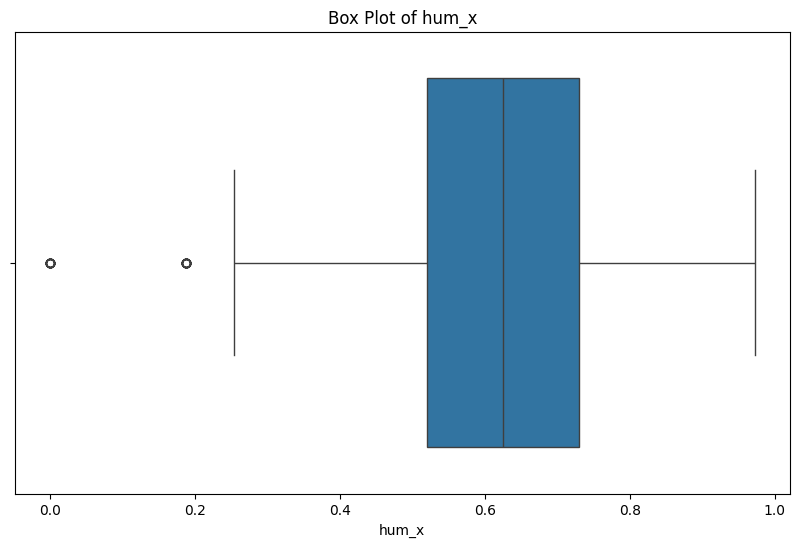

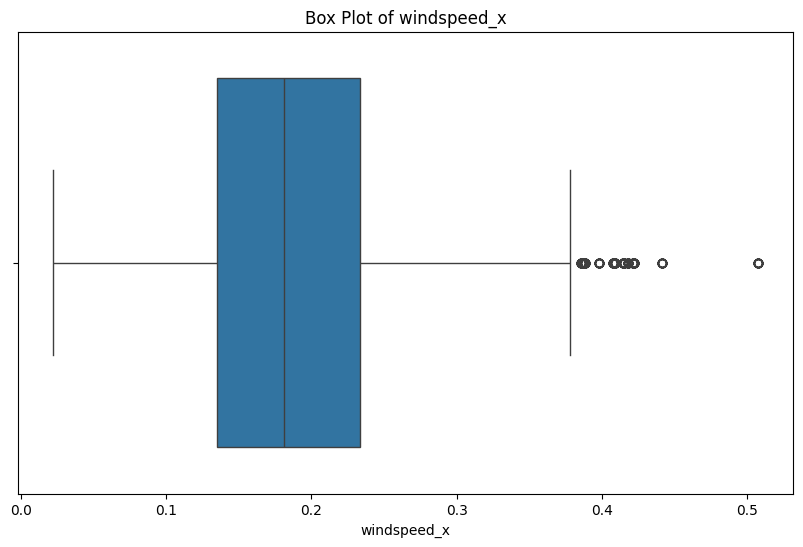

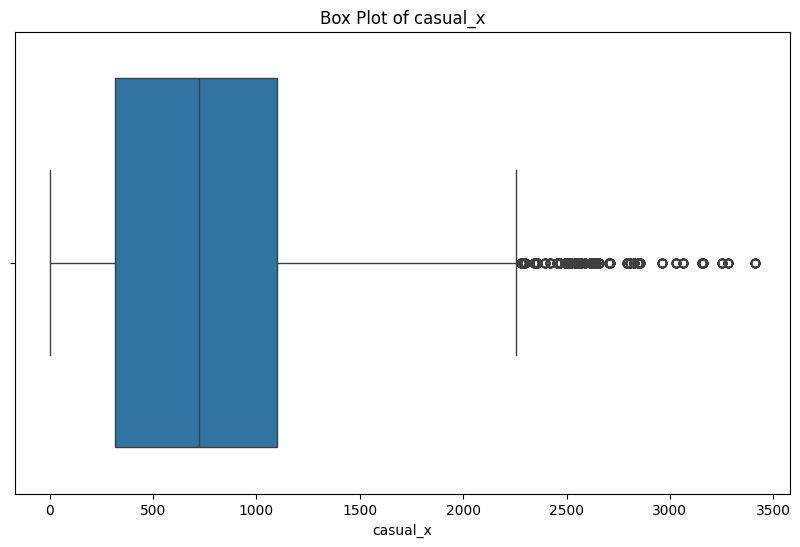

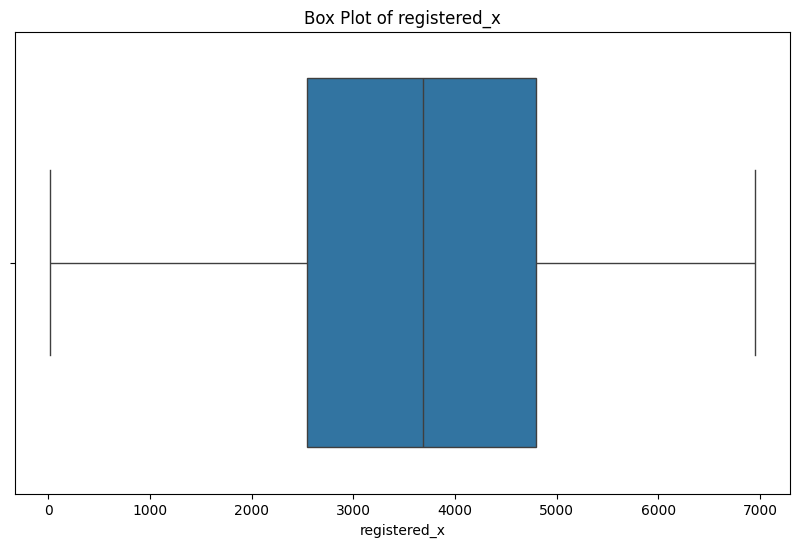

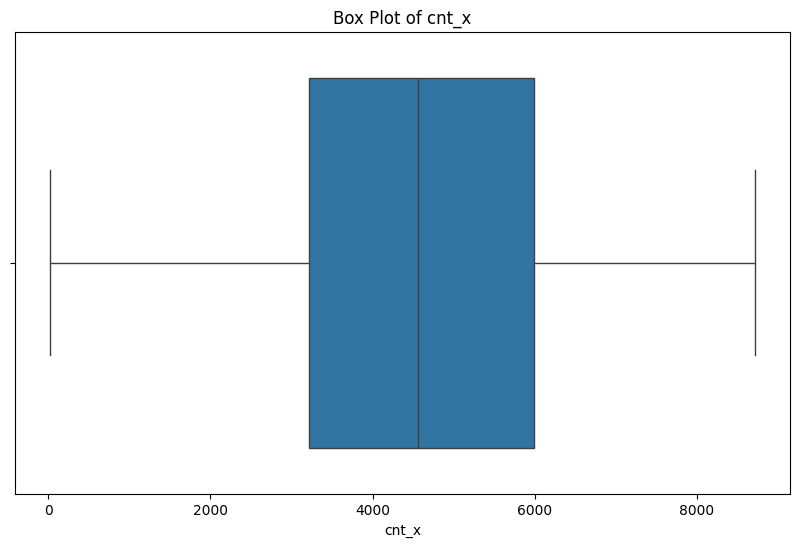

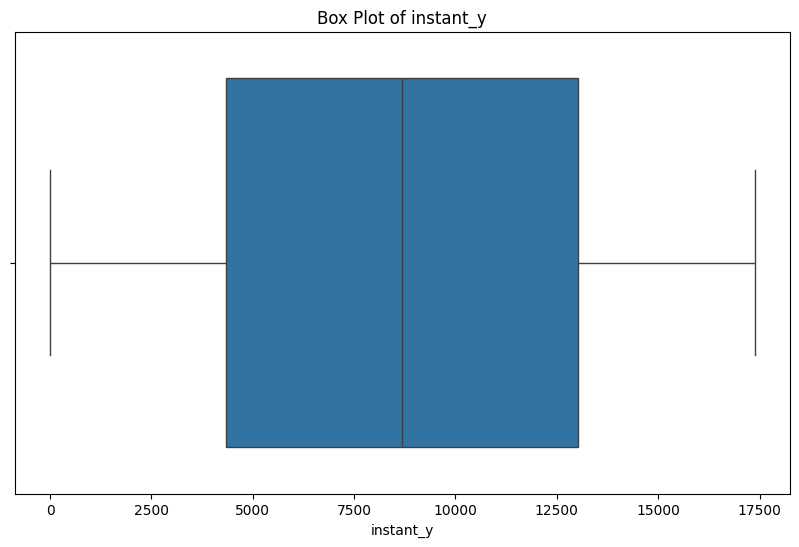

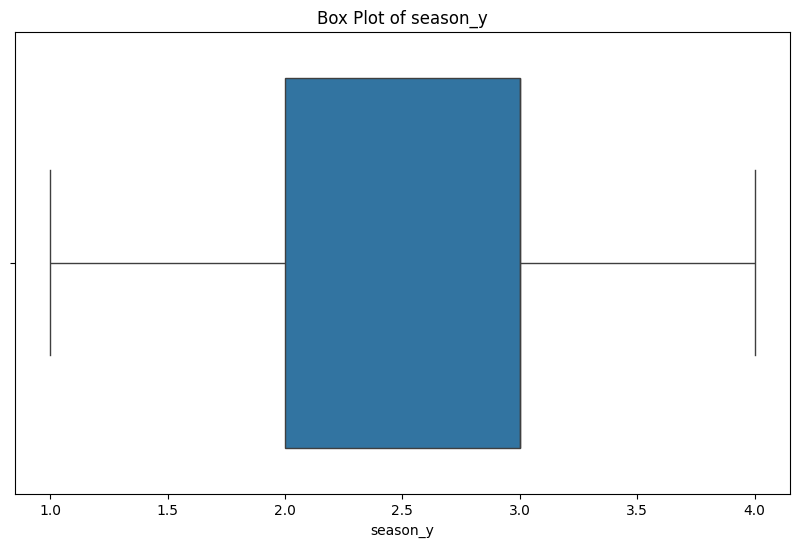

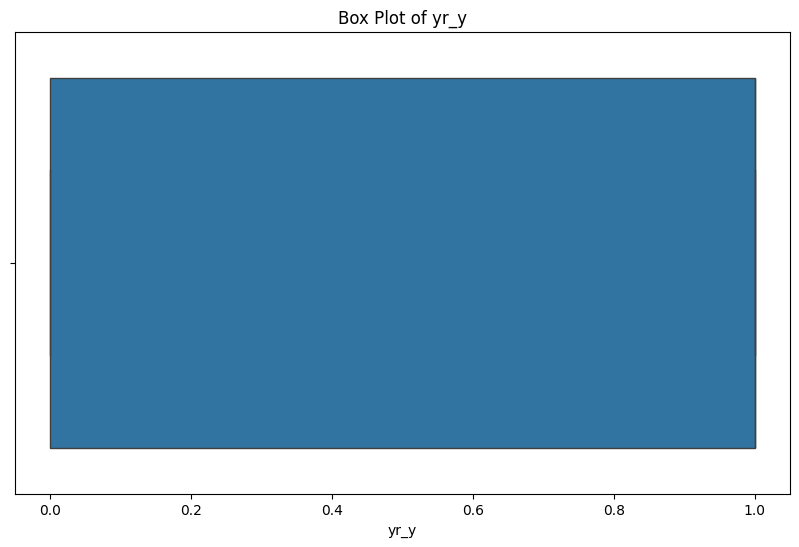

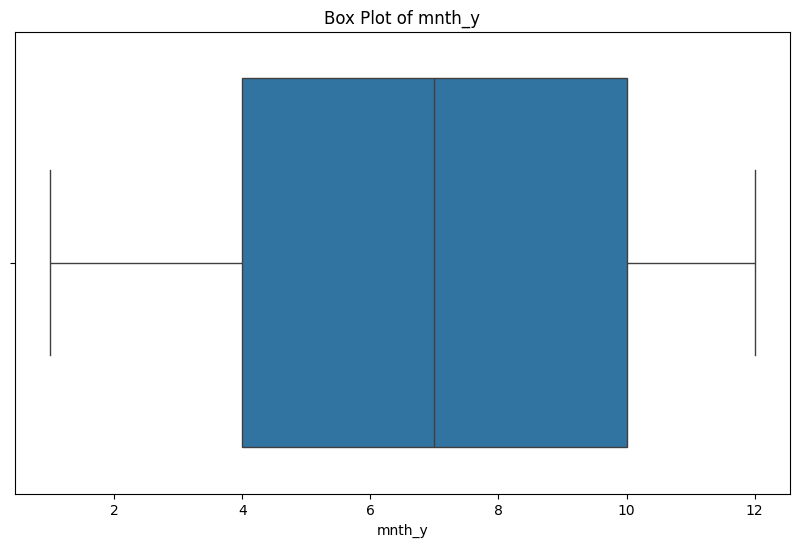

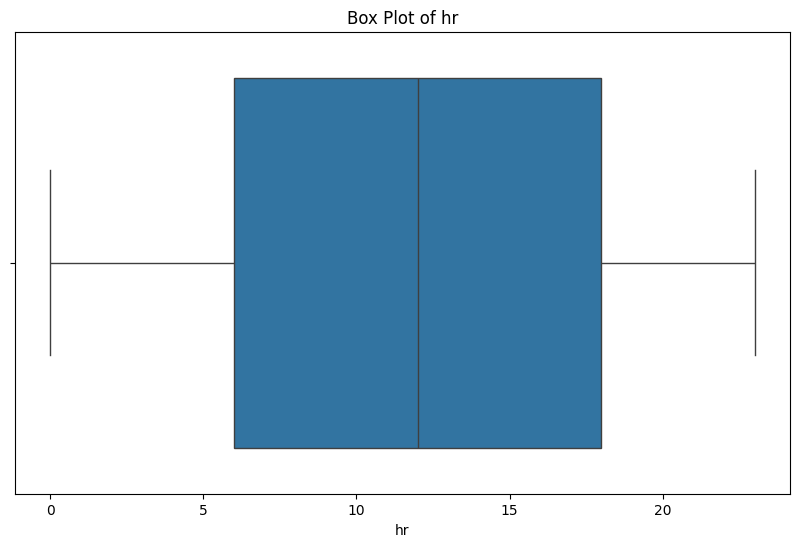

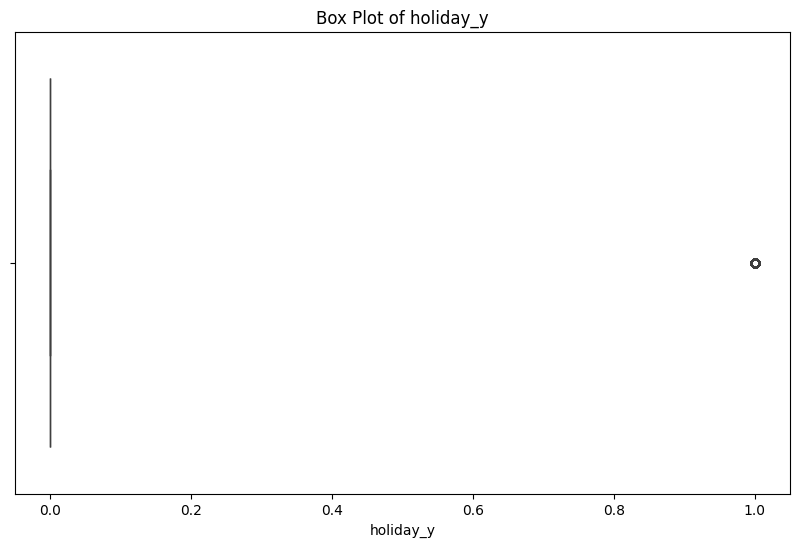

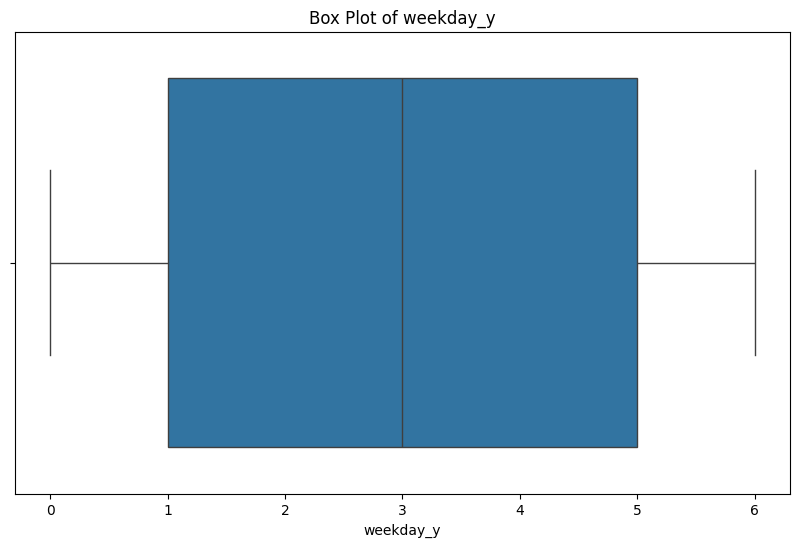

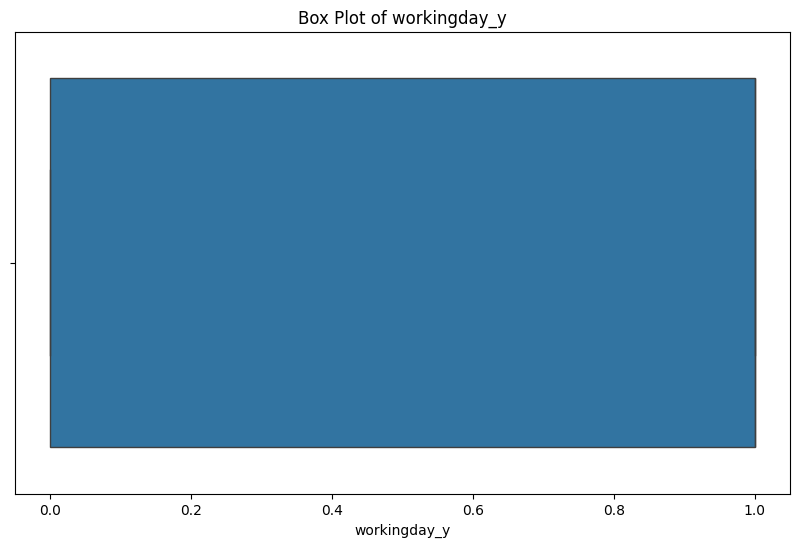

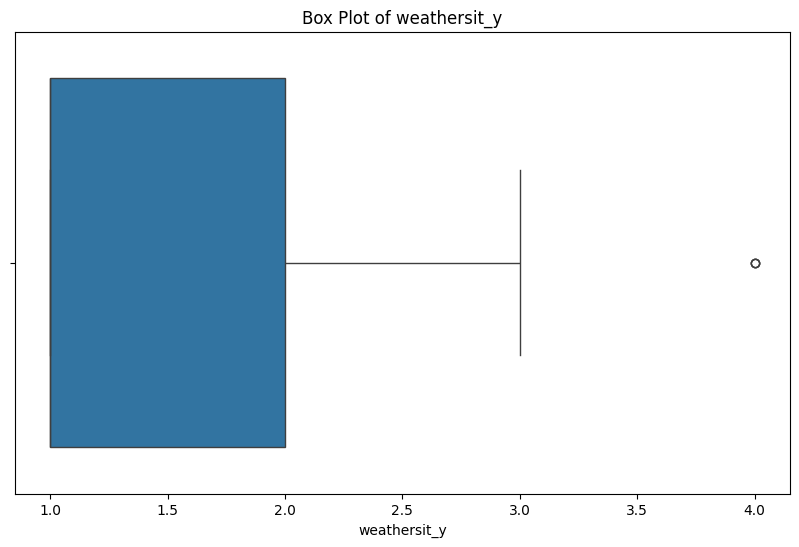

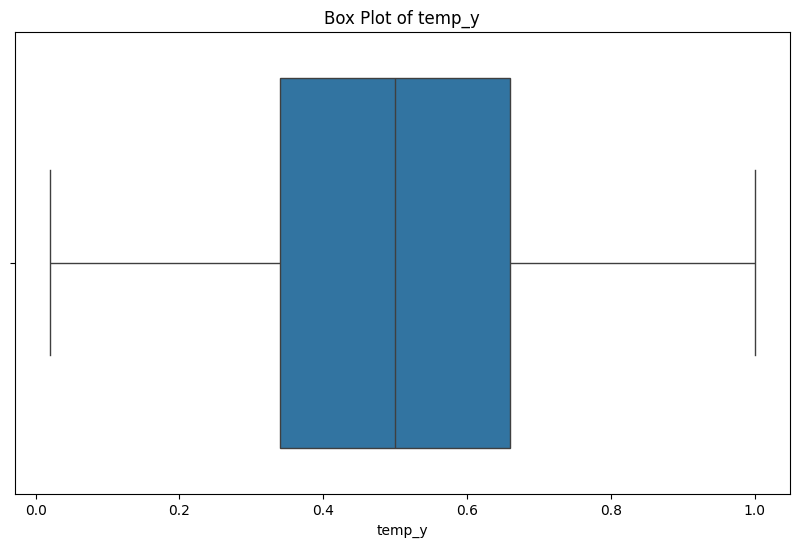

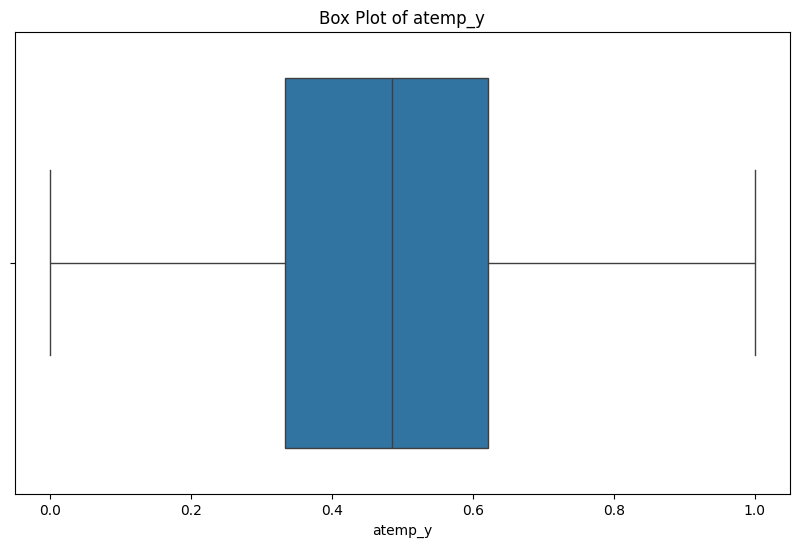

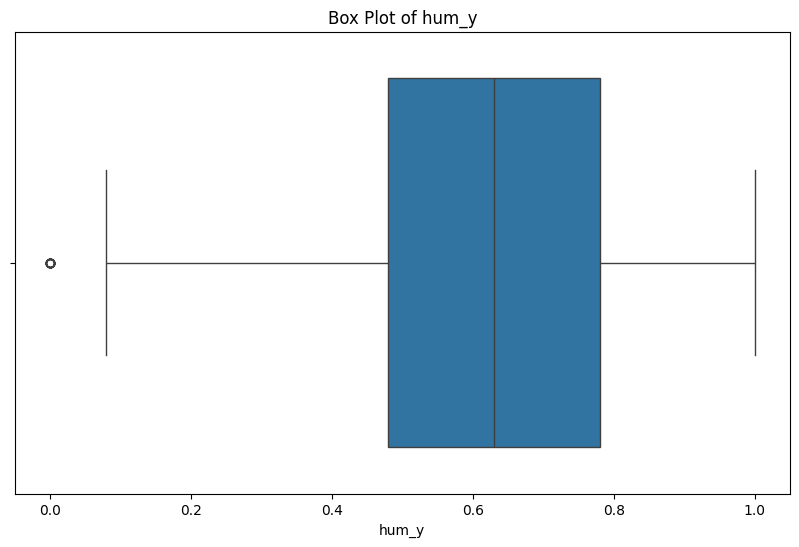

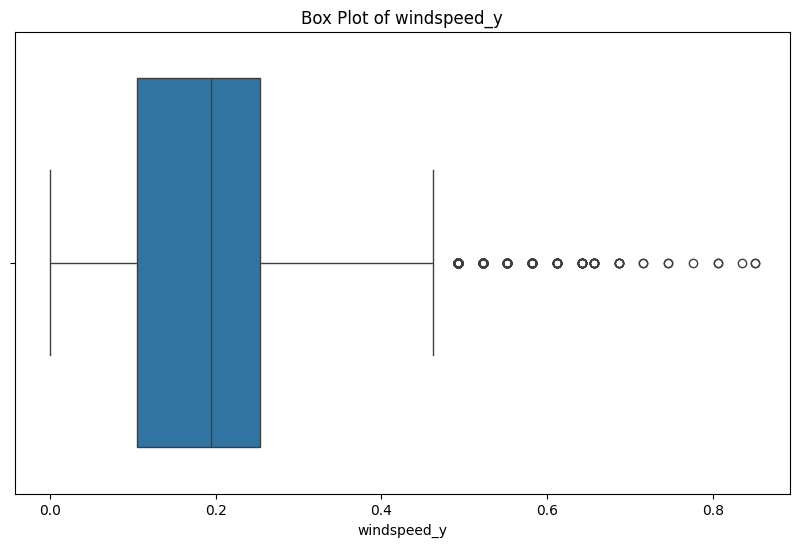

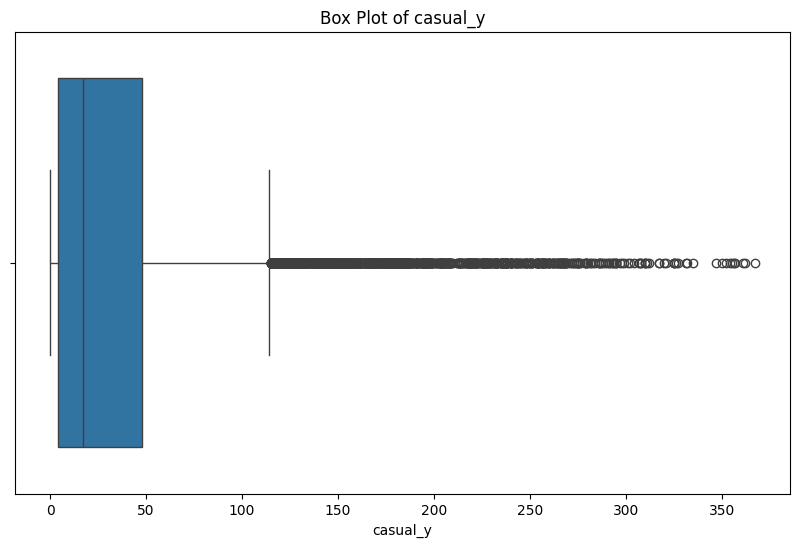

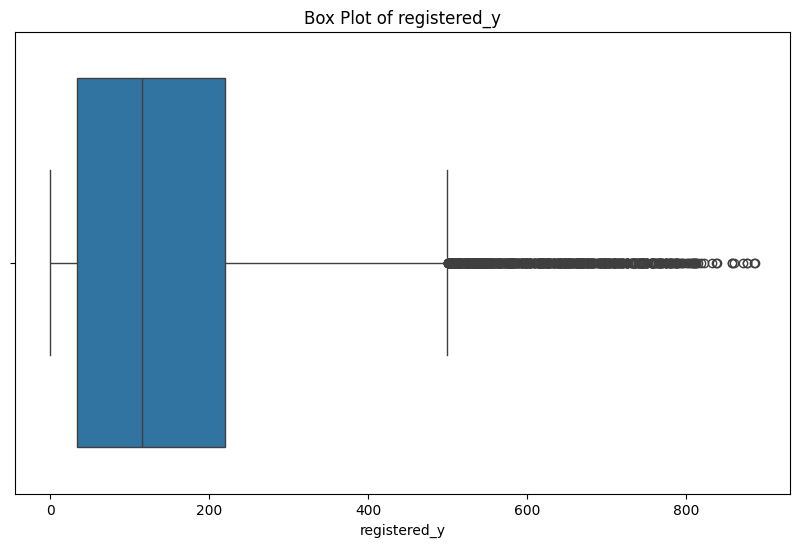

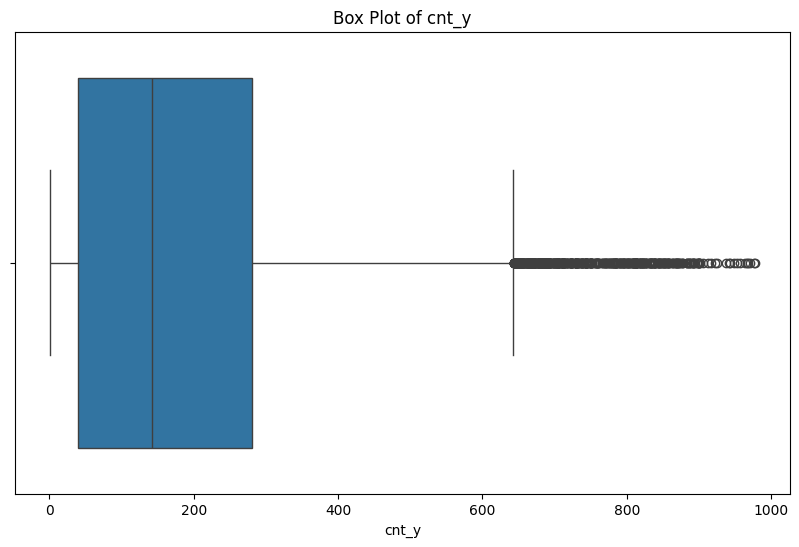

In [17]:
numeric_features = bike_df.select_dtypes(include=['number']).columns

for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=bike_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

### X & Y Synchronization

#### temp x vs temp y

``` empty dataframe```

sama semua ✓

In [18]:
avg_temp_y_per_day = bike_df.groupby('dteday')['temp_y'].mean()

comparison = bike_df.drop_duplicates(subset='dteday')[['dteday', 'temp_x']].set_index('dteday')
comparison['avg_temp_y'] = avg_temp_y_per_day

comparison['is_equal'] = comparison['temp_x'].round(6) == comparison['avg_temp_y'].round(6)

#print(comparison)
false_values = comparison[comparison['is_equal'] == False]
print(false_values)


Empty DataFrame
Columns: [temp_x, avg_temp_y, is_equal]
Index: []


#### atemp x vs atemp y

```ya ada yang kehitung beda tapi dikit```

sama semua ✓

In [19]:
avg_atemp_y_per_day = bike_df.groupby('dteday')['atemp_y'].mean()

comparison1 = bike_df.drop_duplicates(subset='dteday')[['dteday', 'atemp_x']].set_index('dteday')
comparison1['avg_atemp_y'] = avg_atemp_y_per_day

comparison1['is_equal'] = comparison1['atemp_x'].round(4) == comparison1['avg_atemp_y'].round(4)

#print(comparison)
false_values1 = comparison1[comparison1['is_equal'] == False]
print(false_values1)


            atemp_x  avg_atemp_y  is_equal
dteday                                    
2011-05-29  0.61555      0.61555     False
2011-06-07  0.65595      0.65595     False
2012-10-26  0.52275      0.52275     False


#### hum x vs hum y

```sama semua```

sama semua ✓

In [20]:
avg_hum_y_per_day = bike_df.groupby('dteday')['hum_y'].mean()

comparison2 = bike_df.drop_duplicates(subset='dteday')[['dteday','hum_x']].set_index('dteday')

comparison2['avg_hum_y'] = avg_hum_y_per_day
comparison2['is_equal'] = comparison2['hum_x'] == comparison2['avg_hum_y']
false_values2 = comparison2[comparison['is_equal'] == False]
print(false_values2)

Empty DataFrame
Columns: [hum_x, avg_hum_y, is_equal]
Index: []


#### windspeed x vs windspeed y

```beda dikit tapi isinya sama aja```

sama semua ✓

In [21]:
avg_windspeed_y_per_day = bike_df.groupby('dteday')['windspeed_y'].mean()

comparison3 = bike_df.drop_duplicates(subset = 'dteday')[['dteday', 'windspeed_x']].set_index('dteday')
comparison3['avg_windspeed_y'] = avg_windspeed_y_per_day

comparison3['is_equal'] = comparison3['windspeed_x'].round(5) == comparison3['avg_windspeed_y'].round(5)

#print(comparison)
false_values3 = comparison3[comparison3['is_equal'] == False]
#print(avg_windspeed_y_per_day)
#print(comparison3)
print(false_values3)

            windspeed_x  avg_windspeed_y  is_equal
dteday                                            
2011-01-18     0.146775         0.146775     False
2011-01-29     0.145365         0.145365     False
2011-02-10     0.221935         0.221935     False
2011-02-20     0.223235         0.223235     False
2011-04-20     0.241925         0.241925     False
2011-05-13     0.179725         0.179725     False
2011-09-22     0.128125         0.128125     False
2011-10-20     0.422275         0.422275     False
2011-12-26     0.239465         0.239465     False
2012-01-02     0.329665         0.329665     False
2012-07-12     0.146775         0.146775     False
2012-11-08     0.347835         0.347835     False
2012-11-14     0.199625         0.199625     False


#### cnt x vs cnt y

```Empty DataFrame```

sama semua ✓

In [22]:
total_cnt_y_per_day = bike_df.groupby('dteday')['cnt_y'].sum()

#membawa buat comparison cnt_x dan dteday
comparison4 = bike_df.drop_duplicates(subset = 'dteday')[['dteday', 'cnt_x']].set_index('dteday')

#membawa buat comparison sebagai tabel  baru bahwa dia adalah cnt_y summed up
comparison4['cnt_y'] = total_cnt_y_per_day

#membawa buat comparison sebagai 'is equal' perbandingan si cnt_y sama cnt_x
comparison4['is_equal'] = comparison4['cnt_x'] == comparison4['cnt_y']

#cari is equal yang false dan diprint
false_values4 = comparison4[comparison4['is_equal']== False]
print(false_values4)
#rint(comparison4)


Empty DataFrame
Columns: [cnt_x, cnt_y, is_equal]
Index: []


#### cnt_y vs casual + registrated

```
Empty DataFrame
```

In [23]:
total_casreg_per_day = bike_df.groupby('dteday')[['casual_y','registered_y']].sum().sum(axis=1)
#print(total_casreg_per_day)
#total_cnt_y_per_day

#comparison5 [dteday, cnt_y]
comparison5 = bike_df.drop_duplicates(subset='dteday')[['dteday']].set_index('dteday')
comparison5['cnt_y'] = total_cnt_y_per_day
comparison5['cas_y+reg_y'] = total_casreg_per_day

comparison5['is_equal'] = total_casreg_per_day == comparison5['cnt_y']

false_values5 = comparison5[comparison5['is_equal']== False]
print(false_values5)

Empty DataFrame
Columns: [cnt_y, cas_y+reg_y, is_equal]
Index: []


## Temp Assess and Check

**To-Do:**
- temperature bisa nggak 0 kalau secara relatif di celcius? **BISA, TAPI GA ADA DI DATA JADI AMAN**
- atemperature bisa nggak 0 kalau secara relatif di celcius? **BISA, TAPI GA ADA DI DATA JADI AMAN**
- atemp itu apa? **istilah yang menggambarkan bagaimana seseorang secara subjektif merasakan suhu di sekitarnya.**

In [26]:
#result_temp = bike_df[(bike_df['temp_y'] * 41) <= 14]
#result_temp = bike_df[(bike_df['temp_y'] * 41).between(14, 20, inclusive="left")]
#result_temp = bike_df[(bike_df['temp_y'] * 41).between(20, 27, inclusive = 'left')]
result_temp = bike_df[(bike_df['temp_y'] * 41) >= 27]





# Tampilkan kolom season_x dari hasil filter
# season_counts = result_temp['season_x'].value_counts()
# print(season_counts)

#season_group = result_temp.groupby('season_x').size()
#print(season_group)

#jam berapa

hours_group = result_temp.groupby('weathersit_y').size()
print(hours_group)


weathersit_y
1    3383
2     879
3     155
dtype: int64


/
season_x
temp_x
- cari di musim apa temperaturnya yang kurang dari 14 C? temp x

```
season_x
1    2888  
2     334  
4    1138
```  


- cari musim apa temperaturnya yang 14-20 C? temp x

```
season_x
1    1139  
2    1052  
3      24  
4    1896  
```

- cari musim apa yang 20-27?  

temp x

```
season_x
1     215
2    2303
3     957
4    1198
```

temp y

- cari musim apa yang lebih dari 27?

temp x


```
season_x
2     720
3    3515  
```
temp y

```
season_x
1	27
2	977
3	3278
4	135
```

- cari di jam berapa temperaturnya yang kurang dari 14 C? temp y


```
hr
0     225
1     238
2     237
3     231
4     239
5     264
6     268
7     268
8     255
9     234
10    210
11    179
12    156
13    135
14    121
15    121
16    122
17    137
18    153
19    171
20    184
21    195
22    211
23    216
```

- cari di jam berapa temperaturnya yang 14-20 C?

```
hr
0     155
1     151
2     152
3     148
4     143
5     146
6     150
7     146
8     140
9     137
10    131
11    146
12    155
13    158
14    157
15    153
16    154
17    151
18    147
19    143
20    147
21    148
22    142
23    159
```

- cari di jam berapa yang 20-27?

```
hr
0     205
1     211
2     208
3     211
4     216
5     217
6     221
7     201
8     181
9     184
10    183
11    171
12    167
13    178
14    182
15    176
16    174
17    171
18    178
19    185
20    193
21    209
22    210
23    201
```

cari di jam berapa yang lebih dari 27?

```
hr
0     141
1     124
2     118
3     107
4      99
5      90
6      86
7     112
8     151
9     172
10    203
11    231
12    250
13    258
14    269
15    279
16    280
17    271
18    250
19    229
20    204
21    176
22    165
23    152
```


In [27]:
#result_temp = bike_df[(bike_df['temp_y'] * 41) <= 14]
#result_temp = bike_df[(bike_df['temp_y'] * 41).between(14, 20, inclusive="left")]
#result_temp = bike_df[(bike_df['temp_y'] * 41).between(20, 27, inclusive = 'left')]
#result_temp = bike_df[(bike_df['temp_y'] * 41) >= 27]

avg_temp_y_per_day = bike_df.groupby('dteday')['atemp_y'].mean()



#tampilkan kolom season_x dari hasil filter
season_counts = result_temp['season_x'].value_counts()
print(season_counts)

#season_group = result_temp.groupby('season_x').size()
#print(season_group)

#jam berapa
#hours_group = result_temp.groupby('weathersit_y').size()
#print(hours_group)


season_x
3    3278
2     977
4     135
1      27
Name: count, dtype: int64


## Atemp Assess and Check

### cari di musim apa temperatur-feelingnya atemp_y yang 0 C? di musim apa? anomali bukan?

```bukan anomali, datanya kosong```

In [28]:
result_atempx0 = bike_df[(bike_df['atemp_x'] * 50) <= 0]
season_countsx0 = result_atempx0['season_x'].value_counts()

#ini juga bisa
#season_ax0 = atemp_x0.groupby('season_x').size()
season_countsx0
result_atempx0

Empty DataFrame
Columns: [instant_x, dteday, season_x, yr_x, mnth_x, holiday_x, weekday_x, workingday_x, weathersit_x, temp_x, atemp_x, hum_x, windspeed_x, casual_x, registered_x, cnt_x, instant_y, season_y, yr_y, mnth_y, hr, holiday_y, weekday_y, workingday_y, weathersit_y, temp_y, atemp_y, hum_y, windspeed_y, casual_y, registered_y, cnt_y]
Index: []

[0 rows x 32 columns]

In [29]:
result_atempy0 = bike_df[(bike_df['atemp_y'] * 50) <= 0]
season_countsy0 = result_atempy0['season_x'].value_counts()
print(season_countsy0)
#result_atempy0

#atemp_y0 = bike_df[(bike_df['atemp_y']*50) <=0]
#season_ay0 = atemp_y0.groupby('season_y').size()
#print(season_ay0)

season_x
1    2
Name: count, dtype: int64


### cari di musim apa temperatur-feelingnya yang kurang dari 17 C?

```paling banyak ada di 1:spring & 4: winter```

In [30]:
result_atempx1 = bike_df[(bike_df['atemp_x']*50) <= 17]
season_countsx1 = result_atempx1['season_x'].value_counts()
season_countsx1

season_x
1    2840
4    1162
2     380
3      24
Name: count, dtype: int64

In [31]:
result_atempy1 = bike_df[(bike_df['atemp_y']*50) <= 17]
season_countsy1 =result_atempy1['season_x'].value_counts()
print(season_countsy1)

season_x
1    2983
4    1260
2     495
3      24
Name: count, dtype: int64


### cari musim apa temperatur-feelingnya yang 17-25 C?

```paling banyak di 4: winter, 2: summer, 1: spring```

In [32]:
result_atempx2 = bike_df[(bike_df['atemp_x']*50).between(17, 25, inclusive = 'left')]
#season_countsx2 = result_atempx2.groupby('season_x').size()
#print(season_countsx2)

season_countsx2 = result_atempx2['season_x'].value_counts()
print(season_countsx2)

season_x
4    1943
2    1294
1    1187
3      72
Name: count, dtype: int64


In [33]:
result_atempy2 = bike_df[(bike_df['atemp_y']*50).between(17, 25, inclusive = 'left')]
season_countsy2 = result_atempy2['season_x'].value_counts()
print(season_countsy2)

season_x
4    1845
2    1162
1    1022
3      93
Name: count, dtype: int64


### cari musim apa yang temperatur-feelingnya 25-31?

```paling banyak 2: Summer dan 3: Fall```

In [34]:
result_atempx3 = bike_df[(bike_df['atemp_x']*50).between(25, 31, inclusive='left')]
#season_countsx3 = result_atempx3['season_x'].value_counts()
#print(season_countsx3)

season_countsx3_2 = result_atempx3.groupby('season_x').size()
print(season_countsx3_2)

season_x
1     215
2    2087
3    1053
4    1127
dtype: int64


In [35]:
result_atempy3 = bike_df[(bike_df['atemp_y']*50).between(25, 31, inclusive='left')]
season_countsy3 = result_atempy3.groupby('season_x').size()
print(season_countsy3)

season_x
1     164
2    1542
3    1223
4     875
dtype: int64


### cari musim apa yang temperatur-feelingnya lebih dari 31?

```paling banyak 3: Fall dan 2: Summer```


In [36]:
result_atempx4 = bike_df[(bike_df['atemp_x']*50) >= 31]
season_countsx4 = result_atempx4.groupby('season_x').size()
print(season_countsx4)

season_x
2     648
3    3347
dtype: int64


In [37]:
result_atempy4 = bike_df[(bike_df['atemp_y']*50) >= 31]
season_countsy4 = result_atempy4.groupby('season_y').size()
print(season_countsy4)

season_y
1      73
2    1210
3    3156
4     252
dtype: int64


### cari di jam berapa temperatur-feelingnya yang kurang dari 17 C?

```malam sampe pagi```

In [38]:
result_hatempy0 = bike_df[(bike_df['atemp_y']*50 <= 17)]
hours_y0 = result_hatempy0.groupby('hr').size()
print(hours_y0)

hr
0     220
1     231
2     234
3     227
4     229
5     255
6     264
7     264
8     253
9     235
10    216
11    186
12    168
13    144
14    130
15    130
16    131
17    138
18    157
19    164
20    182
21    192
22    202
23    210
dtype: int64


### cari di jam berapa  temperatur-feelingnya yang 17-25 C?

```rata-rata```

In [39]:
result_hatempy1 = bike_df[(bike_df['atemp_y']*50).between(17, 25, inclusive='left')]
hours_y1 = result_hatempy1.groupby('hr').size()
print(hours_y1)

hr
0     176
1     176
2     175
3     181
4     179
5     185
6     181
7     171
8     162
9     162
10    148
11    157
12    159
13    173
14    175
15    165
16    169
17    171
18    163
19    177
20    174
21    178
22    181
23    184
dtype: int64


### cari di jam berapa  yang temperatur-feelingnya 25-31?

In [40]:
result_hatempy2 = bike_df[(bike_df['atemp_y']*50).between(25, 31, inclusive='left')]
hours_y2 = result_hatempy2.groupby('hr').size()
print(hours_y2)

hr
0     190
1     195
2     198
3     196
4     207
5     205
6     210
7     193
8     168
9     151
10    148
11    127
12    119
13    110
14    109
15    113
16    112
17    125
18    128
19    140
20    148
21    163
22    171
23    178
dtype: int64


### cari di jam berapa yang temperatur-feelingnya lebih dari 31?

In [41]:
result_hatempy3 = bike_df[(bike_df['atemp_y']*50 >= 31)]
hours_y3 = result_hatempy3.groupby('hr').size()
print(hours_y3)

hr
0     140
1     122
2     108
3      93
4      82
5      72
6      70
7      99
8     144
9     179
10    215
11    257
12    282
13    302
14    315
15    321
16    318
17    296
18    280
19    247
20    224
21    195
22    174
23    156
dtype: int64


### cari hubungan temp_y vs temp_x

```
sangat berbanding lurus
```


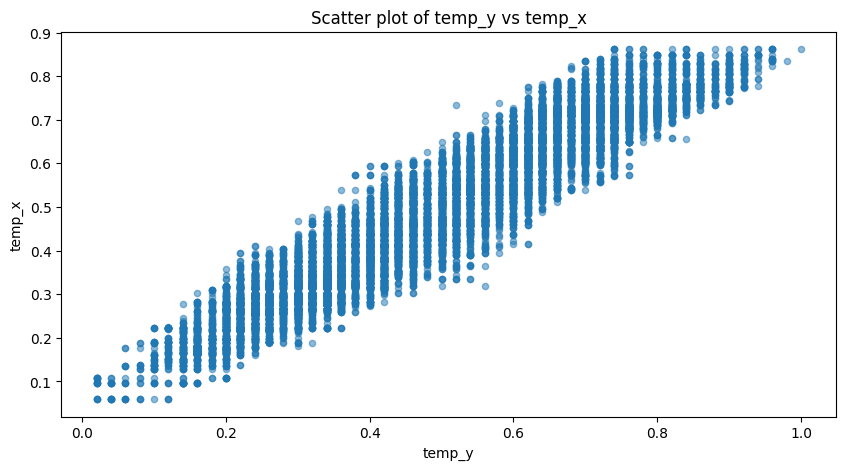

In [42]:
plt.figure(figsize=(10,5))

bike_df.plot(x='temp_y', y='temp_x', kind='scatter',
             title='Scatter plot of temp_y vs temp_x', alpha=0.5,
             ax=plt.gca())
xlabel='temp_y'
ylabel='temp_x'
plt.show()

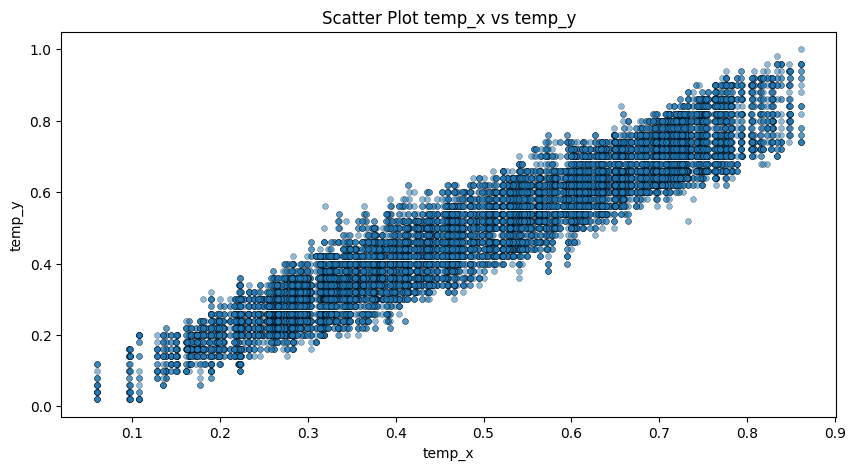

In [43]:
# Scatter plot dengan Seaborn
plt.figure(figsize=(10, 5))
sns.scatterplot(data=bike_df, x='temp_x', y='temp_y', alpha=0.5,
                s=18, edgecolor='black') # s untuk ukuran titik lebih kecil

plt.title('Scatter Plot temp_x vs temp_y')
plt.show()

### cari hubungan atemp_y vs atemp_x

```
sangat berbanding lurus
```


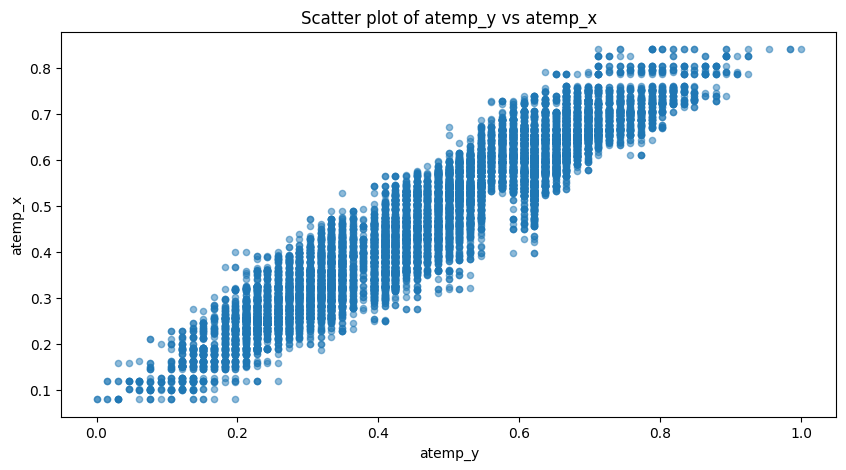

In [44]:
plt.figure(figsize=(10,5))

bike_df.plot(x='atemp_y', y='atemp_x', kind='scatter',
             title='Scatter plot of atemp_y vs atemp_x', alpha=0.5,
             ax=plt.gca())
xlabel='atemp_y'
ylabel='atemp_x'
plt.show()

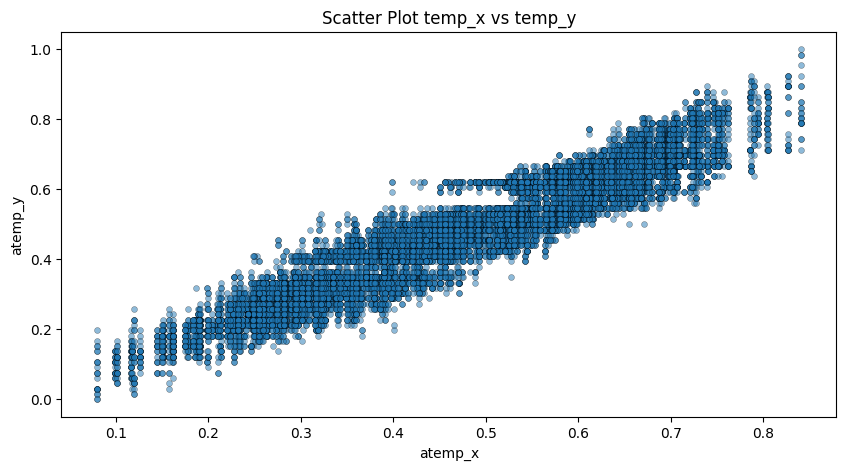

In [45]:
# Scatter plot dengan Seaborn
plt.figure(figsize=(10, 5))
sns.scatterplot(data=bike_df, x='atemp_x', y='atemp_y', alpha=0.5,
                s=18, edgecolor='black') # s untuk ukuran titik lebih kecil

plt.title('Scatter Plot temp_x vs temp_y')
plt.show()

## Hum Assess and Check

### satuan kelembaban dalam RH
```
tidak bisa 0%

bisa 100%

```


### kelembaban tertinggi di musim apa?

```
winter
```

In [46]:
hum_max = bike_df[bike_df['hum_x']==bike_df['hum_x'].max()]
hum_max_season =hum_max.groupby('season_x').size()
print(hum_max_season)

season_x
4    24
dtype: int64


In [47]:
hum_maxy = bike_df[bike_df['hum_y'] == bike_df['hum_y'].max()]
hum_max_seasony =hum_maxy.groupby('season_x').size()
print(hum_max_seasony)

season_x
1    67
2    86
3    24
4    93
dtype: int64


### kelembaban terendah di musim apa

```
spring
```

In [48]:
hum_minx = bike_df[bike_df['hum_x']==bike_df['hum_x'].min()]
hum_min_seasonx = hum_minx.groupby('season_x').size()
print(hum_min_seasonx)
hum_minx[['season_x', 'hum_x']]

season_x
1    22
dtype: int64


season_x  hum_x
1551         1    0.0
1552         1    0.0
1553         1    0.0
1554         1    0.0
1555         1    0.0
1556         1    0.0
1557         1    0.0
1558         1    0.0
1559         1    0.0
1560         1    0.0
1561         1    0.0
1562         1    0.0
1563         1    0.0
1564         1    0.0
1565         1    0.0
1566         1    0.0
1567         1    0.0
1568         1    0.0
1569         1    0.0
1570         1    0.0
1571         1    0.0
1572         1    0.0

### cari di musim apa kelembaban yang kurang dari 52%?

```
1. spring, 2. summer, 3. fall, 4. winter
```

In [49]:
result_humx0 = bike_df[(bike_df['hum_x']*100) <= 52]
season_hcountsx0 = result_humx0['season_x'].value_counts()
season_hcountsx0

season_x
1    1678
2    1268
3     864
4     575
Name: count, dtype: int64

In [50]:
result_humy0 = bike_df[(bike_df['hum_y']*100) <= 52]
season_hcountsy0 = result_humy0['season_x'].value_counts()
season_hcountsy0

season_x
1    1867
2    1475
3    1338
4    1056
Name: count, dtype: int64

### cari musim apa kelembaban yang 52-63?

```
3. fall, 4. winter, 1. spring, 2. summer
```

In [51]:
result_humx1 = bike_df[(bike_df['hum_x']*100).between(52, 63, inclusive='left')]
season_hcountsx1 = result_humx1['season_x'].value_counts()
season_hcountsx1

season_x
3    1313
4    1151
1    1111
2     864
Name: count, dtype: int64

In [52]:
result_humy1 = bike_df[(bike_df['hum_y']*100).between(52, 63, inclusive='left')]
season_hcountsy1 = result_humy1['season_x'].value_counts()
season_hcountsy1

season_x
3    851
4    828
1    808
2    730
Name: count, dtype: int64

### cari musim apa yang kelembaban 63-73?

```
3. fall, 4. winter, 2. summer, 1. spring
```

In [53]:
result_humx2 = bike_df[(bike_df['hum_x']*100).between(63, 73, inclusive='left')]
season_hcountsx2 = result_humx2['season_x'].value_counts()
season_hcountsx2

season_x
3    1439
4    1296
2     959
1     571
Name: count, dtype: int64

In [54]:
result_humy2 = bike_df[(bike_df['hum_y']*100).between(63, 73, inclusive='left')]
season_hcountsy2 = result_humy2['season_x'].value_counts()
season_hcountsy2

season_x
3    759
4    734
2    594
1    576
Name: count, dtype: int64

### cari musim apa yang kelembaban > 73?

```
2. summer, 4. winter, 3. fall, 1. spring
4. winter, 2. summer, 3. fall, 1. spring
```

In [55]:
result_humx3 = bike_df[(bike_df['hum_x']*100) >= 73]
season_hcountsx3 = result_humx3['season_x'].value_counts()
season_hcountsx3

season_x
2    1342
4    1210
3     904
1     882
Name: count, dtype: int64

In [56]:
result_humy3 = bike_df[(bike_df['hum_y']*100) >= 73]
season_hcountsy3 = result_humy3['season_x'].value_counts()
season_hcountsy3

season_x
4    1691
2    1663
3    1646
1    1075
Name: count, dtype: int64

### apakah kelembaban 97 itu anomali?

```
sepertinya tidak
```

In [57]:
print(bike_df[bike_df['hum_y']*100 == 97])

      instant_x      dteday  season_x  yr_x  mnth_x  holiday_x  weekday_x  \
5941        253  2011-09-10         3     0       9          0          6   

      workingday_x  weathersit_x  temp_x  ...  weekday_y  workingday_y  \
5941             0             1    0.66  ...          6             0   

      weathersit_y  temp_y  atemp_y  hum_y  windspeed_y  casual_y  \
5941             2     0.6      0.5   0.97       0.1045        18   

      registered_y  cnt_y  
5941            46     64  

[1 rows x 32 columns]


In [58]:
hrhum = bike_df[bike_df['dteday']=='2011-09-10']
hrhum[['hr','hum_y']]

hr  hum_y
5939   0   0.94
5940   1   0.94
5941   2   0.97
5942   3   1.00
5943   4   0.94
5944   5   0.94
5945   6   0.94
5946   7   0.88
5947   8   0.83
5948   9   0.78
5949  10   0.65
5950  11   0.62
5951  12   0.62
5952  13   0.55
5953  14   0.55
5954  15   0.55
5955  16   0.55
5956  17   0.55
5957  18   0.58
5958  19   0.58
5959  20   0.69
5960  21   0.78
5961  22   0.78
5962  23   0.88

### kelembaban tertinggi di jam berapa?

```
sekitar jam 6-7
```

In [59]:
hrmax = bike_df[bike_df['hum_y'] == bike_df['hum_y'].max()]
hrmax[['hum_y','hr']].groupby('hr').size().sort_values(ascending=False)


hr
7     22
6     21
4     20
5     18
1     18
2     17
3     16
8     14
0     13
9     11
21    11
10     9
22     9
17     8
12     8
14     8
13     8
23     8
20     7
15     6
18     6
16     5
11     4
19     3
dtype: int64

### kelembaban terrendah di jam berapa?

```
kelembaban terendah itu anomali

tanggal: 2011-03-10
season: 1 (spring)
jam: 0-23
```

In [60]:
hrmin = bike_df[bike_df['hum_y'] == bike_df['hum_y'].min()]
hrmin[['hum_y','hr']].groupby('hr').size().sort_values(ascending=False)

hr
0     1
1     1
22    1
21    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
12    1
11    1
10    1
9     1
8     1
7     1
6     1
5     1
2     1
23    1
dtype: int64

In [61]:
hrmin[['dteday', 'hum_y', 'season_x', 'hr']]

dteday  hum_y  season_x  hr
1551  2011-03-10    0.0         1   0
1552  2011-03-10    0.0         1   1
1553  2011-03-10    0.0         1   2
1554  2011-03-10    0.0         1   5
1555  2011-03-10    0.0         1   6
1556  2011-03-10    0.0         1   7
1557  2011-03-10    0.0         1   8
1558  2011-03-10    0.0         1   9
1559  2011-03-10    0.0         1  10
1560  2011-03-10    0.0         1  11
1561  2011-03-10    0.0         1  12
1562  2011-03-10    0.0         1  13
1563  2011-03-10    0.0         1  14
1564  2011-03-10    0.0         1  15
1565  2011-03-10    0.0         1  16
1566  2011-03-10    0.0         1  17
1567  2011-03-10    0.0         1  18
1568  2011-03-10    0.0         1  19
1569  2011-03-10    0.0         1  20
1570  2011-03-10    0.0         1  21
1571  2011-03-10    0.0         1  22
1572  2011-03-10    0.0         1  23

### cari di jam berapa kelembaban yang kurang dari 52%?

```
merata tapi paling banyak di sore hari jam 13-17
```

In [62]:
result_humy0 = bike_df[(bike_df['hum_y']*100) <= 52]
season_hcountsy0 = result_humy0['hr'].value_counts()
season_hcountsy0

hr
15    471
16    463
14    462
13    443
17    426
12    386
18    376
11    329
19    318
20    267
10    254
21    218
22    191
9     168
23    156
0     127
1     111
8     108
2      95
7      81
3      75
6      74
5      71
4      66
Name: count, dtype: int64

### cari di jam berapa kelembaban 52 - 63%?

```
merata

```

In [63]:
result_humy1 = bike_df[(bike_df['hum_y']*100).between(52, 63, inclusive='left')]
season_hcountsy1 = result_humy1['hr'].value_counts()
season_hcountsy1

hr
10    168
9     165
21    165
20    164
12    163
19    163
11    162
18    152
22    150
23    147
1     136
8     135
13    135
0     134
14    124
2     120
17    120
15    115
7     112
16    108
3     106
6      95
5      90
4      88
Name: count, dtype: int64

### cari di jam berapa kelembaban 63 - 73%?

```
malem - pagi banyak, sore dikit

```

In [64]:
result_humy2 = bike_df[(bike_df['hum_y']*100).between(63, 73, inclusive='left')]
season_hcountsy2 = result_humy2['hr'].value_counts()
season_hcountsy2

hr
0     148
2     142
4     141
8     141
9     140
1     138
10    137
7     137
3     133
22    132
23    132
6     129
21    127
5     127
11    111
20    108
19    102
18     79
17     79
12     68
16     60
15     51
13     51
14     50
Name: count, dtype: int64

### cari di jam berapa yang kelembaban > 73%?

```
malem - pagi banyak, sore dikit

```

In [65]:
result_humy1 = bike_df[(bike_df['hum_y']*100) >= 73]
season_hcountsy1 = result_humy1['hr'].value_counts()
season_hcountsy1

hr
6     435
5     432
4     406
7     405
3     390
2     370
1     354
8     351
0     329
23    307
9     272
22    271
21    237
20    202
10    193
19    166
11    146
18    132
12    123
17    118
13    114
16    111
14    108
15    103
Name: count, dtype: int64

### graphs hum

<Figure size 1500x500 with 0 Axes>

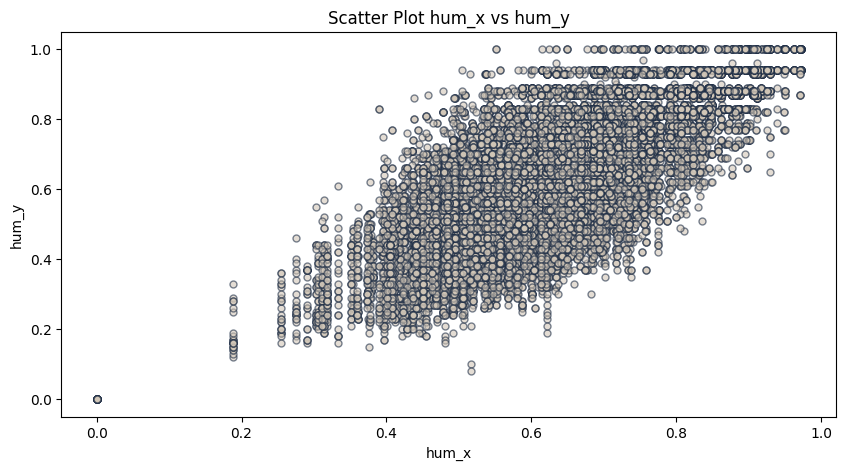

In [66]:
plt.figure(figsize = (15, 5), facecolor='black')
bike_df.plot(x = 'hum_x', y = 'hum_y', kind = 'scatter', figsize= (10,5), 
             s = 25, color= '#d2c7b8', alpha=0.6, edgecolor='#223148', 
             facecolor='black', title='Scatter Plot hum_x vs hum_y')

xlabel='hum_x'
ylabel='hum_y'

plt.show()

Text(0.5, 1.0, 'Scatter Plot hum_x vs hum_y')

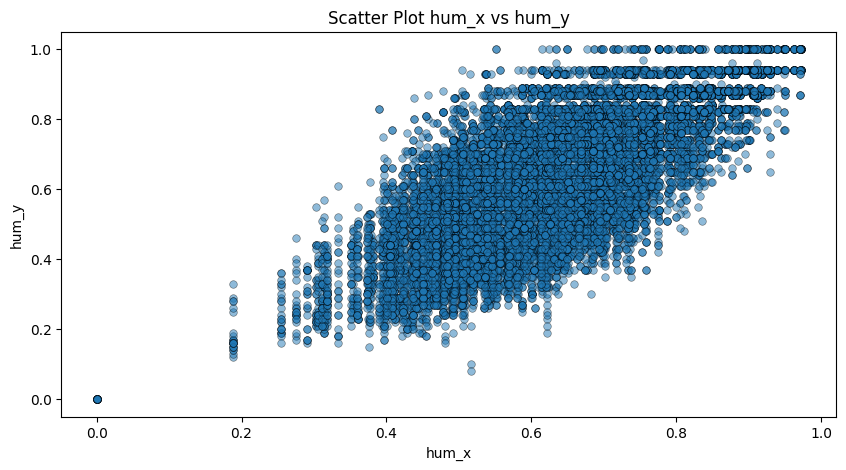

In [67]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=bike_df, x='hum_x', y='hum_y', alpha=0.5, s=30, edgecolor='black')

plt.title("Scatter Plot hum_x vs hum_y")

## Windspeed Asses and Check

### satuan kecepatan angin dalam m/s



### test nilai

In [68]:
a = 0.190098*67
b = 0.000000*67  
c = 0.104500*67   
d = 0.194000*67   
e = 0.253700*67   
f = 0.850700*67

print(a, b, c, d, e, f)

12.736566 0.0 7.0015 12.998000000000001 16.997899999999998 56.996900000000004


### kecepatan angin tertinggi di musim apa?

```
di musim 1 yaitu spring, tanggal 2011-02-19, dengan windspeed x 0.507463, dan windspeed y 0.7463, di jam 15. 
To do: cek windspeed rata-rata.
```

```
di musim 3 yaitu fall, tanggal 2011-07-03, dengan windspeed y, 0.8507, di jam 17 dan 18 sepertinya ada badai.
To do: cek peristiwa
```

In [69]:
windmax = bike_df[bike_df["windspeed_x"]==bike_df["windspeed_x"].max()]
windmax [["season_x", "windspeed_x"]].groupby('season_x').size()
windmax[["dteday", "windspeed_x", "windspeed_y", "hr"]]

dteday  windspeed_x  windspeed_y  hr
1110  2011-02-19     0.507463       0.4925   0
1111  2011-02-19     0.507463       0.4179   1
1112  2011-02-19     0.507463       0.3881   2
1113  2011-02-19     0.507463       0.2985   3
1114  2011-02-19     0.507463       0.3284   4
1115  2011-02-19     0.507463       0.3284   5
1116  2011-02-19     0.507463       0.4179   6
1117  2011-02-19     0.507463       0.5224   7
1118  2011-02-19     0.507463       0.5821   8
1119  2011-02-19     0.507463       0.6567   9
1120  2011-02-19     0.507463       0.5821  10
1121  2011-02-19     0.507463       0.5821  11
1122  2011-02-19     0.507463       0.4925  12
1123  2011-02-19     0.507463       0.6119  13
1124  2011-02-19     0.507463       0.6567  14
1125  2011-02-19     0.507463       0.7463  15
1126  2011-02-19     0.507463       0.6418  16
1127  2011-02-19     0.507463       0.6119  17
1128  2011-02-19     0.507463       0.4478  18
1129  2011-02-19     0.507463       0.3582  19
1130  2011-02-19     0.507463       0.5224  20
1131  2011-02-19     0.507463       0.5522  21
1132  2011-02-19     0.507463       0.4925  22
1133  2011-02-19     0.507463       0.4478  23

In [70]:
windmaxy = bike_df[bike_df["windspeed_y"]==bike_df["windspeed_y"].max()]
windmaxy [["season_x", "windspeed_y"]].groupby('season_x').size()

windmaxy[["dteday","season_x", "windspeed_y", "hr"]]

dteday  season_x  windspeed_y  hr
4315  2011-07-03         3       0.8507  17
4316  2011-07-03         3       0.8507  18

### kecepatan angin terrendah di musim apa?

```
emangnya bisa windspeed 0? apa bukan anomali? 
To do: cari windspeed rata-rata
```

```
windspeed_x minimum ada di season 4 (winter), tanggal 2011-10-07, windspeed_x nya 0.022392, windspeed_y banyak 0.0000 nya, anomali apa bukan?
```

```
windspeed_y 0.0000/minimum paling banyak di season 4 (winter), tapi merata di season lain juga. jadi windspeed 0.0000 bukan anomali 
```

In [71]:
windmin = bike_df[bike_df["windspeed_x"]==bike_df["windspeed_x"].min()]
windmin.groupby("season_x").size()

windmin[["dteday", "season_x", "windspeed_x", "windspeed_y", "hr"]]

dteday  season_x  windspeed_x  windspeed_y  hr
6586  2011-10-07         4     0.022392       0.0000   0
6587  2011-10-07         4     0.022392       0.0000   1
6588  2011-10-07         4     0.022392       0.0000   2
6589  2011-10-07         4     0.022392       0.0000   3
6590  2011-10-07         4     0.022392       0.1045   4
6591  2011-10-07         4     0.022392       0.0000   5
6592  2011-10-07         4     0.022392       0.0000   6
6593  2011-10-07         4     0.022392       0.0000   7
6594  2011-10-07         4     0.022392       0.0000   8
6595  2011-10-07         4     0.022392       0.0000   9
6596  2011-10-07         4     0.022392       0.0896  10
6597  2011-10-07         4     0.022392       0.0000  11
6598  2011-10-07         4     0.022392       0.0000  12
6599  2011-10-07         4     0.022392       0.0000  13
6600  2011-10-07         4     0.022392       0.0000  14
6601  2011-10-07         4     0.022392       0.0000  15
6602  2011-10-07         4     0.022392       0.0000  16
6603  2011-10-07         4     0.022392       0.2537  17
6604  2011-10-07         4     0.022392       0.0896  18
6605  2011-10-07         4     0.022392       0.0000  19
6606  2011-10-07         4     0.022392       0.0000  20
6607  2011-10-07         4     0.022392       0.0000  21
6608  2011-10-07         4     0.022392       0.0000  22
6609  2011-10-07         4     0.022392       0.0000  23

In [72]:
windminy = bike_df[bike_df["windspeed_y"]==bike_df["windspeed_y"].min()]
windminy.groupby("season_x").size()

#windminy[["dteday", "season_x", "windspeed_x", "windspeed_y", "hr"]]

season_x
1    437
2    397
3    633
4    713
dtype: int64

### cari di musim apa kecepatan angin yang kurang dari 2 m/s?

```
season 4 (winter), tapi di bagian windspeed_y cukup merata dan urutannya 4312
```

In [73]:
result_windx1 = bike_df[(bike_df['windspeed_x']*67) <= 2]
season_countsx1 = result_windx1['season_x'].value_counts()
season_countsx1

season_x
4    24
Name: count, dtype: int64

In [74]:
result_windy1 = bike_df[(bike_df['windspeed_y']*67) <= 2]
season_countsy1 = result_windy1['season_x'].value_counts()
season_countsy1

season_x
4    713
3    633
1    437
2    397
Name: count, dtype: int64

### cari musim apa yang kecepatan angin 2-7 m/s?

```
untuk windspeed_x dari paling banyak: season 4312 (max: 1032)
untuk windspeed_y dari paling banyak: season 4312 (max: 405)
```

In [75]:
result_windx2 = bike_df[(bike_df["windspeed_x"]*67).between(2, 7, inclusive='left')]
season_countsx2 = result_windx2["season_x"].value_counts()
season_countsx2


season_x
4    1032
3     551
1     235
2     192
Name: count, dtype: int64

In [76]:
result_windy2 = bike_df[(bike_df["windspeed_y"]*67).between(2, 7, inclusive='left')]
season_countsy2 = result_windy2["season_x"].value_counts()
season_countsy2

season_x
4    405
3    380
1    331
2    309
Name: count, dtype: int64

### cari musim apa yang kecepatan angin 7-12?

```
merata
untuk windspeed_x dari paling banyak: season 3241 (max 2208, sisanya 1000an)
untuk windspeed_y dari paling banyak: season 3421 (max 1457)
```

In [77]:
result_windx3 = bike_df[(bike_df["windspeed_x"]*67).between(7, 12, inclusive='left')]
season_countsx3 = result_windx3["season_x"].value_counts()
season_countsx3

season_x
3    2208
2    1680
4    1414
1    1226
Name: count, dtype: int64

In [78]:
result_windy3 = bike_df[(bike_df["windspeed_y"]*67).between(7, 12, inclusive='left')]
season_countsy3 = result_windy3["season_x"].value_counts()
season_countsy3

season_x
3    1457
4    1250
2    1241
1    1102
Name: count, dtype: int64

### cari musim apa yang kecepatan angin 12-16?

```
merata
untuk windspeed_x dari paling banyak: season 1234 (max: 1492)
untuk windspeed_y dari paling banyak: season 2341 (max: 893)
```

In [79]:
result_windx4 = bike_df[(bike_df["windspeed_x"]*67).between(12, 16, inclusive='left')]
season_countsx4 = result_windx4["season_x"].value_counts()
season_countsx4

season_x
1    1492
2    1317
3    1175
4     971
Name: count, dtype: int64

In [80]:
result_windy4 = bike_df[(bike_df["windspeed_y"]*67).between(12, 16, inclusive='left')]
season_countsy4 = result_windy4["season_x"].value_counts()
season_countsy4

season_x
2    893
3    882
4    713
1    682
Name: count, dtype: int64

### cari musim apa yang kecepatan angin 16-56?

```
merata
untuk windspeed_x dari paling banyak: season 1243 (max: 1289)
untuk windspeed_y dari paling banyak: season 1243 (max: 1290)
```

In [81]:
result_windx5 = bike_df[(bike_df["windspeed_x"]*67).between(16, 56, inclusive='left')]
season_countsx5 = result_windx5["season_x"].value_counts()
season_countsx5

season_x
1    1289
2    1220
4     791
3     562
Name: count, dtype: int64

In [82]:
result_windy5 = bike_df[(bike_df["windspeed_y"]*67).between(16, 56, inclusive='left')]
season_countsy5 = result_windy5["season_x"].value_counts()
season_countsy5

season_x
1    1690
2    1569
4    1151
3    1142
Name: count, dtype: int64

### cari musim apa yang kecepatan angin lebih dari 56?

```
merata
untuk windspeed_x dari paling banyak: -
untuk windspeed_y dari paling banyak: season 3, ada 2 entry yaitu ketika ada badai
```

In [83]:
result_windx4 = bike_df[bike_df['windspeed_x']*67 >= 56]
season_countsx4 = result_windx4['season_x'].value_counts()
season_countsx4

Series([], Name: count, dtype: int64)

In [84]:
result_windy4 = bike_df[bike_df['windspeed_y']*67 >= 56]
season_countsy4 = result_windy4['season_x'].value_counts()
season_countsy4

season_x
3    2
Name: count, dtype: int64

### kecepatan angin tertinggi di jam berapa?

```
ada di jam 17-18
```

In [85]:
windmaxhr = bike_df[bike_df["windspeed_y"]==bike_df['windspeed_y'].max()]
windmaxhrcounts = windmaxhr["hr"].value_counts()
windmaxhrcounts

hr
17    1
18    1
Name: count, dtype: int64

### kecepatan angin terendah di jam berapa?

```
mulai jam 22 sampai jam 9 pagi itu umum gada angin
sisanya dibawah 100 untuk jumlah perjamnya
```

In [86]:
windminhr = bike_df[bike_df["windspeed_y"]==bike_df['windspeed_y'].min()]
windminhrcounts = windminhr["hr"].value_counts()
windminhrcounts

hr
2     138
3     129
5     122
1     122
6     116
0     115
4     111
7     109
8     103
9     103
22    102
23    102
21     87
12     87
10     85
13     79
15     72
11     71
20     62
17     58
14     58
16     55
19     53
18     41
Name: count, dtype: int64

### cari di jam berapa kecepatan angin yang kurang dari 2 m/s?

```
mulai jam 22 sampai jam 9 pagi
sisanya dibawah 100 untuk jumlah perjamnya
```

In [87]:
result_windhr1 = bike_df[(bike_df['windspeed_y']*67) <= 2]
countshr1 = result_windhr1['hr'].value_counts()
countshr1

hr
2     138
3     129
5     122
1     122
6     116
0     115
4     111
7     109
8     103
9     103
22    102
23    102
21     87
12     87
10     85
13     79
15     72
11     71
20     62
17     58
14     58
16     55
19     53
18     41
Name: count, dtype: int64

### cari di jam berapa kecepatan angin yang 2-7 m/s?


```
mulai jam 21 sampai jam 9 pagi
sisanya dibawah 55 untuk jumlah perjamnya
```

In [88]:
result_windhr2 = bike_df[(bike_df['windspeed_y']*67).between(2, 7, inclusive='left')]
windhrcounts2 = result_windhr2['hr'].value_counts()
windhrcounts2

hr
23    99
5     91
4     91
6     86
1     85
3     83
0     76
2     75
22    73
8     63
9     62
7     59
21    56
11    55
10    54
20    48
12    43
18    43
19    41
14    38
13    36
15    24
16    22
17    22
Name: count, dtype: int64

### cari di jam berapa yang kecepatan angin 7-12?

``` 
mulai jam 19 sampai jam 8 pagi
sisanya dibawah 200 untuk jumlah perjamnya
```

In [89]:
result_windhr3 = bike_df[(bike_df['windspeed_y']*67).between(7, 12, inclusive='left')]
windhrcounts3 = result_windhr3['hr'].value_counts()
windhrcounts3

hr
6     255
4     251
7     251
21    247
0     244
20    241
1     241
5     241
3     233
22    232
8     231
23    231
2     230
19    221
11    195
18    192
9     189
10    186
12    170
17    166
13    155
15    151
16    151
14    146
Name: count, dtype: int64

### cari di jam berapa yang kecepatan angin 12-16?

``` 
mulai jam 16 sampai jam 21
sisanya dibawah 146 untuk jumlah perjamnya
```


In [90]:
result_windhr4 = bike_df[(bike_df['windspeed_y']*67).between(12, 16, inclusive='left')]
windhrcounts4 = result_windhr4['hr'].value_counts()
windhrcounts4

hr
20    162
17    157
21    154
18    153
16    150
19    147
14    145
7     141
13    138
11    135
22    132
12    129
5     128
10    126
9     125
0     125
23    125
1     124
8     123
15    120
2     119
3     112
4     103
6      97
Name: count, dtype: int64

### cari di jam berapa yang kecepatan angin 16-56?

```  
mulai jam 8 sampai jam 20
sisanya dibawah 200 untuk jumlah perjamnya
```


In [91]:
#tempwindhr5 = bike_df[bike_df["season_x"]==4]
#result_windhr5 = tempwindhr5[(bike_df['windspeed_y']*67).between(16, 56)]

result_windhr5 = bike_df[(bike_df['windspeed_y']*67).between(16, 56)]
windhrcounts5 = result_windhr5['hr'].value_counts()
windhrcounts5

hr
15    362
16    352
14    342
17    326
13    321
12    299
18    298
10    276
11    271
19    266
9     248
20    215
8     207
22    189
21    184
23    171
6     171
7     167
0     166
2     153
1     152
4     141
3     140
5     135
Name: count, dtype: int64

### cari di jam berapa yang kecepatan angin lebih dari 56?
```
jam 17 - 18 itu di tanggal 2011-07-03
```

In [92]:
result_windhr6 = bike_df[bike_df['windspeed_y']*67 >= 56]
windhrcounts6 = result_windhr6 ['hr'].value_counts()
windhrcounts6
result_windhr6[['dteday', 'hr']]

dteday  hr
4315  2011-07-03  17
4316  2011-07-03  18

### cari hubungan windspeed_x dan windspeed_y dengan weathersit_y

```
yang paling banyak distribusinya yaitu weathersit_y 1 (Clear) > 2 (Mist + Cloudy) > 3 (Light Snow) > 4 (Heavy Rain)
```

<Figure size 640x480 with 0 Axes>

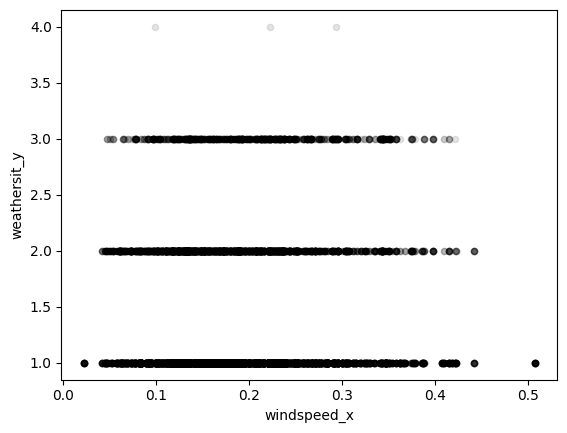

In [93]:
plt.figure()
bike_df.plot(x='windspeed_x', y='weathersit_y', kind='scatter', alpha=0.1, color='black')
plt.show()

<Figure size 640x480 with 0 Axes>

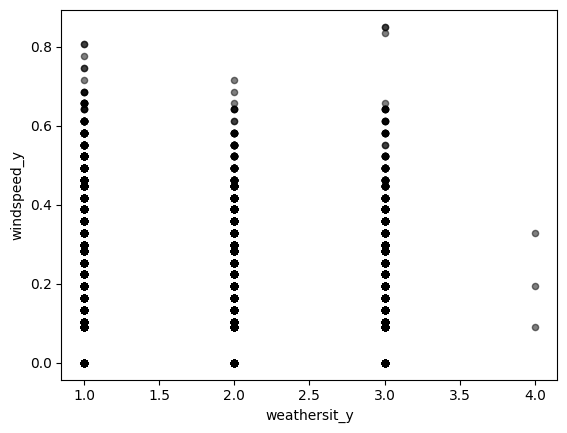

In [94]:
plt.figure()
bike_df.plot(y='windspeed_y', x='weathersit_y', kind='scatter', alpha=0.5, color='black')
plt.show()

### cari hubungan windspeed_x dan windspeed_y dengan temp_y

```
windspeed_x dan windspeed_y kesebar di berbagai macam temperatur, tapi paling banyak di tengah-tengah temp_y
```

<Figure size 640x480 with 0 Axes>

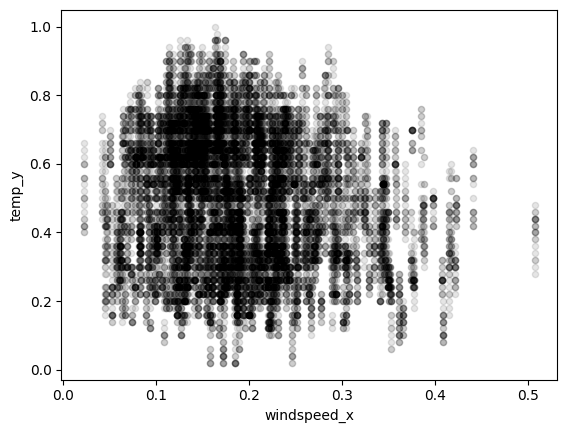

In [95]:
plt.figure()
bike_df.plot(x='windspeed_x', y='temp_y', kind='scatter', alpha=0.1, color='black')
plt.show()

<Figure size 640x480 with 0 Axes>

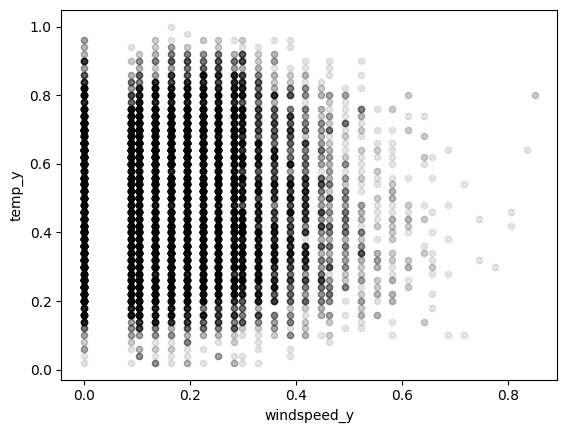

In [96]:
plt.figure()
bike_df.plot(x='windspeed_y', y='temp_y', kind='scatter', alpha=0.1, color='black')
plt.show()

### cari hubungan windspeed_x dan windspeed_y dengan atemp_y

```
windspeed_x dan windspeed_y kesebar di berbagai macam temperatur feeling, tapi paling banyak di tengah-tengah temp_y
```

<Figure size 640x480 with 0 Axes>

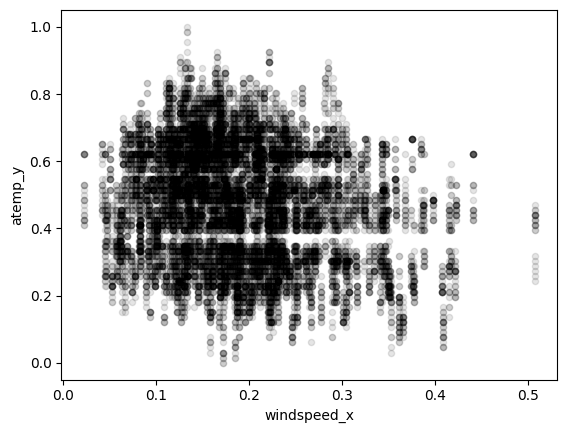

In [97]:
plt.figure()
bike_df.plot(x='windspeed_x', y='atemp_y', kind='scatter', alpha=0.1, color='black')
plt.show()

<Figure size 640x480 with 0 Axes>

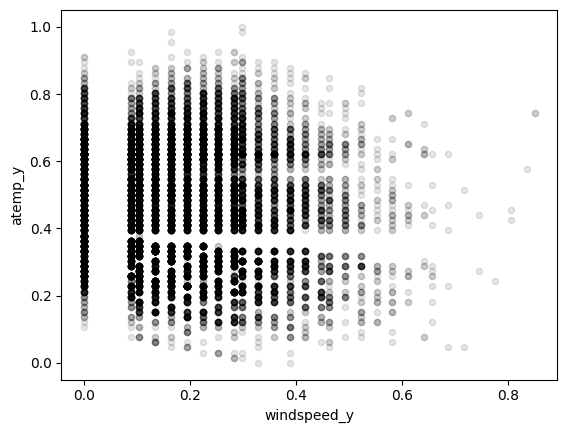

In [98]:
plt.figure()
bike_df.plot(x='windspeed_y', y='atemp_y', kind='scatter', alpha=0.1, color='black')
plt.show()

### cari hubungan windspeed_x dan windspeed_y dengan humidity_y

```
windspeed_x dan windspeed_y kesebar di berbagai macam humidity, tapi paling banyak di tengah-tengah temp_y
```

<Figure size 640x480 with 0 Axes>

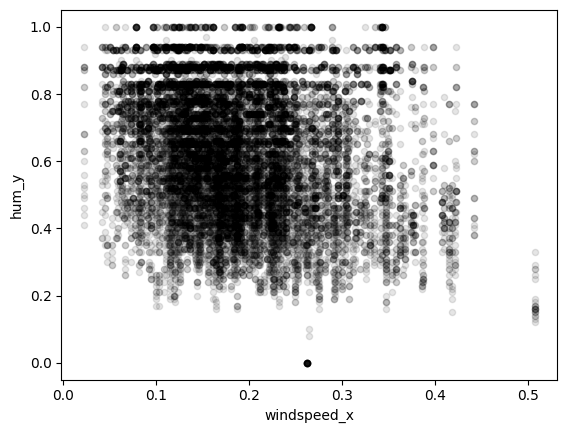

In [99]:
plt.figure()
bike_df.plot(x='windspeed_x', y='hum_y', kind='scatter', alpha=0.1, color='black')
plt.show()

<Figure size 640x480 with 0 Axes>

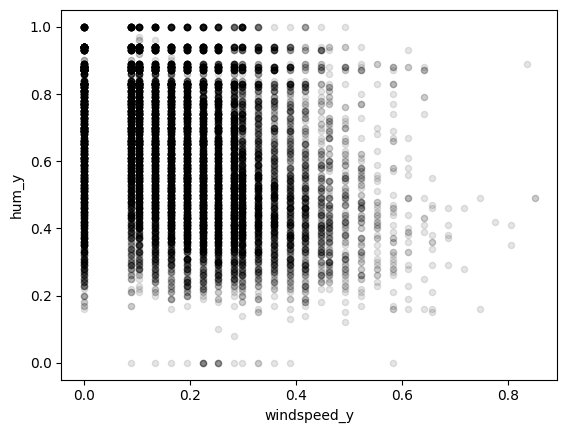

In [100]:
plt.figure()
bike_df.plot(x='windspeed_y', y='hum_y', kind='scatter', alpha=0.1, color='black')
plt.show()

### To do 

/
windspeed_y, windspeed_x
- ~~satuan kecepatan angin dalam m/s~~
- ~~kecepatan angin tertinggi di musim apa?~~
- ~~kecepatan angin terrendah di musim apa?~~
- ~~cari di musim apa kecepatan angin yang kurang dari 2 m/s?~~
- ~~cari musim apa yang kecepatan angin 2-7 m/s?~~
- ~~cari musim apa yang kecepatan angin 7-12~~
- ~~cari musim apa yang kecepatan angin 12-16~~
- ~~cari musim apa yang kecepatan angin 16-56~~
- ~~cari musim apa yang kecepatan angin lebih dari 56~~
- ~~kecepatan angin tertinggi di jam berapa?~~
- ~~kecepatan angin terrendah di jam berapa?~~
- ~~cari jam berapa yang kecepatan angin 2-7 m/s?~~
- ~~cari jam berapa yang kecepatan angin 7-12~~
- ~~cari jam berapa yang kecepatan angin 12-16~~
- ~~cari jam berapa yang kecepatan angin 16-56~~
- ~~cari jam berapa yang kecepatan angin lebih dari 56~~
```
count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
```
- ~~cari hubungan windspeed_x dan windspeed_y dengan weathersit_y,~~
- ~~cari hubungan windspeed_x dan windspeed_y dengan temp_y,~~
- ~~cari hubungan windspeed_x dan windspeed_y dengan atemp_y,~~
- ~~cari hubungan windspeed_x dan windspeed_y dengan humidity_y,~~
- ~~cari hubungan windspeed_y align atau tidak~~

## Count x Assess and Check

### test nilai

In [101]:
bike_df['cnt_x'].describe(include='all')

count    17379.000000
mean      4533.692963
std       1917.376947
min         22.000000
25%       3214.000000
50%       4563.000000
75%       5986.000000
max       8714.000000
Name: cnt_x, dtype: float64

### cari kapan hari yang meminjam sepeda hanya 22

```
ternyata missing data di tanggal 2012-10-29, weekday 


missing data 
1 entry  2012-10-29    
8 entry  2011-01-27    
11 entry 2012-10-30    
12 entry 2011-01-18    
16 entry 2011-01-26    
17 entry 2011-08-28    
18 entry 2011-02-22    2011-08-27  
22 entry 2011-01-03    2011-01-11    2011-01-12    2011-02-11    2011-02-28    2011-03-10    
23 entry ada di outputcheck2.csv

```

In [102]:
cntxmin = bike_df[bike_df['cnt_x']==22]
cntxmin[['dteday', 'season_x','holiday_x', 'weekday_x', 'workingday_x', 'weathersit_x', 'cnt_x']]

dteday  season_x  holiday_x  weekday_x  workingday_x  weathersit_x  \
15883  2012-10-29         4          0          1             1             3   

       cnt_x  
15883     22

mencari missing entries

In [103]:
check = bike_df.groupby('dteday').size()
check1 = check[check < 24]
check2 = check1[check1 == 23]
check2.to_csv('outputcheck2.csv')

#### ngecek weekday 

In [104]:
cntxmin = bike_df[bike_df['cnt_x']==22]
cntxmin[['weekday_x', 'cnt_x']]

weekday_x  cnt_x
15883          1     22

#### ngecek holiday/workingday 

In [105]:
cntxmin['holiday_x'].value_counts()

holiday_x
0    1
Name: count, dtype: int64

In [106]:
cntxmin['workingday_x'].value_counts()

workingday_x
1    1
Name: count, dtype: int64

### cari kapan musim yang meminjam sepeda di bawah 3214
```
untuk cnt_x dari paling banyak: season 1243 (max: 2903, sisanya kurang dari 1000)
                              : weekday 6031425 (max: 760, sisanya kurang dari 700)
                              : holiday 10.0 hari (10x24 entries)        
                              : weathersit_y 1234 (max: 2252, min: 3)                  
```

yang kurang dari 3214 apakah karena missing data?
```
most likely... 
entry == 24, ada 126 days
entry <= 23, ada 63 days
```


In [107]:
cntx1 = bike_df[bike_df['cnt_x']<=3214]
valcntx1 = cntx1['season_x'].value_counts()
valcntx1

season_x
1    2903
2     716
4     683
3      88
Name: count, dtype: int64

#### ngecek yang kurang dari 3214 apakah karena missing data?
```
most likely... 
entry == 24, ada 126 days
entry <= 23, ada 63 days
```

In [108]:
cntx1 = bike_df[bike_df['cnt_x']<=3214]
checkingdays = cntx1.groupby('dteday').size() <= 23
checkingdays[checkingdays == True]

dteday
2011-01-02    True
2011-01-03    True
2011-01-04    True
2011-01-05    True
2011-01-06    True
              ... 
2012-02-29    True
2012-10-29    True
2012-10-30    True
2012-12-24    True
2012-12-25    True
Length: 63, dtype: bool

#### ngecek weekday 

In [109]:
cntx1['weekday_x'].value_counts()

weekday_x
6    760
0    686
3    676
1    588
4    577
2    559
5    544
Name: count, dtype: int64

#### ngecek holiday/workingday 

In [110]:
cntx1['holiday_x'].value_counts()

holiday_x
0    4154
1     236
Name: count, dtype: int64

In [111]:
cntx1['workingday_x'].value_counts()

workingday_x
1    2708
0    1682
Name: count, dtype: int64

In [112]:
work = cntx1[cntx1['workingday_x']== 0]
workhol = work[work['holiday_x']==0]
workhol['weekday_x'].value_counts()

weekday_x
6    760
0    686
Name: count, dtype: int64

In [113]:
work = cntx1[cntx1['workingday_x']== 1]
workhol = work[work['holiday_x']== 1]
workhol['weekday_x'].value_counts()

Series([], Name: count, dtype: int64)

In [114]:
work = cntx1[cntx1['workingday_x']== 1]
workhol = work[work['holiday_x']==0]
workhol['weekday_x'].value_counts()

weekday_x
3    676
2    536
4    529
5    520
1    447
Name: count, dtype: int64

In [115]:
work = cntx1[cntx1['workingday_x']==0]
workhol = work[work['holiday_x']==1]
workhol['weekday_x'].value_counts()

weekday_x
1    141
4     48
5     24
2     23
Name: count, dtype: int64

#### membuang sabtu dan minggu 

In [116]:
weekscheck = cntx1[(cntx1['weekday_x']).between(1, 6, inclusive='left')]
weekscheckhol = weekscheck[weekscheck['holiday_x']==1]
weekscheckhol['weekday_x'].value_counts()/24

weekday_x
1    5.875000
4    2.000000
5    1.000000
2    0.958333
Name: count, dtype: float64

In [117]:
weekscheck = cntx1[(cntx1['weekday_x']).between(1, 6, inclusive='left')]
weekscheckwork = weekscheck[weekscheck['workingday_x']==1]
weekscheckwork['weekday_x'].value_counts()

weekday_x
3    676
2    536
4    529
5    520
1    447
Name: count, dtype: int64

#### ngecek weathersit

In [118]:
cntx1['weathersit_x'].value_counts()

weathersit_x
1    2034
2    1936
3     420
Name: count, dtype: int64

In [119]:
cntx1['weathersit_y'].value_counts()

weathersit_y
1    2252
2    1396
3     739
4       3
Name: count, dtype: int64

### cari kapan musim yang meminjam sepeda 3214 - 4563

```
untuk cnt_x dari paling banyak: season 4231 (max: 1319, sisanya kurang dari 1050)
                              : weekday 1052436   (max: 813, sisanya kurang dari 700)
                              : holiday 3.0 hari (3x24 entries)
                              : weathersit_y 123 (max: 2794, min: 351)    
```

yang 3214 - 4563 apakah karena missing data?
```
tidak
entry <= 23, ada 7 days
```


In [120]:
cntx2 = bike_df[bike_df['cnt_x'].between(3214, 4563, inclusive='left')]
valcntx2 = cntx2['season_x'].value_counts()
valcntx2

season_x
4    1319
2    1031
3    1001
1     980
Name: count, dtype: int64

#### ngecek yang 3214-4563 apakah karena missing data?

```
entry <= 23, ada 7 days
```

In [121]:
cntx2 = bike_df[bike_df['cnt_x'].between(3214, 4563, inclusive='left')]
checkingdays2 = cntx2.groupby('dteday').size() <= 23
checkingdays2[checkingdays2 == True]

dteday
2011-03-18    True
2011-04-11    True
2011-08-28    True
2011-11-28    True
2012-01-10    True
2012-02-06    True
2012-02-21    True
dtype: bool

#### ngecek weekday 

In [122]:
cntx2['weekday_x'].value_counts()

weekday_x
1    813
0    689
5    647
2    622
4    552
3    504
6    504
Name: count, dtype: int64

#### ngecek holiday/workingday 

In [123]:
cntx2['holiday_x'].value_counts()/24

holiday_x
0    177.458333
1      3.000000
Name: count, dtype: float64

In [124]:
cntx2['workingday_x'].value_counts()/24

workingday_x
1    127.750000
0     52.708333
Name: count, dtype: float64

In [125]:
work2 = cntx2[cntx2['workingday_x']== 0]
workhol2 = work2[work2['holiday_x']==0]
workhol2['weekday_x'].value_counts()/24

weekday_x
0    28.708333
6    21.000000
Name: count, dtype: float64

In [126]:
work2 = cntx2[cntx2['workingday_x']== 1]
workhol2 = work2[work2['holiday_x']==1]
workhol2['weekday_x'].value_counts()/24

Series([], Name: count, dtype: float64)

In [127]:
work2 = cntx2[cntx2['workingday_x']== 1]
workhol2 = work2[work2['holiday_x']==0]
workhol2['weekday_x'].value_counts()/24

weekday_x
1    31.875000
5    25.958333
2    25.916667
4    23.000000
3    21.000000
Name: count, dtype: float64

In [128]:
work2 = cntx2[cntx2['workingday_x']== 0]
workhol2 = work2[work2['holiday_x']==1]
workhol2['weekday_x'].value_counts()/24

weekday_x
1    2.0
5    1.0
Name: count, dtype: float64

#### membuang sabtu dan minggu

In [129]:
weekscheck2 = cntx2[(cntx2['weekday_x']).between(1, 6, inclusive='left')]
weekscheckhol2 = weekscheck2[weekscheck2['holiday_x']==1]
weekscheckhol2['weekday_x'].value_counts()/24

weekday_x
1    2.0
5    1.0
Name: count, dtype: float64

In [130]:
weekscheck2 = cntx2[(cntx2['weekday_x']).between(1, 6, inclusive='left')]
weekscheckwork2 = weekscheck2[weekscheck2['workingday_x']==1]
weekscheckwork2['weekday_x'].value_counts()/24

weekday_x
1    31.875000
5    25.958333
2    25.916667
4    23.000000
3    21.000000
Name: count, dtype: float64

#### ngecek weathersit

In [131]:
cntx2['weathersit_x'].value_counts()/24

weathersit_x
1    106.500000
2     72.958333
3      1.000000
Name: count, dtype: float64

In [132]:
cntx2['weathersit_y'].value_counts()

weathersit_y
1    2794
2    1186
3     351
Name: count, dtype: int64

### cari kapan musim yang meminjam sepeda 4563 - 5986

```
untuk cnt_x dari paling banyak: season 3421 (max: 1535, sisanya kurang dari 1400)
                              : weekday 2530461  (max: 720, sisanya kurang dari 700)
                              : holiday 2.0 hari (2x24 entries)
                              : weathersit_y 123 (max: 3076, min: 213) 
```

yang 4563 - 5986 apakah karena missing data?
```
tidak
entry <= 23, ada 6 days
```

In [133]:
cntx3 = bike_df[bike_df['cnt_x'].between(4563, 5986, inclusive='left')]
valcntx3 = cntx3['season_x'].value_counts()
valcntx3

season_x
3    1535
4    1342
2    1198
1     263
Name: count, dtype: int64

#### ngecek yang 4563-5986 apakah karena missing data?

```
entry <= 23, ada 6 days
```

In [134]:
checkingdays3 = cntx3.groupby('dteday').size() <= 23
checkingdays3[checkingdays3 == True]

dteday
2011-09-12    True
2012-03-11    True
2012-04-02    True
2012-04-11    True
2012-11-08    True
2012-11-29    True
dtype: bool

#### ngecek weekday 

In [135]:
cntx3['weekday_x'].value_counts()

weekday_x
2    720
5    696
3    647
0    599
4    598
6    576
1    502
Name: count, dtype: int64

#### ngecek holiday/workingday 

In [136]:
cntx3['holiday_x'].value_counts()

holiday_x
0    4290
1      48
Name: count, dtype: int64

In [137]:
cntx3['workingday_x'].value_counts()

workingday_x
1    3115
0    1223
Name: count, dtype: int64

In [138]:
work3 = cntx3[cntx3['workingday_x']== 0]
workhol3 = work3[work3['holiday_x']==0]
workhol3['weekday_x'].value_counts()

weekday_x
0    599
6    576
Name: count, dtype: int64

In [139]:
work3 = cntx3[cntx3['workingday_x']== 1]
workhol3 = work3[work3['holiday_x']==1]
workhol3['weekday_x'].value_counts()

Series([], Name: count, dtype: int64)

In [140]:
work3 = cntx3[cntx3['workingday_x']== 1]
workhol3 = work3[work3['holiday_x']==0]
workhol3['weekday_x'].value_counts()

weekday_x
2    720
5    696
3    647
4    598
1    454
Name: count, dtype: int64

In [141]:
work3 = cntx3[cntx3['workingday_x']== 0]
workhol3 = work3[work3['holiday_x']==1]
workhol3['weekday_x'].value_counts()

weekday_x
1    48
Name: count, dtype: int64

#### membuang sabtu minggu

In [142]:
weekscheck3 = cntx3[(cntx3['weekday_x']).between(1, 6, inclusive='left')]
weekscheckhol3 = weekscheck3[weekscheck3['holiday_x']==1]
weekscheckhol3['weekday_x'].value_counts()/24

weekday_x
1    2.0
Name: count, dtype: float64

In [143]:
weekscheck3 = cntx3[(cntx3['weekday_x']).between(1, 6, inclusive='left')]
weekscheckwork3 = weekscheck3[weekscheck3['workingday_x']==1]
weekscheckwork3['weekday_x'].value_counts()/24

weekday_x
2    30.000000
5    29.000000
3    26.958333
4    24.916667
1    18.916667
Name: count, dtype: float64

#### ngecek weathersit

In [144]:
cntx3['weathersit_x'].value_counts()/24

weathersit_x
1    128.75
2     51.00
3      1.00
Name: count, dtype: float64

In [145]:
cntx3['weathersit_y'].value_counts()

weathersit_y
1    3076
2    1049
3     213
Name: count, dtype: int64

### cari kapan musim yang meminjam sepeda 5986 - 8714

```
untuk cnt_x dari paling banyak: season 3241 (max: 1848, sisanya kurang dari 1500)
                              : weekday 4365120 (max: 744, sisanya kurang dari 650)   
                              : holiday 6.0 hari (6x24 entries)
                              : weathersit_y 123 (max: 3293, min:128)

```

yang 5986 - 8714 apakah karena missing data?
```
tidak
entry <= 23, ada 0 days
```

In [146]:
cntx4 = bike_df[bike_df['cnt_x'].between(5986, 8714, inclusive='left')]
valcntx4 = cntx4['season_x'].value_counts()
valcntx4

season_x
3    1848
2    1488
4     888
1     120
Name: count, dtype: int64

#### ngecek yang 5986 - 8714 apakah karena missing data?

```
entry <= 23, 0 days
```

In [147]:
checkingdays4 = cntx4.groupby('dteday').size() <= 23
checkingdays4[checkingdays4 == True]

Series([], dtype: bool)

#### ngecek weekday 

In [148]:
cntx4['weekday_x'].value_counts()

weekday_x
4    744
3    648
6    648
5    624
1    600
2    552
0    528
Name: count, dtype: int64

#### ngecek holiday/workday 

In [149]:
cntx4['holiday_x'].value_counts()/24

holiday_x
0    175.0
1      6.0
Name: count, dtype: float64

In [150]:
cntx4['workingday_x'].value_counts()/24

workingday_x
1    126.0
0     55.0
Name: count, dtype: float64

In [151]:
work4 = cntx4[cntx4['workingday_x']== 0]
workhol4 = work4[work4['holiday_x']==0]
workhol4['weekday_x'].value_counts()/24

weekday_x
6    27.0
0    22.0
Name: count, dtype: float64

In [152]:
work4 = cntx4[cntx4['workingday_x']== 1]
workhol4 = work4[work4['holiday_x']==1]
workhol4['weekday_x'].value_counts()/24

Series([], Name: count, dtype: float64)

In [153]:
work4 = cntx4[cntx4['workingday_x']== 1]
workhol4 = work4[work4['holiday_x']==0]
workhol4['weekday_x'].value_counts()/24

weekday_x
4    31.0
3    26.0
5    26.0
2    23.0
1    20.0
Name: count, dtype: float64

In [154]:
work4 = cntx4[cntx4['workingday_x']== 0]
workhol4 = work4[work4['holiday_x']==1]
workhol4['weekday_x'].value_counts()/24

weekday_x
1    5.0
3    1.0
Name: count, dtype: float64

#### membuang sabtu dan minggu 

In [155]:
weekscheck4 = cntx4[(cntx4['weekday_x']).between(1, 6, inclusive='left')]
weekscheckhol4 = weekscheck4[weekscheck4['holiday_x']==1]
weekscheckhol4['weekday_x'].value_counts()/24

weekday_x
1    5.0
3    1.0
Name: count, dtype: float64

In [156]:
weekscheck4 = cntx4[(cntx4['weekday_x']).between(1, 6, inclusive='left')]
weekscheckwork4 = weekscheck4[weekscheck4['workingday_x']==1]
weekscheckwork4['weekday_x'].value_counts()/24

weekday_x
4    31.0
3    26.0
5    26.0
2    23.0
1    20.0
Name: count, dtype: float64

#### ngecek weathersit

In [157]:
cntx4['weathersit_x'].value_counts()/24

weathersit_x
1    140.0
2     41.0
Name: count, dtype: float64

In [158]:
cntx4['weathersit_y'].value_counts()

weathersit_y
1    3293
2     923
3     128
Name: count, dtype: int64

### cari kapan musim yang meminjam sepeda 8714

```
untuk cnt_x dari paling banyak: season 3 (max: 24 entries), 1 hari doang, yaitu tanggal 2012-09-15, hari sabtu (6)
                              : weathersit_y 12    (max: 19, min:5)
```

yang >= 8714 apakah karena missing data?
```
tidak
entry <= 23, ada 0 days
```

In [159]:
cntx5 = bike_df[bike_df['cnt_x'] >= 8714]
valcntx5 = cntx5['season_x'].value_counts()
valcntx5


season_x
3    24
Name: count, dtype: int64

#### ngecek yang >= 8714 apakah karena missing data?

```
entry <= 23, 0 days
```

In [160]:
checkingdays5 = cntx5.groupby('dteday').size() <= 23
checkingdays5[checkingdays5 == True]

Series([], dtype: bool)

#### ngecek weekday 

In [161]:
cntx5['weekday_x'].value_counts()

weekday_x
6    24
Name: count, dtype: int64

#### ngecek holiday/workingday 

In [162]:
work5 = cntx5[cntx5['workingday_x']== 0]
workhol5 =work5[work5['holiday_x']==0]
workhol5['weekday_x'].value_counts()/24

weekday_x
6    1.0
Name: count, dtype: float64

#### ngecek weathersit

In [163]:
cntx5['weathersit_x'].value_counts()/24

weathersit_x
1    1.0
Name: count, dtype: float64

In [164]:
cntx5['weathersit_y'].value_counts()

weathersit_y
1    19
2     5
Name: count, dtype: int64

### cari hubungan cnt_x sepeda dengan temp_x dan temp_y

<Axes: xlabel='cnt_x', ylabel='temp_x'>

<Figure size 1500x500 with 0 Axes>

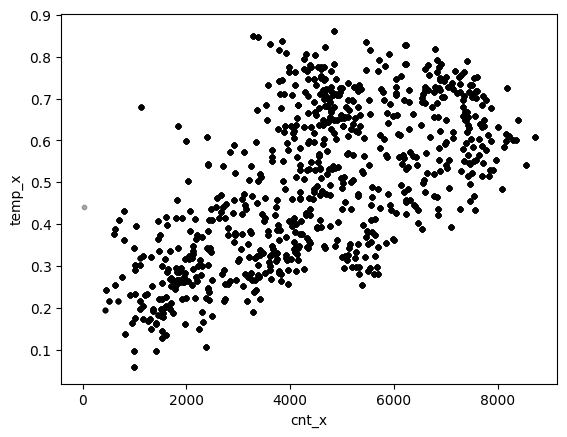

In [165]:
plt.figure(figsize=(15, 5))
bike_df.plot(x='cnt_x', y='temp_x', kind='scatter', alpha=0.3, color='black', s=10)

<Axes: xlabel='cnt_x', ylabel='temp_y'>

<Figure size 1500x500 with 0 Axes>

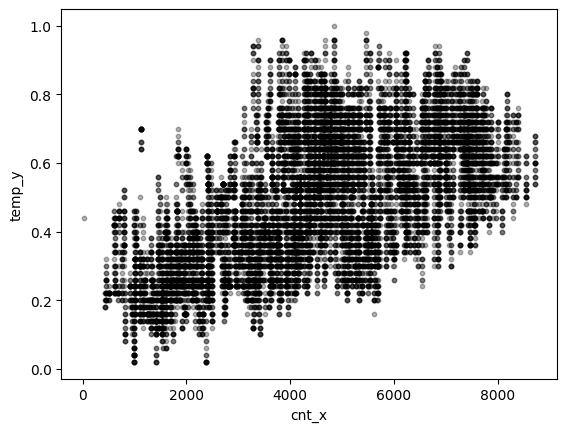

In [166]:
plt.figure(figsize=(15, 5))
bike_df.plot(x='cnt_x', y='temp_y', kind='scatter', alpha=0.3, color='black', s=10)

### cari hubungan cnt_x sepeda dengan atemp_x dan atemp_y

<Axes: xlabel='cnt_x', ylabel='atemp_x'>

<Figure size 1500x500 with 0 Axes>

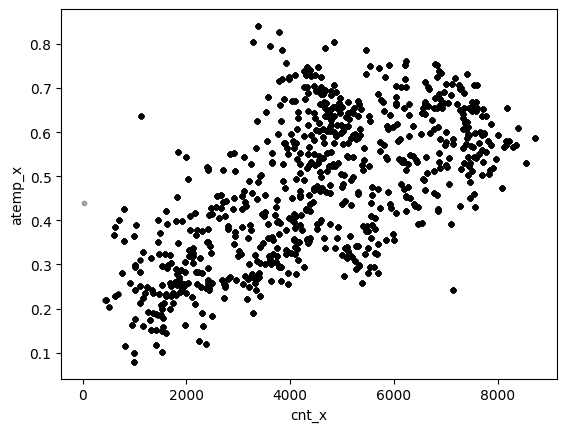

In [167]:
plt.figure(figsize=(15, 5))
bike_df.plot(x='cnt_x', y='atemp_x', kind='scatter', alpha=0.3, color='black', s=10)

<Axes: xlabel='cnt_x', ylabel='atemp_y'>

<Figure size 1500x500 with 0 Axes>

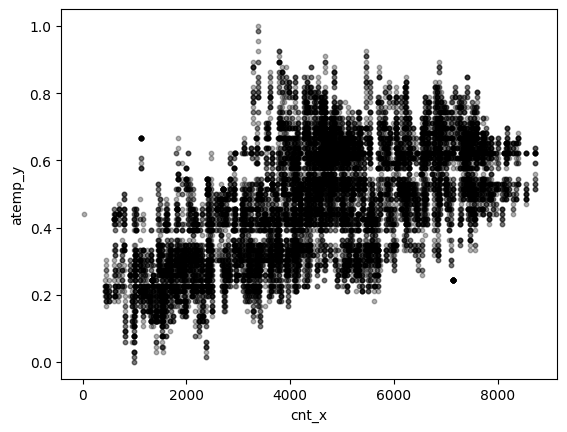

In [168]:
plt.figure(figsize=(15, 5))
bike_df.plot(x='cnt_x', y='atemp_y', kind='scatter', alpha=0.3, color='black', s=10)

### cari hubungan cnt_x sepeda dengan hum_x dan hum_y

<Axes: xlabel='cnt_x', ylabel='hum_x'>

<Figure size 1500x500 with 0 Axes>

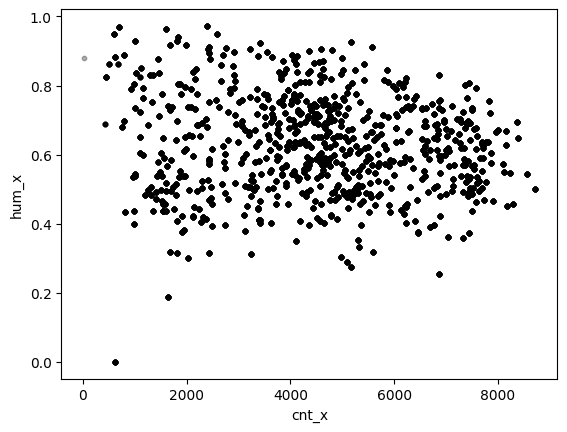

In [169]:
plt.figure(figsize=(15, 5))
bike_df.plot(x='cnt_x', y='hum_x', kind='scatter', alpha=0.3, color='black', s=10)

<Axes: xlabel='cnt_x', ylabel='hum_y'>

<Figure size 1500x500 with 0 Axes>

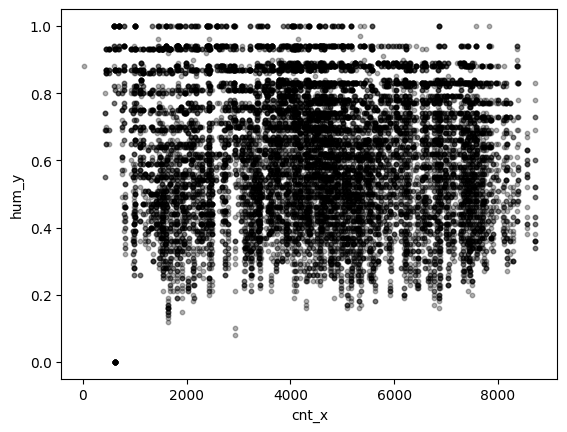

In [170]:
plt.figure(figsize=(15, 5))
bike_df.plot(x='cnt_x', y='hum_y', kind='scatter', alpha=0.3, color='black', s=10)

### cari hubungan cnt_x sepeda dengan windspeed_x dan windspeed_y

<Axes: xlabel='cnt_x', ylabel='windspeed_x'>

<Figure size 1500x500 with 0 Axes>

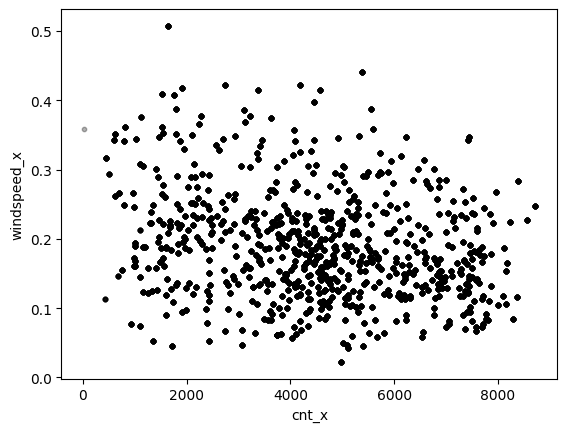

In [171]:
plt.figure(figsize=(15, 5))
bike_df.plot(x='cnt_x', y='windspeed_x', kind='scatter', alpha=0.3, color='black', s=10)

<Axes: xlabel='cnt_x', ylabel='windspeed_y'>

<Figure size 1500x500 with 0 Axes>

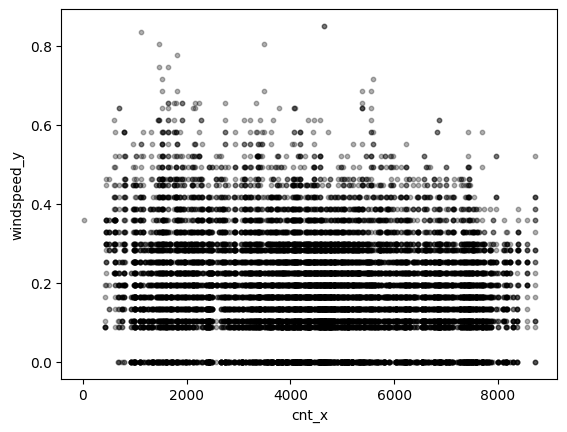

In [172]:
plt.figure(figsize=(15, 5))
bike_df.plot(x='cnt_x', y='windspeed_y', kind='scatter', alpha=0.3, color='black', s=10)

### To do 

/
cnt x
- ~~cari kapan hari yang meminjam sepeda hanya 22~~
- ~~cari kapan musim yang meminjam sepeda di bawah 3214~~
- ~~cari kapan musim yang meminjam sepeda 3214 -	4563~~
- ~~cari kapan musim yang meminjam sepeda 4563 - 5986~~
-  ~~cari kapan musim yang meminjam sepeda 5986 -	8714~~
-  ~~cari kapan musim yang meminjam sepeda 8714~~



- ~~cari di kapan hari weekday yang meminjam sepeda hanya 22~~
- ~~cari di kapan hari weekday yang meminjam sepeda di bawah 3214~~
- ~~cari di kapan hari weekday yang meminjam sepeda 3214 -	4563~~
- ~~cari di kapan hari weekday yang meminjam sepeda 4563 - 5986~~
- ~~cari di kapan hari weekday yang meminjam sepeda 5986 -	8714~~
- ~~cari di kapan hari weekday yang meminjam sepeda 8714~~


- ~~cari di holiday/workingday yang meminjam sepeda hanya 22~~
- ~~cari di holiday/workingday yang meminjam sepeda di bawah 3214~~
- ~~cari di holiday/workingday yang meminjam sepeda 3214 -	4563~~
- ~~cari di holiday/workingday yang meminjam sepeda 4563 - 5986~~
- ~~cari di holiday/workingday yang meminjam sepeda 5986 -	8714~~
- ~~cari di holiday/workingday yang meminjam sepeda 8714~~


- ~~cari di weathersit y apa yang meminjam sepeda hanya 22~~
- ~~cari di weathersit y apa yang meminjam sepeda di bawah 3214~~
- ~~cari di weathersit y apa yang meminjam sepeda 3214 -	4563~~
- ~~cari di weathersit y apa yang meminjam sepeda 4563 - 5986~~
- ~~cari di weathersit y apa yang meminjam sepeda 5986 -	8714~~
- ~~cari di weathersit y apa yang meminjam sepeda 8714~~


- ~~cari hubungan peminjam sepeda dengan temp_x & temp_y~~
- ~~cari hubungan atemp_x & atemp_y,~~
- ~~cari hubungan hum_x & hum_y,~~
- ~~cari hubungan windspeed_x & windspeed_y~~


## Count y Asses and Check

### test nilai

In [173]:
bike_df['cnt_y'].describe(include='all')

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt_y, dtype: float64

### cari kapan musim yang meminjam sepeda cuma 1 per jam

```
untuk cnt_x dari paling banyak: season 1243 (max: 108, sisanya kurang dari 30)
                              : jam 1-7 malam
                              : weekday 3142506 (max: 32, sisanya kurang dari 31)
                              : holiday 3 jam       
                              : weathersit_y 123 (max: 93, min: 24)                  
```

In [174]:
cntymin = bike_df[bike_df['cnt_y']==1]
cntymin['season_x'].value_counts()

season_x
1    108
2     28
4     16
3      6
Name: count, dtype: int64

#### cek jam

In [175]:
cntymin['hr'].value_counts()

hr
4    63
3    48
2    20
5    14
6     6
1     5
7     2
Name: count, dtype: int64

#### cek weekday

In [176]:
cntymin['weekday_x'].value_counts()

weekday_x
3    32
1    30
4    24
2    20
5    20
0    18
6    14
Name: count, dtype: int64

#### cek holiday/workingday

In [177]:
cntymin['holiday_x'].value_counts()

holiday_x
0    155
1      3
Name: count, dtype: int64

In [178]:
cntymin['workingday_x'].value_counts()

workingday_x
1    123
0     35
Name: count, dtype: int64

#### cek weathersit

In [179]:
cntymin['weathersit_y'].value_counts()

weathersit_y
1    93
2    41
3    24
Name: count, dtype: int64

### cari kapan musim yang meminjam sepeda 977 per jam
```
untuk cnt_x dari paling banyak: season 3 
                              : jam 18
                              : weekday 3
                              : holiday 0      
                              : weathersit_y 1               
```

In [180]:
cntymax = bike_df[bike_df['cnt_y']==977]
cntymax['season_x'].value_counts()

season_x
3    1
Name: count, dtype: int64

#### cek apakah outlier

In [181]:
cntymax['dteday']

14773    2012-09-12
Name: dteday, dtype: object

In [182]:
data977 = bike_df[bike_df['dteday']=='2012-09-12']
data977['cnt_y']

14755     49
14756     21
14757     11
14758      7
14759      5
14760     48
14761    205
14762    557
14763    770
14764    328
14765    205
14766    232
14767    352
14768    323
14769    278
14770    318
14771    509
14772    925
14773    977
14774    635
14775    470
14776    306
14777    212
14778    127
Name: cnt_y, dtype: int64

#### cek jam

In [183]:
cntymax['hr'].value_counts()

hr
18    1
Name: count, dtype: int64

#### cek weekday

In [184]:
cntymax['weekday_x'].value_counts()

weekday_x
3    1
Name: count, dtype: int64

#### cek holiday/workingday 

In [185]:
cntymax['holiday_x'].value_counts()

holiday_x
0    1
Name: count, dtype: int64

In [186]:
cntymax['workingday_x'].value_counts()

workingday_x
1    1
Name: count, dtype: int64

#### cek weathersit

In [187]:
cntymax['weathersit_y'].value_counts()

weathersit_y
1    1
Name: count, dtype: int64

### cari kapan musim yang meminjam sepeda di bawah 40

```
untuk cnt_x dari paling banyak: season 1243 (max: 1434, sisanya kurang dari 1100)
                              : jam dari jam 23-7
                              : weekday 3120645 (max: 660, sisanya kurang dari 660)
                              : holiday 154 jam        
                              : weathersit_y 1234 (max: 2692, min: 2)                  
```

In [188]:
cnty1 = bike_df[bike_df['cnt_y'] <= 40]
cnty1['season_x'].value_counts()

season_x
1    1434
2    1051
4     992
3     900
Name: count, dtype: int64

#### cek jam

In [189]:
cnty1['hr'].value_counts()

hr
4     697
5     666
3     656
2     564
1     534
0     366
6     279
23    144
7     132
22     70
21     42
8      37
10     24
20     24
9      21
14     20
11     18
13     16
19     14
12     13
15     13
16     12
18      8
17      7
Name: count, dtype: int64

#### cek weekday

In [190]:
cnty1['weekday_x'].value_counts()

weekday_x
3    660
1    654
2    647
0    627
6    605
4    601
5    583
Name: count, dtype: int64

#### cek holiday/workingday 

In [191]:
cnty1['holiday_x'].value_counts()

holiday_x
0    4223
1     154
Name: count, dtype: int64

In [192]:
cnty1['workingday_x'].value_counts()

workingday_x
1    2991
0    1386
Name: count, dtype: int64

#### cek weathersit

In [193]:
cnty1['weathersit_y'].value_counts()

weathersit_y
1    2692
2    1137
3     546
4       2
Name: count, dtype: int64

weathersit bike_df

In [194]:
bike_df['weathersit_y'].value_counts()

weathersit_y
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

### cari kapan musim yang meminjam sepeda 40-142
```
untuk cnt_y dari paling banyak: season 1423 (max: 1622, sisanya kurang dari 1000)
                              : jam merata
                              : weekday 0613425 (max: 760, sisanya kurang dari 700)
                              : holiday 147 jam      
                              : weathersit_y 123 (max: 2616, min: 499)                  
```

In [195]:
cnty2 = bike_df[(bike_df['cnt_y']).between(40, 142, inclusive='left')]
cnty2['season_x'].value_counts()

season_x
1    1622
4     981
2     953
3     796
Name: count, dtype: int64

#### cek jam

In [196]:
cnty2['hr'].value_counts()

hr
23    474
6     352
22    339
0     328
10    320
21    235
11    221
7     195
20    186
1     185
14    160
8     155
2     154
15    154
13    149
9     142
12    139
19    126
16    105
18     69
5      66
17     54
3      44
Name: count, dtype: int64

#### cek weekday

In [197]:
cnty2['weekday_x'].value_counts()

weekday_x
0    775
6    708
1    619
3    585
4    565
2    556
5    544
Name: count, dtype: int64

#### cek holiday/workingday 

In [198]:
cnty2['holiday_x'].value_counts()


holiday_x
0    4205
1     147
Name: count, dtype: int64

In [199]:
cnty2['workingday_x'].value_counts()

workingday_x
1    2722
0    1630
Name: count, dtype: int64

#### cek weathersit

In [200]:
cnty2['weathersit_y'].value_counts()

weathersit_y
1    2616
2    1237
3     499
Name: count, dtype: int64

### cari kapan musim yang meminjam sepeda 142 - 281
```
untuk cnt_y dari paling banyak: season 3421 (max: 1234, sisanya kurang dari 1200)
                              : jam paling banyak siang sampai malam
                              : weekday 5421360 (max: 724, sisanya kurang dari 700)
                              : holiday 95 jam        
                              : weathersit_y 1234 (max: 2914, min: 1)                  
```

In [201]:
cnty3 = bike_df[(bike_df['cnt_y']).between(142, 281, inclusive='left')]
cnty3['season_x'].value_counts()

season_x
3    1234
4    1138
2    1135
1     847
Name: count, dtype: int64

#### cek jam

In [202]:
cnty3['hr'].value_counts()

hr
21    361
9     358
14    339
11    335
12    320
13    305
22    304
15    300
10    290
20    286
16    182
19    168
18    141
17    141
7     139
8     126
23    115
6      99
0      39
1       6
Name: count, dtype: int64

#### cek weekday

In [203]:
cnty3['weekday_x'].value_counts()

weekday_x
5    724
4    698
2    658
1    645
3    643
6    521
0    465
Name: count, dtype: int64

#### cek holiday/workingday 

In [204]:
cnty3['holiday_x'].value_counts()


holiday_x
0    4259
1      95
Name: count, dtype: int64

In [205]:
cnty3['workingday_x'].value_counts()

workingday_x
1    3273
0    1081
Name: count, dtype: int64

#### cek weathersit

In [206]:
cnty3['weathersit_y'].value_counts()

weathersit_y
1    2914
2    1205
3     234
4       1
Name: count, dtype: int64

### cari kapan musim yang meminjam sepeda 281 - 977
```
untuk cnt_y dari paling banyak: season 3241 (max: 1578, sisanya kurang dari 1300)
                              : jam paling banyak 12-20 sisanya kurang dari 200
                              : weekday 6054321 (max: 688, sisanya kurang dari 650)
                              : holiday 107 jam       
                              : weathersit_y 123 (max: 3230, min: 146)                  
```

In [207]:
cnty4 = bike_df[(bike_df['cnt_y']).between(281, 977, inclusive='left')]
cnty4['season_x'].value_counts()

season_x
3    1578
2    1288
4    1131
1     356
Name: count, dtype: int64

#### cek jam

In [208]:
cnty4['hr'].value_counts()

hr
17    528
18    509
16    431
19    420
8     409
7     267
15    262
13    260
12    256
20    234
14    210
9     209
11    153
10     95
21     91
22     18
0       1
Name: count, dtype: int64

#### cek weekday

In [209]:
cnty4['weekday_x'].value_counts()

weekday_x
6    688
0    642
5    641
4    615
3    599
2    596
1    572
Name: count, dtype: int64

#### cek holiday/workingday 

In [210]:
cnty4['holiday_x'].value_counts()

holiday_x
0    4246
1     107
Name: count, dtype: int64

In [211]:
cnty4['workingday_x'].value_counts()

workingday_x
1    2916
0    1437
Name: count, dtype: int64

#### cek weathersit

In [212]:
cnty4['weathersit_y'].value_counts()

weathersit_y
1    3230
2     977
3     146
Name: count, dtype: int64

### cari hubungan cnt_y sepeda dengan dan temp_y

<Axes: xlabel='cnt_y', ylabel='temp_y'>

<Figure size 1500x500 with 0 Axes>

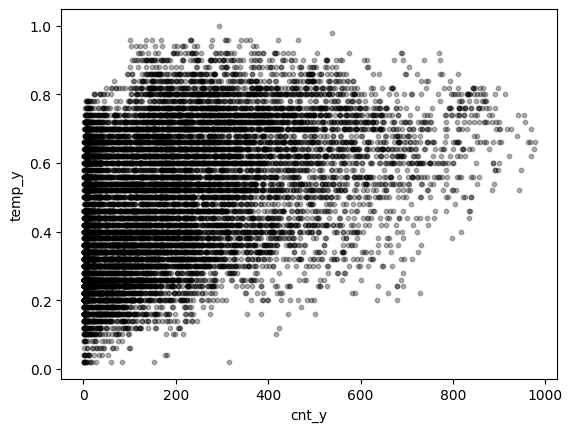

In [213]:
plt.figure(figsize=(15, 5))
bike_df.plot(x='cnt_y', y='temp_y', kind='scatter', alpha=0.3, color='black', s=10)

### cari hubungan cnt_y sepeda dengan atemp_y

<Axes: xlabel='cnt_y', ylabel='atemp_y'>

<Figure size 1500x500 with 0 Axes>

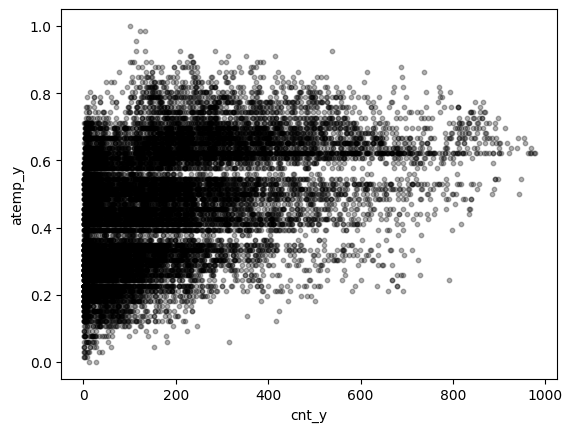

In [214]:
plt.figure(figsize=(15, 5))
bike_df.plot(x='cnt_y', y='atemp_y', kind='scatter', alpha=0.3, color='black', s=10)

### cari hubungan cnt_y sepeda dengan hum_y

<Axes: xlabel='cnt_y', ylabel='hum_y'>

<Figure size 1500x500 with 0 Axes>

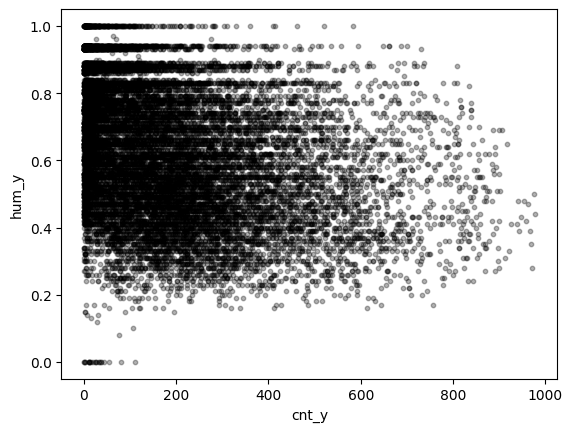

In [215]:
plt.figure(figsize=(15, 5))
bike_df.plot(x='cnt_y', y='hum_y', kind='scatter', alpha=0.3, color='black', s=10)

### cari hubungan cnt_y sepeda dengan windspeed_y

<Axes: xlabel='cnt_y', ylabel='windspeed_y'>

<Figure size 1500x500 with 0 Axes>

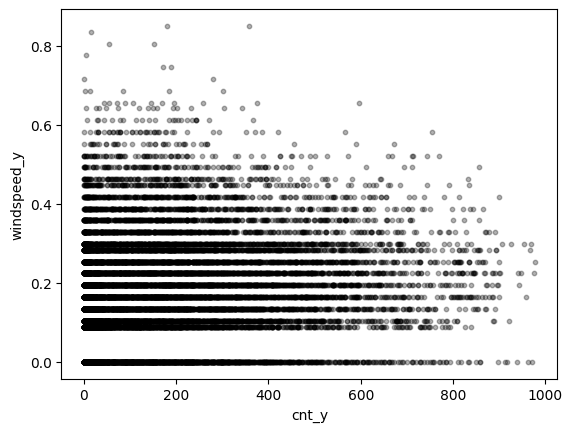

In [216]:
plt.figure(figsize=(15, 5))
bike_df.plot(x='cnt_y', y='windspeed_y', kind='scatter', alpha=0.3, color='black', s=10)

### To do

\ cnt_y

min	1.000000
25%	40.000000
50%	142.000000
75%	281.000000
max	977.000000
- ~~cari kapan musim yang meminjam sepeda cuma 1 per jam~~
- ~~cari kapan musim yang meminjam sepeda 977 per jam~~
- ~~cari kapan musim yang meminjam sepeda di bawah 40~~
- ~~cari kapan musim yang meminjam sepeda 40-142~~
- ~~cari kapan musim yang meminjam sepeda 142 - 281~~
- ~~cari kapan musim yang meminjam sepeda 281 - 977~~

- ~~cari di jam berapa yang meminjam sepeda hanya 1~~
- ~~cari di jam berapa yang meminjam sepeda 977~~
- ~~cari di jam berapa yang meminjam sepeda di bawah 40~~
- ~~cari di jam berapa yang meminjam sepeda 40-142~~
- ~~cari di jam berapa yang meminjam sepeda 142-281~~
- ~~cari di jam berapa yang meminjam sepeda 281 - 977~~

- ~~cari di holiday/workingday yang meminjam sepeda hanya 1~~
- ~~cari di holiday/workingday yang meminjam sepeda 977~~
- ~~cari di holiday/workingday yang meminjam sepeda di bawah  40~~
- ~~cari di holiday/workingday yang meminjam sepeda 40-142~~
- ~~cari di holiday/workingday yang meminjam sepeda 142-281~~
- ~~cari di holiday/workingday yang meminjam sepeda 281 - 977~~


- ~~cari di weathersit y apa yang meminjam sepeda hanya 1~~
- ~~cari di weathersit y apa yang meminjam sepeda 977~~
- ~~cari di weathersit y apa yang meminjam sepeda di bawah 40~~
- ~~cari di weathersit y apa yang meminjam sepeda 40 - 142~~
- ~~cari di weathersit y apa yang meminjam sepeda 142 - 281~~
- ~~cari di weathersit y apa yang meminjam sepeda 281 - 977~~


- ~~cari hubungan peminjam sepeda dengan temp_y~~
- ~~cari hubungan atemp_y~~
- ~~cari hubungan humidity_y~~
- ~~cari hubungan windspeed_y~~

- ~~tulis insight per section~~


## Weekday

### cari jumlah weekday dan workingday align atau tidak dalam seminggu

In [217]:
bike_df.value_counts('dteday')

dteday
2011-01-01    24
2012-04-03    24
2012-04-28    24
2012-04-29    24
2012-04-30    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: count, Length: 731, dtype: int64

In [218]:
checkingwwwork = bike_df[bike_df['workingday_x'] == 1]
checkingwwweek = bike_df[(bike_df['weekday_x']).between(1, 5)]

# harusnya yang dicompare adalah jumlah barisnya
#comparisonweekwork = checkingwwwork.value_counts('workingday_x') == checkingwwweek.value_counts('weekday_x')
#comparisonweekwork 

In [219]:
checkingwwwork.value_counts('dteday')

dteday
2012-01-03    24
2012-03-30    24
2012-05-14    24
2012-05-11    24
2012-05-10    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: count, Length: 500, dtype: int64

In [220]:
checkingwwweek.value_counts('dteday')

dteday
2012-12-31    24
2012-03-05    24
2012-03-21    24
2012-03-20    24
2012-03-19    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: count, Length: 521, dtype: int64

kok ada 144 ini apa ????

In [221]:
jumlah = bike_df.groupby('dteday')['weekday_x'].sum()
jumlah[jumlah == 24]

dteday
2011-01-10    24
2011-01-17    24
2011-01-18    24
2011-01-31    24
2011-02-07    24
              ..
2012-11-26    24
2012-12-03    24
2012-12-10    24
2012-12-17    24
2012-12-31    24
Name: weekday_x, Length: 89, dtype: int64

### To do 

- ~~cari jumlah weekday dan workingday align atau tidak dalam seminggu (weekday tidak align dengan workingday, ada holidaynya)~~
- ~~cari hubungan weathersit_y, temp_y, atemp_y, humidity_y, windspeed_y, align atau tidak.~~ align 
- ~~bikin rata-rata temp_y per tanggal dicocokin sama temp_x~~
- ~~bikin rata-rata atemp_y per tanggal dicocokin sama atemp_x~~
- ~~bikin rata-rata hum_y per tanggal dicocokin sama hum_x~~
- ~~bikin rata-rata windspeed_y per tanggal dicocokin sama windspeed_x~~

\
- ~~bikin jumlah casual_y + registered_y = cnt_y~~
- ~~bikin jumlah cnt_x apakah sama dengan cnt_y~~

## Insight

**Insight:**
- humidity tidak bisa bernilai 0 karena ini adalah kondisi ekstrem, yang mana kelembapan relatif mencapai 0%, berarti udara sepenuhnya kering dan tidak mengandung uap air sama sekali, yang hampir mustahil terjadi secara alami karena selalu ada penguapan dari sumber air di sekitar. cek lagi humidity pas 0, bersihkan datanya.

~~aku bakal pakai median tiap jam, tiap musim~~
- ~~tidak ditemukan missing value~~
- ~~tidak ada data yang terduplikasi~~
- ~~To do: cek windspeed rata-rata~~ **anomali, kemungkinan ada badai karena rata-ratanya ada di sekitar 0.1 dan 0.2 untuk windspeed_y**

di musim 1 yaitu spring, tanggal 2011-02-19, dengan windspeed_x 0.507463, dan windspeed_y 0.7463, di jam 15. 
- ~~To do: cek peristiwa~~

di musim 3 yaitu fall, tanggal 2011-07-03, dengan windspeed_y, 0.8507, di jam 17 dan 18 sepertinya ada badai.



**missing data**
- MIN CNT_X: 22, ternyata missing data di tanggal 2012-10-29


```
missing data lain:
1 entry  2012-10-29    
8 entry  2011-01-27    
11 entry 2012-10-30    
12 entry 2011-01-18    
16 entry 2011-01-26    
17 entry 2011-08-28    
18 entry 2011-02-22    2011-08-27  
22 entry 2011-01-03    2011-01-11    2011-01-12    2011-02-11    2011-02-28    2011-03-10    
23 entry ada di outputcheck2.csv

```
- MAX CNT_X :  8714

```
untuk cnt_x max ada di season 3 (max: 24 entries), 1 hari, yaitu tanggal 2012-09-15
````

## Cleaning Data

### Cleaning anomaly: 0 humidity 

In [222]:
hum0 = bike_df[bike_df['hum_y']==0]
hum0['hr']

1551     0
1552     1
1553     2
1554     5
1555     6
1556     7
1557     8
1558     9
1559    10
1560    11
1561    12
1562    13
1563    14
1564    15
1565    16
1566    17
1567    18
1568    19
1569    20
1570    21
1571    22
1572    23
Name: hr, dtype: int64

In [223]:
bike_df2 = bike_df

In [224]:
# 1. Filter hanya data dengan season_x = 1
season_1_df = bike_df2[bike_df2['season_x'] == 1]

# 2. Hitung mean per jam untuk musim_x = 1
mean_hum_x_per_hr = season_1_df.groupby('hr')['hum_x'].mean()
mean_hum_y_per_hr = season_1_df.groupby('hr')['hum_y'].mean()

# 3. Buat fungsi untuk mengganti 0 dengan mean per jamnya
def replace_zero_with_mean(row): # kenapa pakai row? karena ini melakukan untuk setiap baris
    if row['hum_x'] == 0:        # Jika nilai hum_x dalam baris itu 0
        row['hum_x'] = mean_hum_x_per_hr[row['hr']] #  ganti dengan rata-rata (mean_hum_x_per_hr) dari jam [row['hr']] yang sama dari row yang sama.
    if row['hum_y'] == 0:
        row['hum_y'] = mean_hum_y_per_hr[row['hr']]
    return row

# 4. Terapkan perubahan pada dataset bike_df
bike_df2 = bike_df2.apply(replace_zero_with_mean, axis=1) #axis=0 (per kolom) → x adalah Series berisi satu kolom. # axis=1 (per baris) → x adalah Series berisi satu baris

mengecek nilai humidity yang bernilai 0

In [225]:
bike_df2[bike_df2['hum_y']==0]

Empty DataFrame
Columns: [instant_x, dteday, season_x, yr_x, mnth_x, holiday_x, weekday_x, workingday_x, weathersit_x, temp_x, atemp_x, hum_x, windspeed_x, casual_x, registered_x, cnt_x, instant_y, season_y, yr_y, mnth_y, hr, holiday_y, weekday_y, workingday_y, weathersit_y, temp_y, atemp_y, hum_y, windspeed_y, casual_y, registered_y, cnt_y]
Index: []

[0 rows x 32 columns]

In [226]:
bike_df2[bike_df2['hum_x']==0]

Empty DataFrame
Columns: [instant_x, dteday, season_x, yr_x, mnth_x, holiday_x, weekday_x, workingday_x, weathersit_x, temp_x, atemp_x, hum_x, windspeed_x, casual_x, registered_x, cnt_x, instant_y, season_y, yr_y, mnth_y, hr, holiday_y, weekday_y, workingday_y, weathersit_y, temp_y, atemp_y, hum_y, windspeed_y, casual_y, registered_y, cnt_y]
Index: []

[0 rows x 32 columns]

**Insight:**
- xxx
- xxx

### Checking average windspeed in season 1

In [227]:
avg_win_y_per_hr = season_1_df.groupby('hr')['windspeed_y'].mean()

In [228]:
avg_win_y_per_hr

hr
0     0.196131
1     0.193615
2     0.188768
3     0.180064
4     0.188996
5     0.172306
6     0.179865
7     0.178774
8     0.183527
9     0.204127
10    0.218130
11    0.236727
12    0.246523
13    0.250836
14    0.261034
15    0.255227
16    0.262065
17    0.250519
18    0.246933
19    0.228198
20    0.214514
21    0.212114
22    0.203076
23    0.196856
Name: windspeed_y, dtype: float64

di  tanggal 2011-02-19,  di jam 15, sedang musim 1 yaitu spring, dengan windspeed_x 0.507463, dan windspeed_y 0.7463, 

**anomali** 

**kemungkinan ada badai karena rata-ratanya ada di sekitar 0.1 dan 0.2 untuk windspeed_y**

ternyata memang windspeednya tinggi

https://www.wunderground.com/history/daily/us/dc/washington/KDCA/date/2011-2-19

### Event Checking on 2011-07-03 at 17 and 18

Storms in the region of Washington, D.C. in the US kill one person in Montgomery County and cuts power to 40,000 homes.

https://www.washingtonpost.com/blogs/post_now/post/wind-rain-lightning-knock-out-power-to-thousands/2011/07/03/AGmYRwwH_blog.html?tid=sm_twitter_washingtonpost

### Cleaning data by outliers

numerical columns

In [229]:
# Mencari numeric features
numeric_features = bike_df.select_dtypes(include=['number']).columns
numeric_features

Index(['instant_x', 'season_x', 'yr_x', 'mnth_x', 'holiday_x', 'weekday_x',
       'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x', 'hum_x',
       'windspeed_x', 'casual_x', 'registered_x', 'cnt_x', 'instant_y',
       'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y', 'weekday_y',
       'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y', 'hum_y',
       'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')

#### weathersit_x

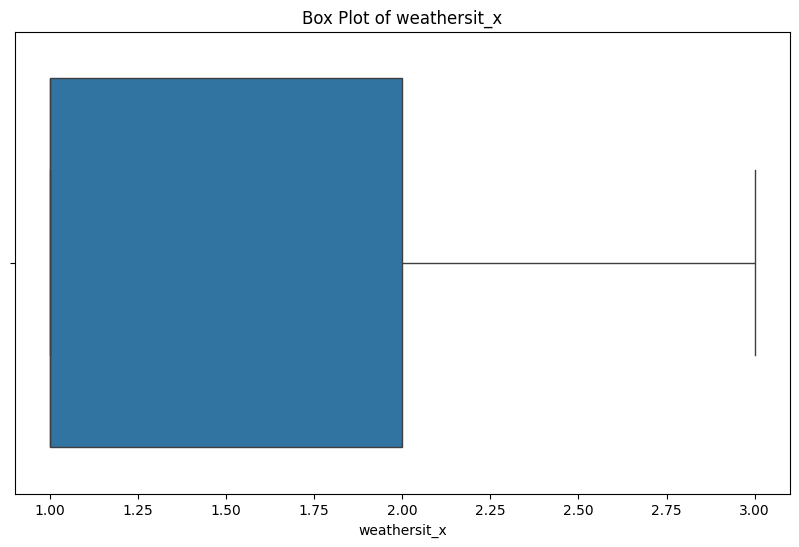

In [230]:
p = bike_df2['weathersit_x']
plt.figure(figsize=(10,6))
sns.boxplot(x=p)
plt.title('Box Plot of weathersit_x')
plt.show()

#### weathersit_y

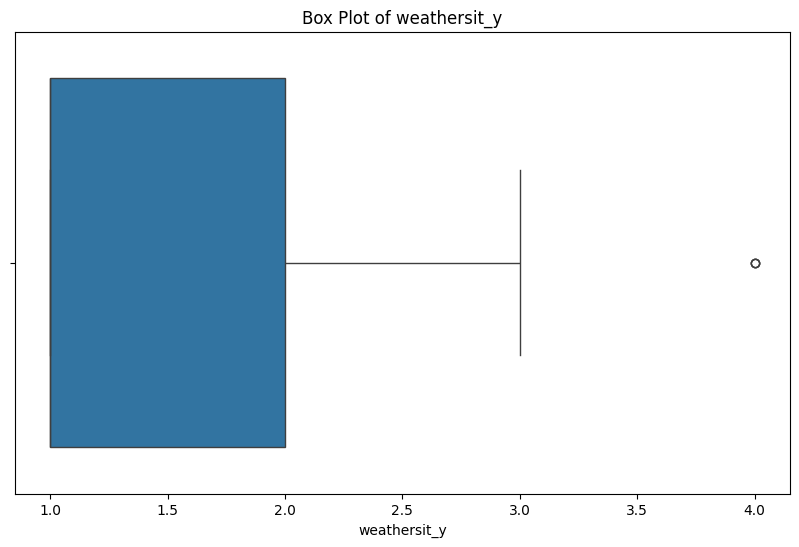

In [231]:
p = bike_df2['weathersit_y']
plt.figure(figsize=(10,6))
sns.boxplot(x=p)
plt.title('Box Plot of weathersit_y')
plt.show()

it is better to keep the outlier since weathersit 4 is a natural event when there was a storm in Washington DC at 2011-07-03

#### hum_x

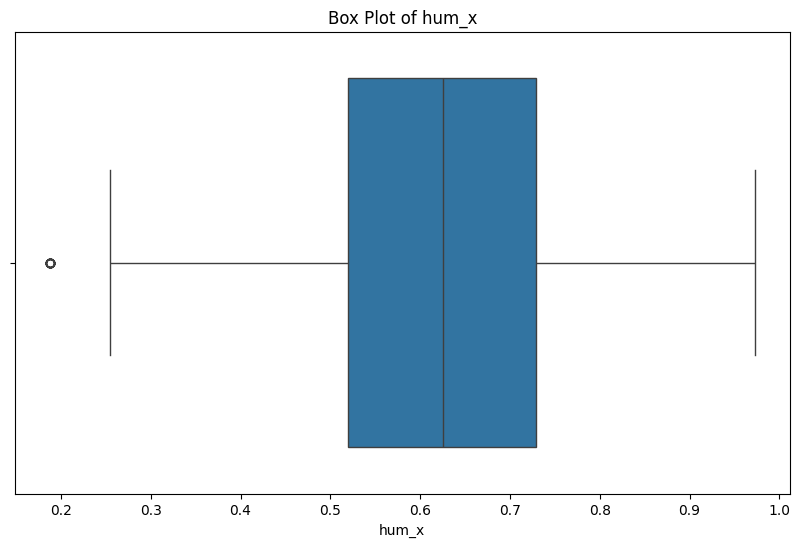

In [232]:
p = bike_df2['hum_x']
plt.figure(figsize=(10,6))
sns.boxplot(x=p)
plt.title('Box Plot of hum_x')
plt.show()

checking hum_x

In [233]:
bike_df2['hum_x'].describe(include='all')

count    17379.000000
mean         0.627965
std          0.140019
min          0.187917
25%          0.520000
50%          0.625833
75%          0.729583
max          0.972500
Name: hum_x, dtype: float64

entries checking

In [234]:
minhumbike_df2 = bike_df2[bike_df2['hum_x']<=0.3]
vminhumbike_df2 = minhumbike_df2[['dteday', 'season_x', 'hum_x', 'hum_y']]
vminhumbike_df2.groupby('dteday').count()

season_x  hum_x  hum_y
dteday                            
2011-02-19        24     24     24
2012-03-27        24     24     24
2012-04-07        24     24     24
2012-04-08        24     24     24

checking entries in a day

In [235]:
vminhumbike_df2[vminhumbike_df2['dteday'] == '2011-02-19']

dteday  season_x     hum_x  hum_y
1110  2011-02-19         1  0.187917   0.12
1111  2011-02-19         1  0.187917   0.14
1112  2011-02-19         1  0.187917   0.13
1113  2011-02-19         1  0.187917   0.14
1114  2011-02-19         1  0.187917   0.15
1115  2011-02-19         1  0.187917   0.15
1116  2011-02-19         1  0.187917   0.17
1117  2011-02-19         1  0.187917   0.17
1118  2011-02-19         1  0.187917   0.17
1119  2011-02-19         1  0.187917   0.16
1120  2011-02-19         1  0.187917   0.16
1121  2011-02-19         1  0.187917   0.16
1122  2011-02-19         1  0.187917   0.18
1123  2011-02-19         1  0.187917   0.16
1124  2011-02-19         1  0.187917   0.15
1125  2011-02-19         1  0.187917   0.16
1126  2011-02-19         1  0.187917   0.16
1127  2011-02-19         1  0.187917   0.19
1128  2011-02-19         1  0.187917   0.25
1129  2011-02-19         1  0.187917   0.29
1130  2011-02-19         1  0.187917   0.28
1131  2011-02-19         1  0.187917   0.26
1132  2011-02-19         1  0.187917   0.28
1133  2011-02-19         1  0.187917   0.33

comparing hum_x and avg hum_y

In [236]:
vminhumbike_df2.groupby('dteday')['hum_x'].mean()

dteday
2011-02-19    0.187917
2012-03-27    0.290000
2012-04-07    0.254167
2012-04-08    0.275833
Name: hum_x, dtype: float64

In [237]:
vminhumbike_df2.groupby('dteday')['hum_y'].mean()

dteday
2011-02-19    0.187917
2012-03-27    0.290000
2012-04-07    0.254167
2012-04-08    0.275833
Name: hum_y, dtype: float64

#### hum_y

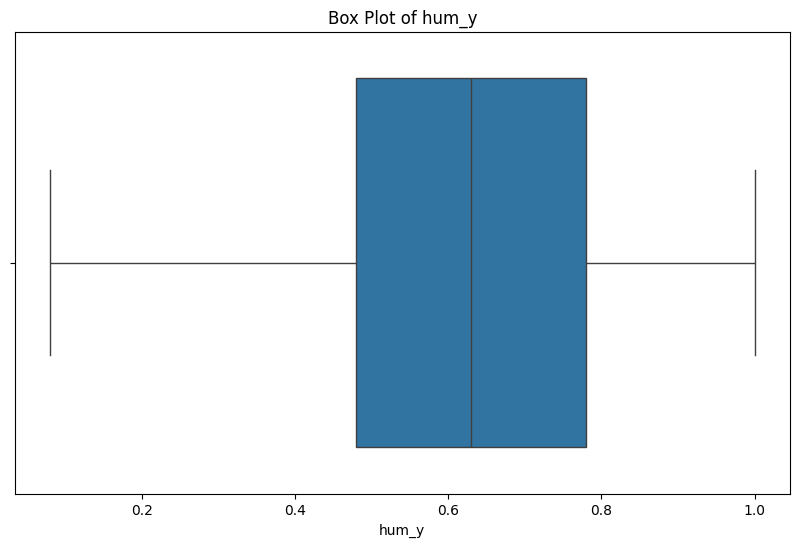

In [238]:
p = bike_df2['hum_y']
plt.figure(figsize=(10,6))
sns.boxplot(x=p)
plt.title('Box Plot of hum_y')
plt.show()

the humidity is already cleaned from outliers

#### windspeed_x

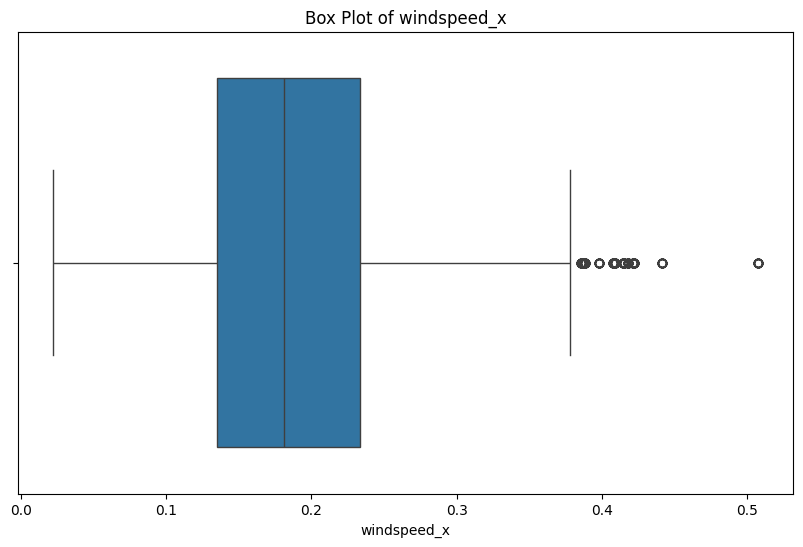

In [239]:
p = bike_df2['windspeed_x']
plt.figure(figsize=(10,6))
sns.boxplot(x=p)
plt.title('Box Plot of windspeed_x')
plt.show()

#### windspeed_y

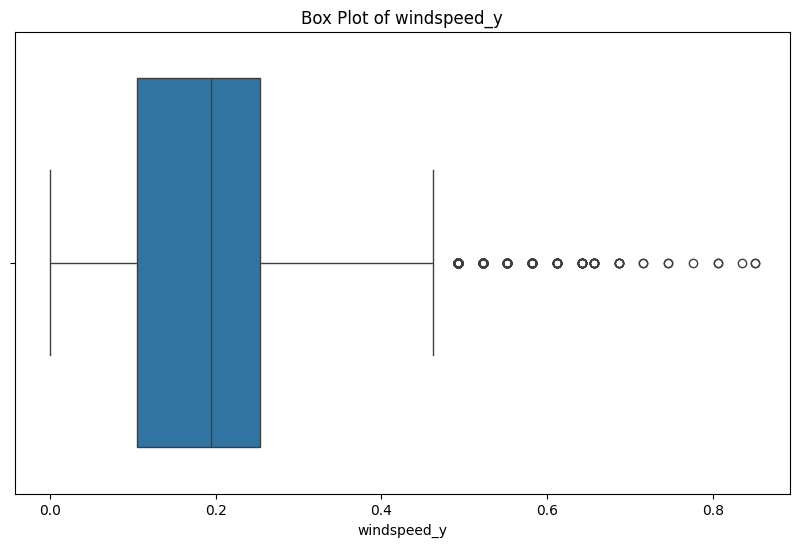

In [240]:
p = bike_df2['windspeed_y']
plt.figure(figsize=(10,6))
sns.boxplot(x=p)
plt.title('Box Plot of windspeed_y')
plt.show()

##### entries checking

In [241]:
bike_df2['windspeed_x'].describe(include='all')

count    17379.000000
mean         0.190098
std          0.077204
min          0.022392
25%          0.134950
50%          0.180967
75%          0.233204
max          0.507463
Name: windspeed_x, dtype: float64

In [242]:
outwindxbike_df2 = bike_df2[bike_df2['windspeed_x']>=0.4]
toutwindxbike_df2 = outwindxbike_df2[['dteday', 'season_x', 'windspeed_x']]
toutwindxbike_df2.groupby('dteday').count()

season_x  windspeed_x
dteday                           
2011-02-14        24           24
2011-02-19        24           24
2011-10-20        24           24
2012-01-18        24           24
2012-02-12        24           24
2012-02-25        24           24
2012-03-08        24           24
2012-03-09        24           24
2012-12-22        24           24

In [243]:
toutwindxbike_df2.groupby('dteday')[['windspeed_x','season_x']].mean()

windspeed_x  season_x
dteday                           
2011-02-14     0.417908       1.0
2011-02-19     0.507463       1.0
2011-10-20     0.422275       4.0
2012-01-18     0.415429       1.0
2012-02-12     0.409212       1.0
2012-02-25     0.421642       1.0
2012-03-08     0.441563       1.0
2012-03-09     0.414800       1.0
2012-12-22     0.407346       1.0

checking windspeed_y

In [244]:
outwindybike_df2 = bike_df2[bike_df2['windspeed_y']>=0.4]
toutwindybike_df2 = outwindxbike_df2[['dteday', 'season_x', 'windspeed_y']]
toutwindybike_df2.groupby('dteday').count()

season_x  windspeed_y
dteday                           
2011-02-14        24           24
2011-02-19        24           24
2011-10-20        24           24
2012-01-18        24           24
2012-02-12        24           24
2012-02-25        24           24
2012-03-08        24           24
2012-03-09        24           24
2012-12-22        24           24

In [245]:
toutwindybike_df2.groupby('dteday').mean()

season_x  windspeed_y
dteday                           
2011-02-14       1.0     0.417908
2011-02-19       1.0     0.507463
2011-10-20       4.0     0.422275
2012-01-18       1.0     0.415429
2012-02-12       1.0     0.409212
2012-02-25       1.0     0.421642
2012-03-08       1.0     0.441563
2012-03-09       1.0     0.414800
2012-12-22       1.0     0.407346

##### checking with IQR methods for windspeed_x

In [246]:
Q1 = bike_df2['windspeed_x'].quantile(0.25)
Q3 = bike_df2['windspeed_x'].quantile(0.75)
IQR = Q3-Q1

In [247]:
conditions = ((bike_df2['windspeed_x']< (Q1 - 1.5*IQR)) | (bike_df2['windspeed_x']>(Q3+1.5*IQR)))

In [248]:
conditions[conditions == True].count()/24

13.0

In [249]:
bike_df2OutlierWind = bike_df2.loc[conditions] 

In [250]:
bike_df2OutlierWind[['dteday', 'season_x', 'windspeed_x','holiday_x', 'weekday_x', 'workingday_x', 'weathersit_x',]]
bike_df2OutlierWind['season_x'].value_counts()
bike_df2OutlierWind['dteday'].value_counts()
bike_df2OutlierWind['holiday_x'].value_counts()
bike_df2OutlierWind['weekday_x'].value_counts()/24
bike_df2OutlierWind['workingday_x'].value_counts()/24
bike_df2OutlierWind['weathersit_x'].value_counts()

weathersit_x
1    240
2     72
Name: count, dtype: int64

##### checking with IQR methods for windspeed_y

In [251]:
Q1WY = bike_df2['windspeed_y'].quantile(0.25)
Q3WY = bike_df2['windspeed_y'].quantile(0.75)
IQRWY = Q3WY-Q1WY

In [252]:
conditionsWY = ((bike_df2['windspeed_y']< (Q1WY - 1.5*IQRWY)) | (bike_df2['windspeed_y']>(Q3WY+1.5*IQRWY)))

In [253]:
bike_df2OutlierWindY = bike_df2.loc[conditionsWY] 

In [254]:
bike_df2OutlierWindY[['dteday', 'season_x', 'windspeed_y','holiday_x', 'weekday_x', 'workingday_x', 'weathersit_x',]]

dteday  season_x  windspeed_y  holiday_x  weekday_x  workingday_x  \
175    2011-01-08         1       0.4925          0          6             0   
178    2011-01-08         1       0.5522          0          6             0   
194    2011-01-09         1       0.5224          0          0             0   
196    2011-01-09         1       0.5224          0          0             0   
265    2011-01-12         1       0.5821          0          3             1   
...           ...       ...          ...        ...        ...           ...   
17327  2012-12-29         1       0.5522          0          6             0   
17328  2012-12-29         1       0.4925          0          6             0   
17341  2012-12-30         1       0.5821          0          0             0   
17343  2012-12-30         1       0.5821          0          0             0   
17344  2012-12-30         1       0.6567          0          0             0   

       weathersit_x  
175               2  
178               2  
194               1  
196               1  
265               1  
...             ...  
17327             2  
17328             2  
17341             1  
17343             1  
17344             1  

[342 rows x 7 columns]

In [255]:
bike_df2['windspeed_y'].mean()*67

12.736539622532941

In [256]:
bike_df2['windspeed_y'].quantile(0.75)*67

16.997899999999998

In [257]:
bike_df2OutlierWindY['weathersit_x'].value_counts()

weathersit_x
1    220
2    101
3     21
Name: count, dtype: int64

In [258]:
bike_df2OutlierWindY['windspeed_y']*67

175      32.9975
178      36.9974
194      35.0008
196      35.0008
265      39.0007
          ...   
17327    36.9974
17328    32.9975
17341    39.0007
17343    39.0007
17344    43.9989
Name: windspeed_y, Length: 342, dtype: float64

we don't need to clear the outlier because it is the real data of windspeed value

#### casual_x

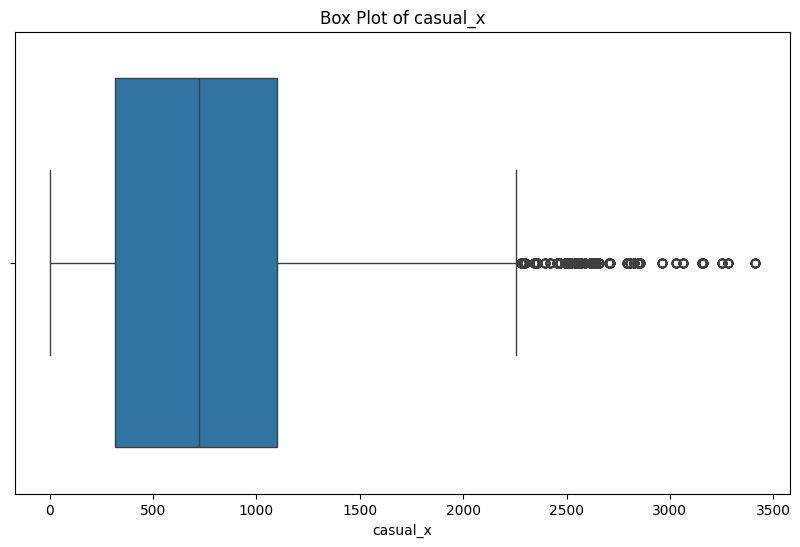

In [259]:
p = bike_df2['casual_x']
plt.figure(figsize=(10,6))
sns.boxplot(x=p)
plt.title('Box Plot of casual_x')
plt.show()


##### checking with IQR methods for casual_x

In [260]:
# checking outliers above quantile 

Q1CX = bike_df2['casual_x'].quantile(0.25)
Q3CX = bike_df2['casual_x'].quantile(0.75)
IQRCX = Q3CX-Q1CX


In [261]:
outliercheck = Q3CX+1.5*IQRCX

In [262]:
outlierCX = bike_df2[bike_df2['casual_x']> outliercheck]

In [263]:
outlierCX.value_counts()/24

instant_x  dteday      season_x  yr_x  mnth_x  holiday_x  weekday_x  workingday_x  weathersit_x  temp_x    atemp_x   hum_x     windspeed_x  casual_x  registered_x  cnt_x  instant_y  season_y  yr_y  mnth_y  hr  holiday_y  weekday_y  workingday_y  weathersit_y  temp_y  atemp_y  hum_y  windspeed_y  casual_y  registered_y  cnt_y
149        2011-05-29  2         0     5       0          0          0             1             0.667500  0.615550  0.818750  0.213938     2355      2433          4788   3459       2         0     5       0   0          0          0             1             0.64    0.5758   0.83   0.2239       32        51            83       0.041667
561        2012-07-14  3         1     7       0          6          0             2             0.703333  0.666042  0.699167  0.143679     2355      4614          6969   13329      3         1     7       13  0          6          0             2             0.76    0.7121   0.62   0.0896       219       372           591      0.04

In [264]:
conditionsCX = ((bike_df2['casual_x']< (Q1CX - 1.5*IQRCX)) | (bike_df2['casual_x']>(Q3CX+1.5*IQRCX)))

In [265]:
bike_df2OutlierCX = bike_df2.loc[conditionsCX] 

In [266]:
bike_df2OutlierCX['casual_x']

3458     2355
3459     2355
3460     2355
3461     2355
3462     2355
         ... 
16177    2290
16178    2290
16179    2290
16180    2290
16181    2290
Name: casual_x, Length: 1056, dtype: int64

In [267]:
len(bike_df2OutlierCX)/24

44.0

In [268]:
SortingOutliersCX = bike_df2OutlierCX[['dteday', 'casual_x']]
SortingOutliersCX = SortingOutliersCX.sort_values(SortingOutliersCX.columns[1], ascending=False)
SortingOutliersCX2 = SortingOutliersCX.sort_values(SortingOutliersCX.columns[1], ascending=False).groupby('casual_x').value_counts()
SortingOutliersCX3 = SortingOutliersCX2.tail(15)
valuesOfTails =  SortingOutliersCX3.index.get_level_values(0)
valuesOfTails

Index([2708, 2795, 2795, 2806, 2827, 2846, 2855, 2963, 3031, 3065, 3155, 3160,
       3252, 3283, 3410],
      dtype='int64', name='casual_x')

In [269]:
# checking holidays, weekdays, workingdays, seasons, months, weathersit
bike_df2OutlierCX[['dteday', 'casual_x', 'holiday_x', 'weekday_x', 'workingday_x', 'season_x', 'mnth_x', 'weathersit_x']]
bike_df2OutlierCX.groupby('dteday')['casual_x'].mean()
bike_df2OutlierCX['holiday_x'].value_counts()/24
bike_df2OutlierCX['weekday_x'].value_counts()/24
bike_df2OutlierCX['workingday_x'].value_counts()/24
bike_df2OutlierCX['season_x'].value_counts()/24
bike_df2OutlierCX['mnth_x'].value_counts()/24
bike_df2OutlierCX['weathersit_x'].value_counts()/24


weathersit_x
1    32.0
2    12.0
Name: count, dtype: float64

In [270]:
# checking maximum value of casual_x
casual_x_max = bike_df2OutlierCX[bike_df2OutlierCX['casual_x'].isin(valuesOfTails)]
casual_x_max[['dteday', 'casual_x', 'season_x','holiday_x', 'weekday_x']].groupby('dteday').value_counts()

dteday      casual_x  season_x  holiday_x  weekday_x
2011-07-04  3065      3         1          1            24
2012-03-17  3155      1         0          6            24
2012-04-07  3252      2         0          6            24
2012-04-14  2795      2         0          6            24
2012-04-15  2846      2         0          0            24
2012-05-19  3410      2         0          6            24
2012-05-26  2855      2         0          6            24
2012-05-27  3283      2         0          0            24
2012-06-02  2795      2         0          6            24
2012-06-09  2708      2         0          6            24
2012-06-16  2963      2         0          6            24
2012-08-18  2827      3         0          6            24
2012-09-15  3160      3         0          6            24
2012-10-06  3031      4         0          6            24
2012-10-20  2806      4         0          6            24
Name: count, dtype: int64

we dont need to delete outliers because it is already makes sense that most of the highest traffics are happened on weekends

#### casual_y

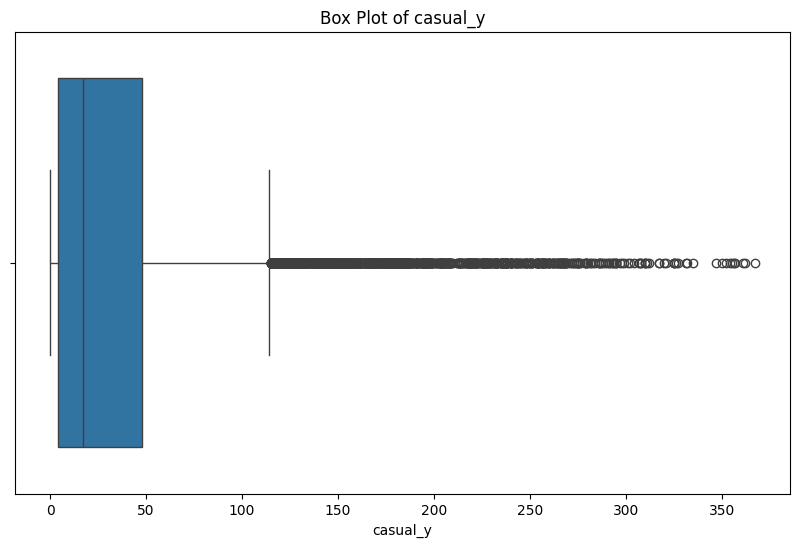

In [271]:
p = bike_df2['casual_y']
plt.figure(figsize=(10,6))
sns.boxplot(x=p)
plt.title('Box Plot of casual_y')
plt.show()

##### checking with IQR methods for casual_y

In [272]:
# checking outliers above quantile 

Q1CY = bike_df2['casual_y'].quantile(0.25)
Q3CY = bike_df2['casual_y'].quantile(0.75)
IQRCY = Q3CY-Q1CY


In [273]:
outliercheck = Q3CY+1.5*IQRCY
outliercheck 

114.0

In [274]:
outlierCY = bike_df2[bike_df2['casual_y']> outliercheck]
len(outlierCY)

1192

In [275]:
# creating conditions and making outliers dataframe 

conditionsCY = ((bike_df2['casual_y']< (Q1CY - 1.5*IQRCY)) | (bike_df2['casual_y']>(Q3CY+1.5*IQRCY)))
bike_df2OutlierCY = bike_df2.loc[conditionsCY] 
bike_df2OutlierCY['casual_y']

1633     144
1634     149
1635     124
1771     126
1772     174
        ... 
16817    122
16818    148
16819    164
16820    167
16821    139
Name: casual_y, Length: 1192, dtype: int64

In [276]:
# taking 15 maximum values
SortingOutliersCY = bike_df2OutlierCY[['dteday', 'casual_y']]
SortingOutliersCY2 = SortingOutliersCY.sort_values(SortingOutliersCY.columns[1], ascending=False).groupby('casual_y').value_counts()
SortingOutliersCY3 = SortingOutliersCY2.tail(15)
valuesOfTails =  SortingOutliersCY3.index.get_level_values(0)
valuesOfTails

Index([326, 327, 331, 332, 335, 347, 350, 352, 354, 355, 356, 357, 361, 362,
       367],
      dtype='int64', name='casual_y')

In [277]:
# checking holidays, weekdays, workingdays, seasons, months, weathersit
bike_df2OutlierCY[['dteday', 'hr', 'casual_y', 'holiday_x', 'weekday_x', 'workingday_x', 'season_x', 'mnth_x', 'weathersit_x']]
bike_df2OutlierCY.groupby('hr')['casual_y'].mean()
bike_df2OutlierCY['holiday_x'].value_counts()/24
bike_df2OutlierCY['weekday_x'].value_counts()/24
bike_df2OutlierCY['workingday_x'].value_counts()/24
bike_df2OutlierCY['season_x'].value_counts()/24
bike_df2OutlierCY['mnth_x'].value_counts()/24
bike_df2OutlierCY['weathersit_x'].value_counts()/24
bike_df2OutlierCY[['hr', 'casual_y']].sort_values('casual_y', ascending=False)

hr  casual_y
10477  16       367
15343  12       362
11985  14       361
10476  15       357
11986  15       356
...    ..       ...
4344   22       115
12518  19       115
3810   16       115
3612   10       115
13670  19       115

[1192 rows x 2 columns]

In [278]:
bike_df2OutlierCY['weekday_x'].value_counts()

weekday_x
6    522
0    473
5     78
1     61
3     24
4     22
2     12
Name: count, dtype: int64

In [279]:
bike_df2OutlierCY['hr'].value_counts()

hr
14    152
15    144
16    141
13    136
17    135
12    130
11    106
18     95
10     69
19     59
20     14
9       7
21      2
22      2
Name: count, dtype: int64

In [280]:
# checking maximum value of casual_x
casual_x_max = bike_df2OutlierCY[bike_df2OutlierCY['casual_y'].isin(valuesOfTails)]
casual_x_max[['dteday', 'casual_y', 'season_x','holiday_x', 'weekday_x']].groupby('dteday').value_counts()

dteday      casual_y  season_x  holiday_x  weekday_x
2012-03-17  352       1         0          6            1
            357       1         0          6            1
            367       1         0          6            1
2012-04-07  326       2         0          6            1
            354       2         0          6            1
            355       2         0          6            1
2012-05-19  331       2         0          6            1
            332       2         0          6            1
            356       2         0          6            1
            361       2         0          6            1
2012-09-15  327       3         0          6            1
            350       3         0          6            1
2012-10-06  362       4         0          6            1
2012-10-20  335       4         0          6            1
            347       4         0          6            1
Name: count, dtype: int64

we dont need to delete outliers because it is already makes sense that most of the highest traffics are happened on weekends

#### registered_x

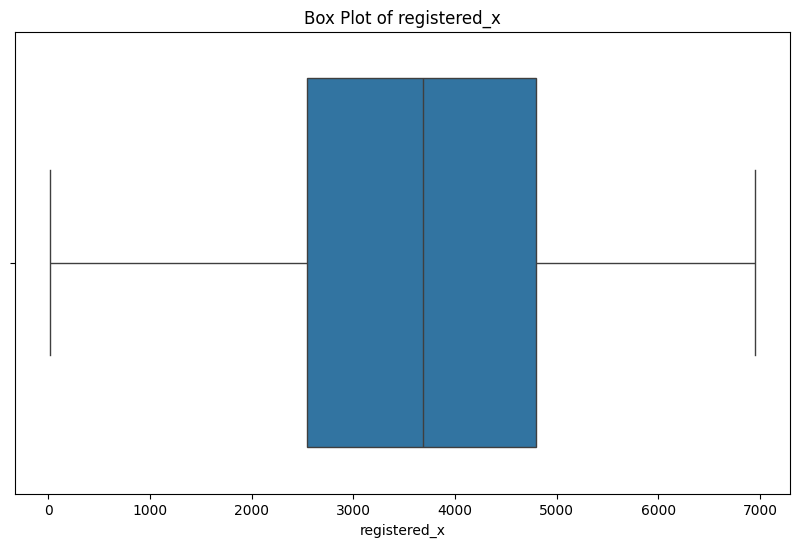

In [281]:
p = bike_df2['registered_x']
plt.figure(figsize=(10,6))
sns.boxplot(x=p)
plt.title('Box Plot of registered_x')
plt.show()

In [282]:
# checking outliers above quantile 
Q1RX = bike_df2['registered_x'].quantile(0.25)
Q3RX = bike_df2['registered_x'].quantile(0.75)
IQRRX = Q3RX-Q1RX

In [283]:
outliercheck = Q3RX+1.5*IQRRX
outliercheck

8185.0

In [284]:
outlierCX = bike_df2[bike_df2['casual_x']> outliercheck]
outlierCX.value_counts()

Series([], Name: count, dtype: int64)

there's no significant outliers

#### registered_y

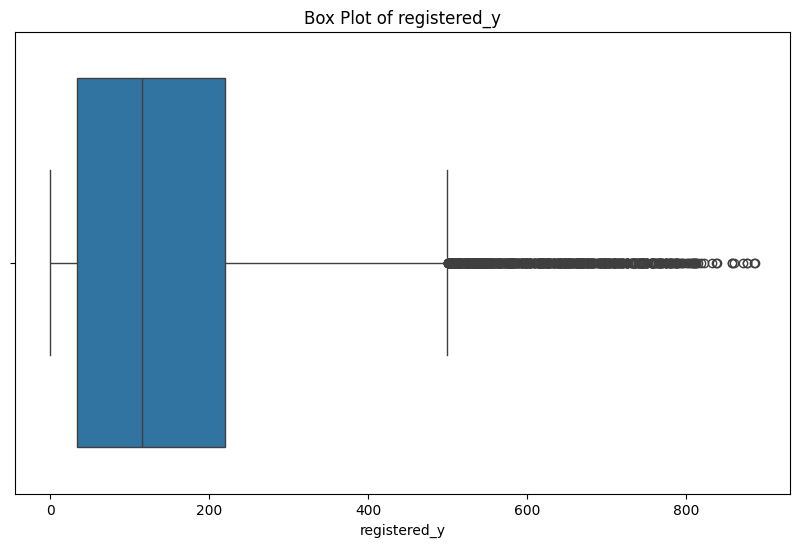

In [285]:
p = bike_df2['registered_y']
plt.figure(figsize=(10,6))
sns.boxplot(x=p)
plt.title('Box Plot of registered_y')
plt.show()

In [286]:
# checking outliers above quantile 

Q1RY = bike_df2['registered_y'].quantile(0.25)
Q3RY = bike_df2['registered_y'].quantile(0.75)
IQRRY = Q3RY-Q1RY

In [287]:
outliercheck = Q3RY+1.5*IQRRY 
outliercheck 

499.0

In [288]:
outlierRY = bike_df2[bike_df2['registered_y']> outliercheck]
outlierRY.value_counts()

instant_x  dteday      season_x  yr_x  mnth_x  holiday_x  weekday_x  workingday_x  weathersit_x  temp_x    atemp_x   hum_x     windspeed_x  casual_x  registered_x  cnt_x  instant_y  season_y  yr_y  mnth_y  hr  holiday_y  weekday_y  workingday_y  weathersit_y  temp_y  atemp_y  hum_y  windspeed_y  casual_y  registered_y  cnt_y
129        2011-05-09  2         0     5       0          1          1             1             0.532500  0.525246  0.588750  0.176000     664       3698          4362   2996       2         0     5       17  0          1          1             1             0.62    0.6212   0.38   0.2537       59        539           598      1
608        2012-08-30  3         1     8       0          4          1             1             0.706667  0.652779  0.590417  0.077117     1172      6541          7713   14463      3         1     8       19  0          4          1             1             0.76    0.6818   0.48   0.1343       78        532           610      1
607      

In [289]:
conditionsRY = ((bike_df2['registered_y']< (Q1RY - 1.5*IQRRY)) | (bike_df2['registered_y']>(Q3RY+1.5*IQRRY)))
bike_df2OutlierRY = bike_df2.loc[conditionsRY] 
bike_df2OutlierRY['registered_y'].sort_values(ascending=False)

14773    886
14964    885
15108    876
15780    876
15756    871
        ... 
11414    501
6412     500
14234    500
3668     500
13394    500
Name: registered_y, Length: 680, dtype: int64

In [290]:
len(bike_df2OutlierRY['registered_y'])

680

In [291]:
SortingOutliersRY = bike_df2OutlierRY[['dteday', 'registered_y']]
SortingOutliersRY2 = SortingOutliersRY.sort_values(SortingOutliersRY.columns[1], ascending=False).groupby('registered_y').value_counts()
SortingOutliersRY3 = SortingOutliersRY2.tail(15)
valuesOfTails =  SortingOutliersRY3.index.get_level_values(0) #indexnya multiindex, makanya harus ambil lewat get_level_values(), 0 disini adalah index kolomnnya
valuesOfTails

Index([812, 815, 818, 822, 833, 838, 839, 857, 857, 860, 871, 876, 876, 885,
       886],
      dtype='int64', name='registered_y')

In [292]:
# checking holidays, weekdays, workingdays, seasons, months, weathersit
bike_df2OutlierRY[['dteday', 'registered_y', 'holiday_x', 'weekday_x', 'workingday_x', 'season_x', 'mnth_x', 'weathersit_y']]
bike_df2OutlierRY.groupby('dteday')['registered_y'].mean()
bike_df2OutlierRY['holiday_x'].value_counts()
bike_df2OutlierRY['weekday_x'].value_counts()
bike_df2OutlierRY['workingday_x'].value_counts()
bike_df2OutlierRY['season_x'].value_counts()
bike_df2OutlierRY['mnth_x'].value_counts()
bike_df2OutlierRY['weathersit_y'].value_counts()
bike_df2OutlierRY['hr'].value_counts()

hr
17    224
8     196
18    184
19     50
7      23
12      2
14      1
Name: count, dtype: int64

In [293]:
bike_df2OutlierRY[bike_df2OutlierRY['hr']==17]['registered_y']

2995     539
3019     532
3067     540
3187     521
3379     524
        ... 
16918    540
16942    507
16966    582
17062    533
17086    536
Name: registered_y, Length: 224, dtype: int64

In [294]:
# checking maximum value of registered_y
registered_y_max = bike_df2OutlierRY[bike_df2OutlierRY['registered_y'].isin(valuesOfTails)]
registered_y_max [['dteday','hr', 'registered_y', 'season_x','holiday_x', 'weekday_x']].groupby('hr').value_counts()

hr  dteday      registered_y  season_x  holiday_x  weekday_x
17  2012-09-19  812           3         0          3            1
    2012-09-20  885           3         0          4            1
    2012-09-25  860           4         0          2            1
    2012-09-26  876           4         0          3            1
    2012-09-27  818           4         0          4            1
    2012-10-03  833           4         0          3            1
    2012-10-10  857           4         0          3            1
    2012-10-16  839           4         0          2            1
    2012-10-22  838           4         0          1            1
    2012-10-23  871           4         0          2            1
    2012-10-24  876           4         0          3            1
18  2012-09-10  857           3         0          1            1
    2012-09-12  886           3         0          3            1
    2012-09-26  815           4         0          3            1
    2012-09-27 

the outlier of registered_y is most likely at 17 and 18 where people are going home from work

#### cnt_x

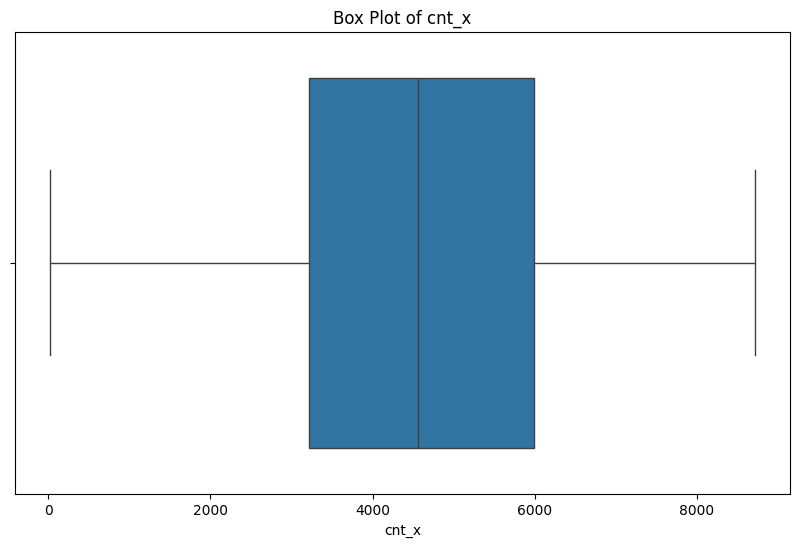

In [295]:
p = bike_df2['cnt_x']
plt.figure(figsize=(10,6))
sns.boxplot(x=p)
plt.title('Box Plot of cnt_x')
plt.show()

In [296]:
# checking outliers above quantile 
Q1CNTX = bike_df2['cnt_x'].quantile(0.25)
Q3CNTX = bike_df2['cnt_x'].quantile(0.75)
IQRCNTX = Q3CNTX-Q1CNTX

In [297]:
outliercheck = Q3CNTX+1.5*IQRCNTX
outliercheck

10144.0

In [298]:
outlierCNTX = bike_df2[bike_df2['cnt_x']> outliercheck]
outlierCNTX.value_counts()

Series([], Name: count, dtype: int64)

there's no outliers

#### cnt_y

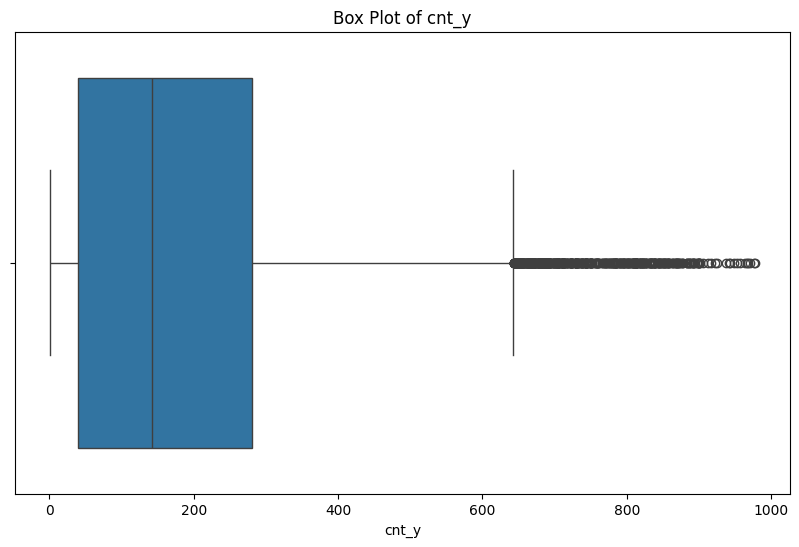

In [299]:
p = bike_df2['cnt_y']
plt.figure(figsize=(10,6))
sns.boxplot(x=p)
plt.title('Box Plot of cnt_y')
plt.show()

##### checking with IQR methods for cnt_y

In [300]:
# checking outliers above quantile 

Q1CNTY = bike_df2['cnt_y'].quantile(0.25)
Q3CNTY = bike_df2['cnt_y'].quantile(0.75)
IQRCNTY = Q3CNTY-Q1CNTY

In [301]:
outliercheck = Q3CNTY+1.5*IQRCNTY
outliercheck 

642.5

In [302]:
outlierCNTY = bike_df2[bike_df2['cnt_y']> outliercheck]
outlierCNTY.value_counts()

instant_x  dteday      season_x  yr_x  mnth_x  holiday_x  weekday_x  workingday_x  weathersit_x  temp_x    atemp_x   hum_x     windspeed_x  casual_x  registered_x  cnt_x  instant_y  season_y  yr_y  mnth_y  hr  holiday_y  weekday_y  workingday_y  weathersit_y  temp_y  atemp_y  hum_y  windspeed_y  casual_y  registered_y  cnt_y
235        2011-08-23  3         0     8       0          2          1             1             0.640833  0.606067  0.455417  0.146763     1281      4614          5895   5537       3         0     8       14  0          2          1             1             0.72    0.6515   0.30   0.0896       149       502           651      1
619        2012-09-10  3         1     9       0          1          1             1             0.583333  0.565654  0.503750  0.258713     1118      6407          7525   14726      3         1     9       18  0          1          1             1             0.62    0.6212   0.35   0.2985       111       857           968      1
623      

In [303]:
conditionsCNTY = ((bike_df2['cnt_y']< (Q1CNTY - 1.5*IQRCNTY)) | (bike_df2['cnt_y']>(Q3CNTY+1.5*IQRCNTY)))
bike_df2OutlierCNTY  = bike_df2.loc[conditionsCNTY] 
bike_df2OutlierCNTY['cnt_y']
len(bike_df2OutlierCNTY)

505

In [304]:
SortingOutliersCNTY = bike_df2OutlierCNTY[['dteday', 'cnt_y']]
SortingOutliersCNTY2 = SortingOutliersCNTY.sort_values(SortingOutliersCNTY.columns[1], ascending=False).groupby('cnt_y').value_counts()
SortingOutliersCNTY3 = SortingOutliersCNTY2.tail(15)
valuesOfTails =  SortingOutliersCNTY3.index.get_level_values(0)
valuesOfTails

Index([917, 922, 925, 938, 941, 943, 948, 953, 957, 963, 967, 968, 970, 976,
       977],
      dtype='int64', name='cnt_y')

In [305]:
# checking holidays, weekdays, workingdays, seasons, months, weathersit
bike_df2OutlierCNTY[['dteday', 'cnt_y', 'holiday_x', 'weekday_x', 'workingday_x','hr', 'season_x', 'mnth_x', 'weathersit_y']]
bike_df2OutlierCNTY.groupby('hr')['cnt_y'].mean()
bike_df2OutlierCNTY['holiday_x'].value_counts()
bike_df2OutlierCNTY['weekday_x'].value_counts()
bike_df2OutlierCNTY['workingday_x'].value_counts()
bike_df2OutlierCNTY['season_x'].value_counts()
bike_df2OutlierCNTY['mnth_x'].value_counts()
bike_df2OutlierCNTY['weathersit_y'].value_counts()
bike_df2OutlierCNTY['hr'].value_counts()

hr
17    153
18    129
8     127
13     23
12     17
14     15
19     14
15     13
16     12
11      2
Name: count, dtype: int64

In [306]:
# checking maximum value of cnt_y
cnt_y_max = bike_df2OutlierCNTY[bike_df2OutlierCNTY['cnt_y'].isin(valuesOfTails)]
cnt_y_max[['dteday', 'cnt_y','hr', 'weathersit_y','season_x','holiday_x', 'weekday_x']].groupby('hr').value_counts()

hr  dteday      cnt_y  weathersit_y  season_x  holiday_x  weekday_x
17  2012-03-23  957    2             2         0          5            1
    2012-09-11  970    1             3         0          2            1
    2012-09-12  925    1             3         0          3            1
    2012-09-20  976    1             3         0          4            1
    2012-09-25  967    1             4         0          2            1
    2012-09-26  953    1             4         0          3            1
    2012-10-03  917    1             4         0          3            1
    2012-10-10  948    1             4         0          3            1
    2012-10-16  943    1             4         0          2            1
    2012-10-22  922    1             4         0          1            1
    2012-10-23  938    1             4         0          2            1
    2012-10-24  963    1             4         0          3            1
18  2012-08-23  941    1             3         0        

the outlier of cnt_y is most likely at 17 and 18 where people are going home from work

## Exploratory Data Analysis (EDA)

What to do in EDA:
- Standardisasi vs Normalisasi (normalized, but I have to do standardization) [DONE]
- Check Data Duplicates [DONE]
- Showing Missing Values [DONE]
- Data Types Conversion [DONE]
- Label Encoding vs One Hot Encoding (labeled using label encoding already but i'll choose one-hot encoding) [DONE]
- Distribution analysis [DONE]
- Correlation analysis [DONE]



### Standardization vs Normalization 

**listing all the columns**

In [307]:
bike_df2.columns

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y',
       'weekday_y', 'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y',
       'hum_y', 'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')

**checking every columns, are they label encoded/one-hot encoded? are they standardized or normalized?**

In [308]:
## checking every columns

bike_df2["atemp_x"].value_counts()

atemp_x
0.654688    96
0.637008    72
0.375621    72
0.325750    48
0.243058    48
            ..
0.203600    16
0.232333    12
0.309909    11
0.219700     8
0.439400     1
Name: count, Length: 690, dtype: int64

- columns ['season_x', 'yr_x', 'mnth_x', 'holiday_x','weekday_x', 'workingday_x', 'weathersit_x', 'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y','weekday_y', 'workingday_y', 'weathersit_y'] are already label encoded

- columns ['temp_x', 'atemp_x', 'hum_x', 'windspeed_x', 'temp_y', 'atemp_y', 'hum_y', 'windspeed_y'] are already normalized


#### check the distribution

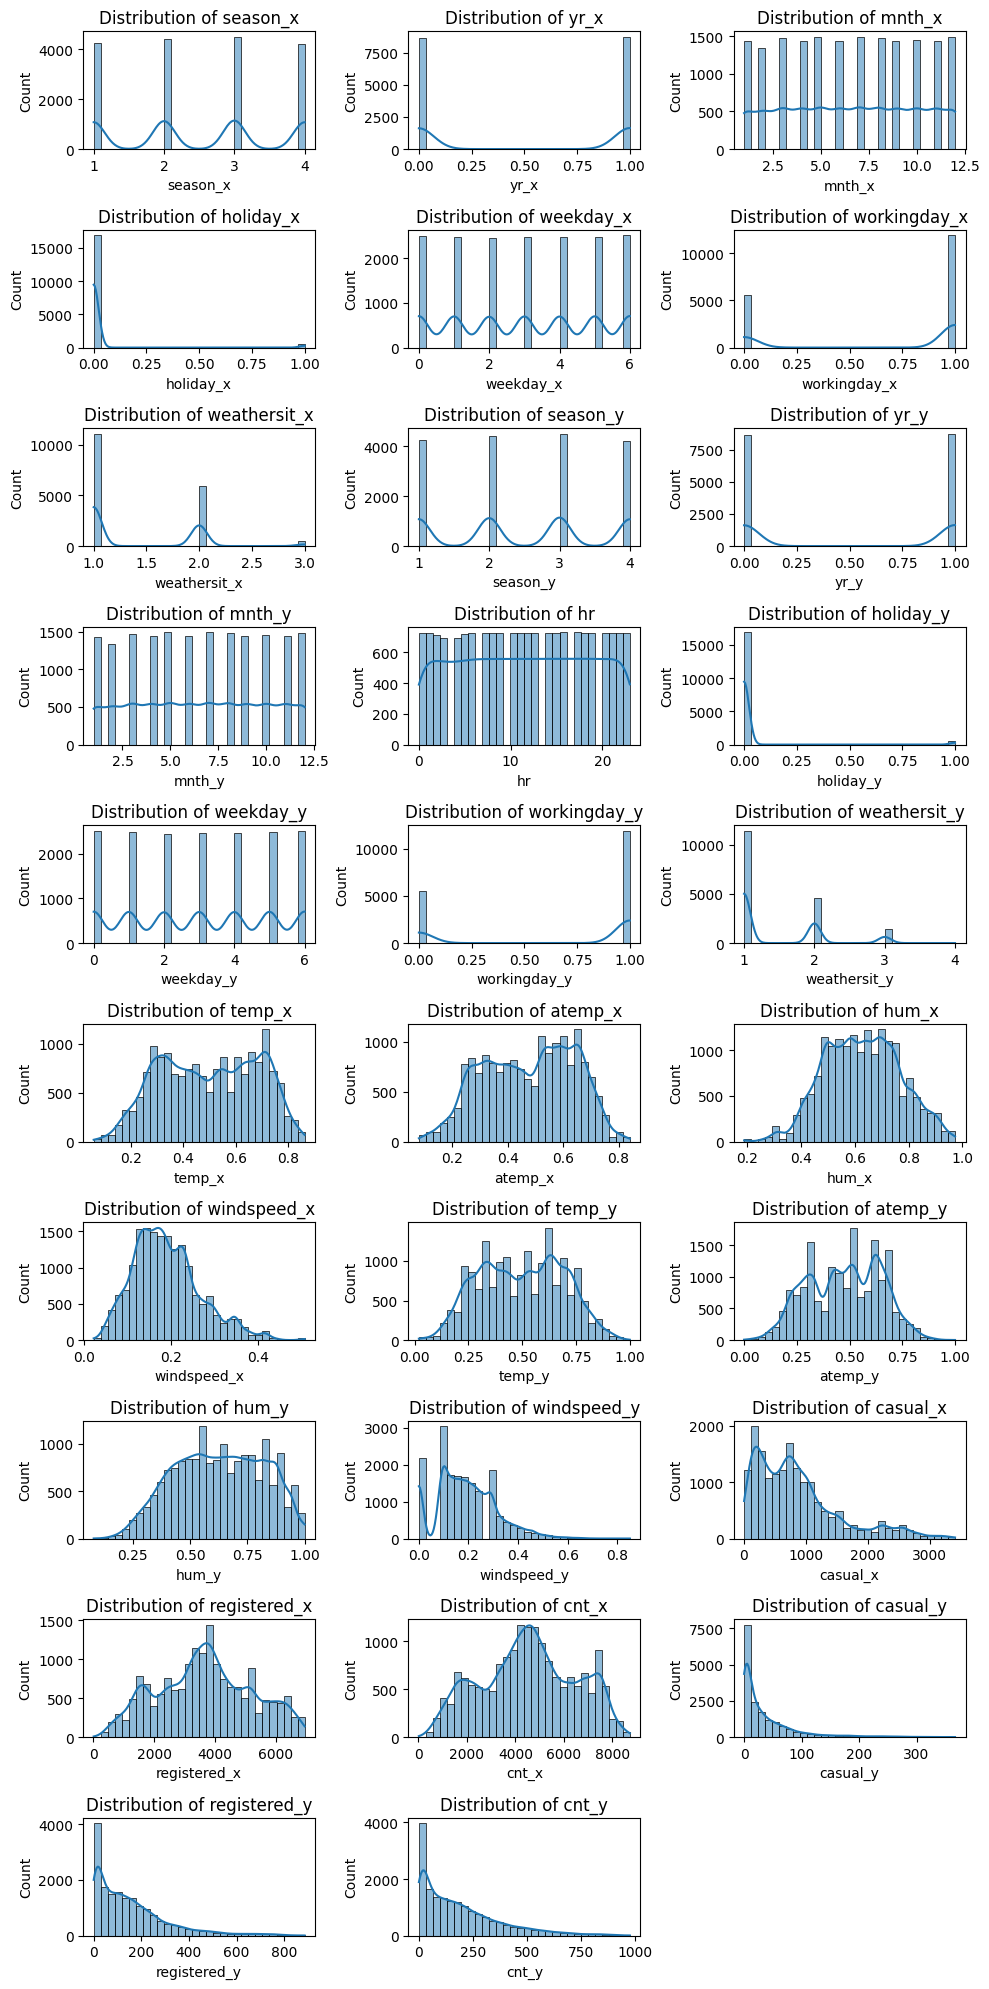

In [309]:
columns_to_plot = ['season_x', 'yr_x', 'mnth_x', 'holiday_x','weekday_x', 'workingday_x', 'weathersit_x', 'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y','weekday_y', 'workingday_y', 'weathersit_y', 'temp_x', 'atemp_x', 'hum_x', 'windspeed_x', 'temp_y', 'atemp_y', 'hum_y', 'windspeed_y', 'casual_x', 'registered_x', 'cnt_x', 'casual_y', 'registered_y', 'cnt_y']

plt.figure(figsize=(10,20))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(10,3,i)
    sns.histplot(bike_df2[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}') # 

plt.tight_layout()
plt.show()

- how to know whether or not a distribution is normal? **saphiro test**
- what are the things that has to be considered before choosing between standardization or normalization? **check question file**


my data: 
- one label encoded ['season_x', 'yr_x', 'mnth_x', 'holiday_x','weekday_x', 'workingday_x', 'weathersit_x', 'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y','weekday_y', 'workingday_y', 'weathersit_y']
- i suspect i'll use regression for predicting the value of this ['casual_x', 'registered_x', 'cnt_x', 'casual_y', 'registered_y', 'cnt_y']
- some variables are normalized ['temp_x', 'atemp_x', 'hum_x', 'windspeed_x', 'temp_y', 'atemp_y', 'hum_y', 'windspeed_y']
- is it normally distributed? **it is not**

In [310]:
from scipy.stats import shapiro

# Misalnya untuk kolom 'temp_x'
kolom2 = ['temp_x', 'atemp_x', 'hum_x', 'windspeed_x',
         'temp_y', 'atemp_y', 'hum_y', 'windspeed_y', 
         'casual_x', 'registered_x', 'cnt_x', 
         'casual_y', 'registered_y', 'cnt_y']

for kolom in kolom2: 
    stat, p = shapiro(bike_df2[kolom])
    print('Statistic=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print(f'Distribusi  {kolom} kemungkinan normal')
    else:
        print(f'Distribusi  {kolom} TIDAK normal')

Statistic=0.966, p=0.000
Distribusi  temp_x TIDAK normal
Statistic=0.974, p=0.000
Distribusi  atemp_x TIDAK normal
Statistic=0.995, p=0.000
Distribusi  hum_x TIDAK normal
Statistic=0.971, p=0.000
Distribusi  windspeed_x TIDAK normal
Statistic=0.978, p=0.000
Distribusi  temp_y TIDAK normal
Statistic=0.981, p=0.000
Distribusi  atemp_y TIDAK normal
Statistic=0.979, p=0.000
Distribusi  hum_y TIDAK normal
Statistic=0.959, p=0.000
Distribusi  windspeed_y TIDAK normal
Statistic=0.885, p=0.000
Distribusi  casual_x TIDAK normal
Statistic=0.984, p=0.000
Distribusi  registered_x TIDAK normal
Statistic=0.980, p=0.000
Distribusi  cnt_x TIDAK normal
Statistic=0.707, p=0.000
Distribusi  casual_y TIDAK normal
Statistic=0.851, p=0.000
Distribusi  registered_y TIDAK normal
Statistic=0.873, p=0.000
Distribusi  cnt_y TIDAK normal


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17379.
  res = hypotest_fun_out(*samples, **kwds)


**The data is not normally distributed**

#### what model I will use

- **the data is not normally distributed**, so is it better to use normalization over standardization? **I shall choose standardization**
- **i want to use regression model**, which regression model to use when I the data is using normalization? **LINEAR REGRESSION FOR START**

#### choose standardization or normalization

**standardization**

- first and foremost we have to go back to the real data
- use standardiization

#### denormalization

**back to normal data**

'temp_x', 'temp_y' multiplied to 41 (max)

'atemp_x', 'atemp_y' multiplied to 50 (max)

'hum_x', 'hum_y' multiplied to 100 (max)

'windspeed_x', 'windspeed_y' multiplied to 67 (max) mph

In [311]:
# ambil kolom bike_df2 [['temp_x, temp_y']] lalu kalikan 41, masukkan ke variabel baru 
temp_df = bike_df2[['temp_x', 'temp_y']]*41

# ambil kolom bike_df2 [['atemp_x, atemp_y']] lalu kalikan 50, masukkan ke variabel baru 
atemp_df = bike_df2[['atemp_x', 'atemp_y']]*50

# ambil kolom bike_df2 [['hum_x, hum_y']] lalu kalikan 100, masukkan ke variabel baru 
hum_df = bike_df2[['hum_x', 'hum_y']]*100

# ambil kolom bike_df2 [['windspeed_x, windspeed_y']] lalu kalikan 67, masukkan ke variabel baru 
windspeed_df = bike_df2[['windspeed_x', 'windspeed_y']]*67

# masukkan semua variabel baru untuk semua nilai yang sudah di denormalisasi ke dalam sebuah dataframe
denormalize_data_df = pd.concat([temp_df, atemp_df, hum_df, windspeed_df], axis=1)
# bike_df3 = bike_df2[columns_to_choose]

# masukkan ke dataframe bike_df3
datasx_from_df2 = bike_df2.iloc[:, 0:9]
datasy_from_df2 = bike_df2.iloc[:, 16:25]
targetx_from_df2 = bike_df2.iloc[:, 13:16]
targety_from_df2 = bike_df2.iloc[:, 29:32]
#bike_df3 = pd.concat[]
bike_df3 = pd.concat([datasx_from_df2, datasy_from_df2, denormalize_data_df, targetx_from_df2, targety_from_df2], axis=1)
bike_df3


instant_x      dteday  season_x  yr_x  mnth_x  holiday_x  weekday_x  \
0              1  2011-01-01         1     0       1          0          6   
1              1  2011-01-01         1     0       1          0          6   
2              1  2011-01-01         1     0       1          0          6   
3              1  2011-01-01         1     0       1          0          6   
4              1  2011-01-01         1     0       1          0          6   
...          ...         ...       ...   ...     ...        ...        ...   
17374        731  2012-12-31         1     1      12          0          1   
17375        731  2012-12-31         1     1      12          0          1   
17376        731  2012-12-31         1     1      12          0          1   
17377        731  2012-12-31         1     1      12          0          1   
17378        731  2012-12-31         1     1      12          0          1   

       workingday_x  weathersit_x  instant_y  ...    hum_x  hum_y  \
0                 0             2          1  ...  80.5833   81.0   
1                 0             2          2  ...  80.5833   80.0   
2                 0             2          3  ...  80.5833   80.0   
3                 0             2          4  ...  80.5833   75.0   
4                 0             2          5  ...  80.5833   75.0   
...             ...           ...        ...  ...      ...    ...   
17374             1             2      17375  ...  57.7500   60.0   
17375             1             2      17376  ...  57.7500   60.0   
17376             1             2      17377  ...  57.7500   60.0   
17377             1             2      17378  ...  57.7500   56.0   
17378             1             2      17379  ...  57.7500   65.0   

       windspeed_x  windspeed_y  casual_x  registered_x  cnt_x  casual_y  \
0        10.749882       0.0000       331           654    985         3   
1        10.749882       0.0000       331           654    985         8   
2        10.749882       0.0000       331           654    985         5   
3        10.749882       0.0000       331           654    985         3   
4        10.749882       0.0000       331           654    985         0   
...            ...          ...       ...           ...    ...       ...   
17374    10.374682      11.0014       439          2290   2729        11   
17375    10.374682      11.0014       439          2290   2729         8   
17376    10.374682      11.0014       439          2290   2729         7   
17377    10.374682       8.9981       439          2290   2729        13   
17378    10.374682       8.9981       439          2290   2729        12   

       registered_y  cnt_y  
0                13     16  
1                32     40  
2                27     32  
3                10     13  
4                 1      1  
...             ...    ...  
17374           108    119  
17375            81     89  
17376            83     90  
17377            48     61  
17378            37     49  

[17379 rows x 32 columns]

**the data is already denormalized**

#### standardization 

In [312]:
print(denormalize_data_df.columns)

Index(['temp_x', 'temp_y', 'atemp_x', 'atemp_y', 'hum_x', 'hum_y',
       'windspeed_x', 'windspeed_y'],
      dtype='object')


In [313]:
from sklearn.preprocessing import StandardScaler

# standardisasi fitur numerik 

scaler = StandardScaler()
bike_df3[denormalize_data_df.columns] = scaler.fit_transform(bike_df3[denormalize_data_df.columns])


Text(0.5, 1.0, 'Histogram Sebelum Standardisasi')

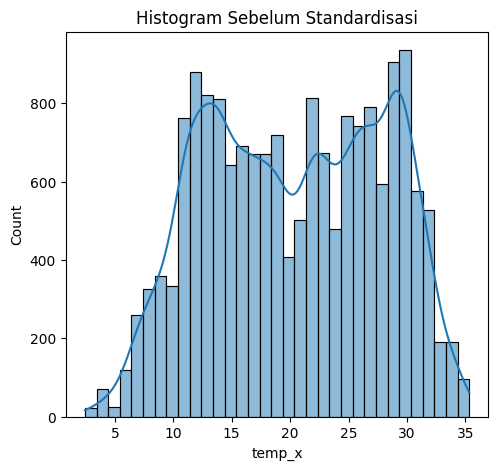

In [314]:
# histogram sebelum standardisasi 

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(denormalize_data_df['temp_x'],kde=True)
plt.title('Histogram Sebelum Standardisasi')

Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

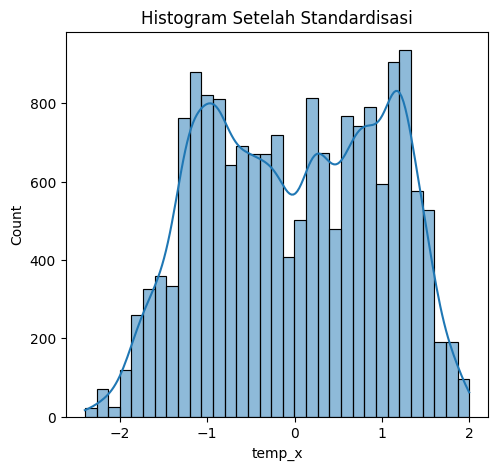

In [315]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(bike_df3['temp_x'],kde=True)
plt.title('Histogram Setelah Standardisasi')

### Check Data Duplicates

In [316]:
# Identifying duplicated rows
duplicates = bike_df3.duplicated()

print("Duplicated Rows")
print(bike_df3[duplicates])

Duplicated Rows
Empty DataFrame
Columns: [instant_x, dteday, season_x, yr_x, mnth_x, holiday_x, weekday_x, workingday_x, weathersit_x, instant_y, season_y, yr_y, mnth_y, hr, holiday_y, weekday_y, workingday_y, weathersit_y, temp_x, temp_y, atemp_x, atemp_y, hum_x, hum_y, windspeed_x, windspeed_y, casual_x, registered_x, cnt_x, casual_y, registered_y, cnt_y]
Index: []

[0 rows x 32 columns]


**there's no duplicated data**

### Showing Missing Values 

In [317]:

missing_values = bike_df3.isnull().sum()
missing_values[missing_values > 0 ]

Series([], dtype: int64)

**There's no Missing Values**

## Deleting Some Columns

These columns have similar value to the other columns, deleting them makes the model run efficiently

delet kolom: 
```
instant_x, instant_y, dteday, season_x, yr_x, mnth_x, holiday_x, weekday_x,workingday_x,weathersit_x
```

In [318]:
bike_df3.columns

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'instant_y', 'season_y',
       'yr_y', 'mnth_y', 'hr', 'holiday_y', 'weekday_y', 'workingday_y',
       'weathersit_y', 'temp_x', 'temp_y', 'atemp_x', 'atemp_y', 'hum_x',
       'hum_y', 'windspeed_x', 'windspeed_y', 'casual_x', 'registered_x',
       'cnt_x', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')

In [319]:
bike_df3 = bike_df3.iloc[:, 10:]
bike_df3.columns

Index(['season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y', 'weekday_y',
       'workingday_y', 'weathersit_y', 'temp_x', 'temp_y', 'atemp_x',
       'atemp_y', 'hum_x', 'hum_y', 'windspeed_x', 'windspeed_y', 'casual_x',
       'registered_x', 'cnt_x', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')

### Data Types Conversion 

In [320]:
bike_df3.columns

Index(['season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y', 'weekday_y',
       'workingday_y', 'weathersit_y', 'temp_x', 'temp_y', 'atemp_x',
       'atemp_y', 'hum_x', 'hum_y', 'windspeed_x', 'windspeed_y', 'casual_x',
       'registered_x', 'cnt_x', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')

**choosing categorical features**

In [321]:
category_features = bike_df3[['season_y','yr_y', 'mnth_y', 'hr', 'holiday_y', 'weekday_y', 'workingday_y',
       'weathersit_y']]
df3_category = category_features.columns
df3_category 

Index(['season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y', 'weekday_y',
       'workingday_y', 'weathersit_y'],
      dtype='object')

cara lebih cepat bisa pakai 

``` 
category_cols = [col for col in bike_df3.columns if any(kw in col for kw in ['season_', 'yr_', 'mnth_', 'holiday_', 'weekday_', 'workingday_', 'weathersit_']) or col == 'hr']
category_features = bike_df3[category_cols]
```

atau 

```
cols = '''
season_x yr_x mnth_x holiday_x weekday_x workingday_x weathersit_x
season_y yr_y mnth_y hr holiday_y weekday_y workingday_y weathersit_y
'''.split()
category_features = bike_df3[cols]
```

### One-hot Encoding

In [322]:
df3_one_hot = pd.get_dummies(bike_df3, columns= df3_category)
df3_one_hot 

temp_x    temp_y   atemp_x   atemp_y     hum_x     hum_y  \
0     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.949852   
1     -0.837646 -1.438516 -0.690488 -1.181732  1.270349  0.897674   
2     -0.837646 -1.438516 -0.690488 -1.181732  1.270349  0.897674   
3     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.636786   
4     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.636786   
...         ...       ...       ...       ...       ...       ...   
17374 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17375 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17376 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17377 -1.541077 -1.230779 -1.553293 -1.181732 -0.360423 -0.354586   
17378 -1.541077 -1.230779 -1.553293 -1.181732 -0.360423  0.115011   

       windspeed_x  windspeed_y  casual_x  registered_x  ...  weekday_y_3  \
0        -0.384078    -1.553889       331           654  ...        False   
1        -0.384078    -1.553889       331           654  ...        False   
2        -0.384078    -1.553889       331           654  ...        False   
3        -0.384078    -1.553889       331           654  ...        False   
4        -0.384078    -1.553889       331           654  ...        False   
...            ...          ...       ...           ...  ...          ...   
17374    -0.456615    -0.211691       439          2290  ...        False   
17375    -0.456615    -0.211691       439          2290  ...        False   
17376    -0.456615    -0.211691       439          2290  ...        False   
17377    -0.456615    -0.456099       439          2290  ...        False   
17378    -0.456615    -0.456099       439          2290  ...        False   

       weekday_y_4  weekday_y_5  weekday_y_6  workingday_y_0  workingday_y_1  \
0            False        False         True            True           False   
1            False        False         True            True           False   
2            False        False         True            True           False   
3            False        False         True            True           False   
4            False        False         True            True           False   
...            ...          ...          ...             ...             ...   
17374        False        False        False           False            True   
17375        False        False        False           False            True   
17376        False        False        False           False            True   
17377        False        False        False           False            True   
17378        False        False        False           False            True   

       weathersit_y_1  weathersit_y_2  weathersit_y_3  weathersit_y_4  
0                True           False           False           False  
1                True           False           False           False  
2                True           False           False           False  
3                True           False           False           False  
4                True           False           False           False  
...               ...             ...             ...             ...  
17374           False            True           False           False  
17375           False            True           False           False  
17376            True           False           False           False  
17377            True           False           False           False  
17378            True           False           False           False  

[17379 rows x 71 columns]

**checking the columns list**

In [323]:
df3_one_hot.columns

Index(['temp_x', 'temp_y', 'atemp_x', 'atemp_y', 'hum_x', 'hum_y',
       'windspeed_x', 'windspeed_y', 'casual_x', 'registered_x', 'cnt_x',
       'casual_y', 'registered_y', 'cnt_y', 'season_y_1', 'season_y_2',
       'season_y_3', 'season_y_4', 'yr_y_0', 'yr_y_1', 'mnth_y_1', 'mnth_y_2',
       'mnth_y_3', 'mnth_y_4', 'mnth_y_5', 'mnth_y_6', 'mnth_y_7', 'mnth_y_8',
       'mnth_y_9', 'mnth_y_10', 'mnth_y_11', 'mnth_y_12', 'hr_0', 'hr_1',
       'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_y_0',
       'holiday_y_1', 'weekday_y_0', 'weekday_y_1', 'weekday_y_2',
       'weekday_y_3', 'weekday_y_4', 'weekday_y_5', 'weekday_y_6',
       'workingday_y_0', 'workingday_y_1', 'weathersit_y_1', 'weathersit_y_2',
       'weathersit_y_3', 'weathersit_y_4'],
      dtype='object')

In [324]:
for col in df3_one_hot.columns:
    print(col)

temp_x
temp_y
atemp_x
atemp_y
hum_x
hum_y
windspeed_x
windspeed_y
casual_x
registered_x
cnt_x
casual_y
registered_y
cnt_y
season_y_1
season_y_2
season_y_3
season_y_4
yr_y_0
yr_y_1
mnth_y_1
mnth_y_2
mnth_y_3
mnth_y_4
mnth_y_5
mnth_y_6
mnth_y_7
mnth_y_8
mnth_y_9
mnth_y_10
mnth_y_11
mnth_y_12
hr_0
hr_1
hr_2
hr_3
hr_4
hr_5
hr_6
hr_7
hr_8
hr_9
hr_10
hr_11
hr_12
hr_13
hr_14
hr_15
hr_16
hr_17
hr_18
hr_19
hr_20
hr_21
hr_22
hr_23
holiday_y_0
holiday_y_1
weekday_y_0
weekday_y_1
weekday_y_2
weekday_y_3
weekday_y_4
weekday_y_5
weekday_y_6
workingday_y_0
workingday_y_1
weathersit_y_1
weathersit_y_2
weathersit_y_3
weathersit_y_4


In [325]:
print(', '. join(df3_one_hot.columns))

temp_x, temp_y, atemp_x, atemp_y, hum_x, hum_y, windspeed_x, windspeed_y, casual_x, registered_x, cnt_x, casual_y, registered_y, cnt_y, season_y_1, season_y_2, season_y_3, season_y_4, yr_y_0, yr_y_1, mnth_y_1, mnth_y_2, mnth_y_3, mnth_y_4, mnth_y_5, mnth_y_6, mnth_y_7, mnth_y_8, mnth_y_9, mnth_y_10, mnth_y_11, mnth_y_12, hr_0, hr_1, hr_2, hr_3, hr_4, hr_5, hr_6, hr_7, hr_8, hr_9, hr_10, hr_11, hr_12, hr_13, hr_14, hr_15, hr_16, hr_17, hr_18, hr_19, hr_20, hr_21, hr_22, hr_23, holiday_y_0, holiday_y_1, weekday_y_0, weekday_y_1, weekday_y_2, weekday_y_3, weekday_y_4, weekday_y_5, weekday_y_6, workingday_y_0, workingday_y_1, weathersit_y_1, weathersit_y_2, weathersit_y_3, weathersit_y_4


### Distribution Analysis

In [326]:
# mengubah ke data df4

bike_df4 = df3_one_hot
bike_df4

temp_x    temp_y   atemp_x   atemp_y     hum_x     hum_y  \
0     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.949852   
1     -0.837646 -1.438516 -0.690488 -1.181732  1.270349  0.897674   
2     -0.837646 -1.438516 -0.690488 -1.181732  1.270349  0.897674   
3     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.636786   
4     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.636786   
...         ...       ...       ...       ...       ...       ...   
17374 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17375 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17376 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17377 -1.541077 -1.230779 -1.553293 -1.181732 -0.360423 -0.354586   
17378 -1.541077 -1.230779 -1.553293 -1.181732 -0.360423  0.115011   

       windspeed_x  windspeed_y  casual_x  registered_x  ...  weekday_y_3  \
0        -0.384078    -1.553889       331           654  ...        False   
1        -0.384078    -1.553889       331           654  ...        False   
2        -0.384078    -1.553889       331           654  ...        False   
3        -0.384078    -1.553889       331           654  ...        False   
4        -0.384078    -1.553889       331           654  ...        False   
...            ...          ...       ...           ...  ...          ...   
17374    -0.456615    -0.211691       439          2290  ...        False   
17375    -0.456615    -0.211691       439          2290  ...        False   
17376    -0.456615    -0.211691       439          2290  ...        False   
17377    -0.456615    -0.456099       439          2290  ...        False   
17378    -0.456615    -0.456099       439          2290  ...        False   

       weekday_y_4  weekday_y_5  weekday_y_6  workingday_y_0  workingday_y_1  \
0            False        False         True            True           False   
1            False        False         True            True           False   
2            False        False         True            True           False   
3            False        False         True            True           False   
4            False        False         True            True           False   
...            ...          ...          ...             ...             ...   
17374        False        False        False           False            True   
17375        False        False        False           False            True   
17376        False        False        False           False            True   
17377        False        False        False           False            True   
17378        False        False        False           False            True   

       weathersit_y_1  weathersit_y_2  weathersit_y_3  weathersit_y_4  
0                True           False           False           False  
1                True           False           False           False  
2                True           False           False           False  
3                True           False           False           False  
4                True           False           False           False  
...               ...             ...             ...             ...  
17374           False            True           False           False  
17375           False            True           False           False  
17376            True           False           False           False  
17377            True           False           False           False  
17378            True           False           False           False  

[17379 rows x 71 columns]

In [327]:
print(', '.join(bike_df4.columns))

temp_x, temp_y, atemp_x, atemp_y, hum_x, hum_y, windspeed_x, windspeed_y, casual_x, registered_x, cnt_x, casual_y, registered_y, cnt_y, season_y_1, season_y_2, season_y_3, season_y_4, yr_y_0, yr_y_1, mnth_y_1, mnth_y_2, mnth_y_3, mnth_y_4, mnth_y_5, mnth_y_6, mnth_y_7, mnth_y_8, mnth_y_9, mnth_y_10, mnth_y_11, mnth_y_12, hr_0, hr_1, hr_2, hr_3, hr_4, hr_5, hr_6, hr_7, hr_8, hr_9, hr_10, hr_11, hr_12, hr_13, hr_14, hr_15, hr_16, hr_17, hr_18, hr_19, hr_20, hr_21, hr_22, hr_23, holiday_y_0, holiday_y_1, weekday_y_0, weekday_y_1, weekday_y_2, weekday_y_3, weekday_y_4, weekday_y_5, weekday_y_6, workingday_y_0, workingday_y_1, weathersit_y_1, weathersit_y_2, weathersit_y_3, weathersit_y_4


In [328]:
#df4_col_to_vis = bike_df4.columns
df4_vis = bike_df4
df4_vis

temp_x    temp_y   atemp_x   atemp_y     hum_x     hum_y  \
0     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.949852   
1     -0.837646 -1.438516 -0.690488 -1.181732  1.270349  0.897674   
2     -0.837646 -1.438516 -0.690488 -1.181732  1.270349  0.897674   
3     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.636786   
4     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.636786   
...         ...       ...       ...       ...       ...       ...   
17374 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17375 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17376 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17377 -1.541077 -1.230779 -1.553293 -1.181732 -0.360423 -0.354586   
17378 -1.541077 -1.230779 -1.553293 -1.181732 -0.360423  0.115011   

       windspeed_x  windspeed_y  casual_x  registered_x  ...  weekday_y_3  \
0        -0.384078    -1.553889       331           654  ...        False   
1        -0.384078    -1.553889       331           654  ...        False   
2        -0.384078    -1.553889       331           654  ...        False   
3        -0.384078    -1.553889       331           654  ...        False   
4        -0.384078    -1.553889       331           654  ...        False   
...            ...          ...       ...           ...  ...          ...   
17374    -0.456615    -0.211691       439          2290  ...        False   
17375    -0.456615    -0.211691       439          2290  ...        False   
17376    -0.456615    -0.211691       439          2290  ...        False   
17377    -0.456615    -0.456099       439          2290  ...        False   
17378    -0.456615    -0.456099       439          2290  ...        False   

       weekday_y_4  weekday_y_5  weekday_y_6  workingday_y_0  workingday_y_1  \
0            False        False         True            True           False   
1            False        False         True            True           False   
2            False        False         True            True           False   
3            False        False         True            True           False   
4            False        False         True            True           False   
...            ...          ...          ...             ...             ...   
17374        False        False        False           False            True   
17375        False        False        False           False            True   
17376        False        False        False           False            True   
17377        False        False        False           False            True   
17378        False        False        False           False            True   

       weathersit_y_1  weathersit_y_2  weathersit_y_3  weathersit_y_4  
0                True           False           False           False  
1                True           False           False           False  
2                True           False           False           False  
3                True           False           False           False  
4                True           False           False           False  
...               ...             ...             ...             ...  
17374           False            True           False           False  
17375           False            True           False           False  
17376            True           False           False           False  
17377            True           False           False           False  
17378            True           False           False           False  

[17379 rows x 71 columns]

In [329]:
# distribution visualization 
df4_col_to_vis = df4_vis.columns
length = len(df4_col_to_vis)

n_cols = 4
n_rows = -(-length//n_cols)

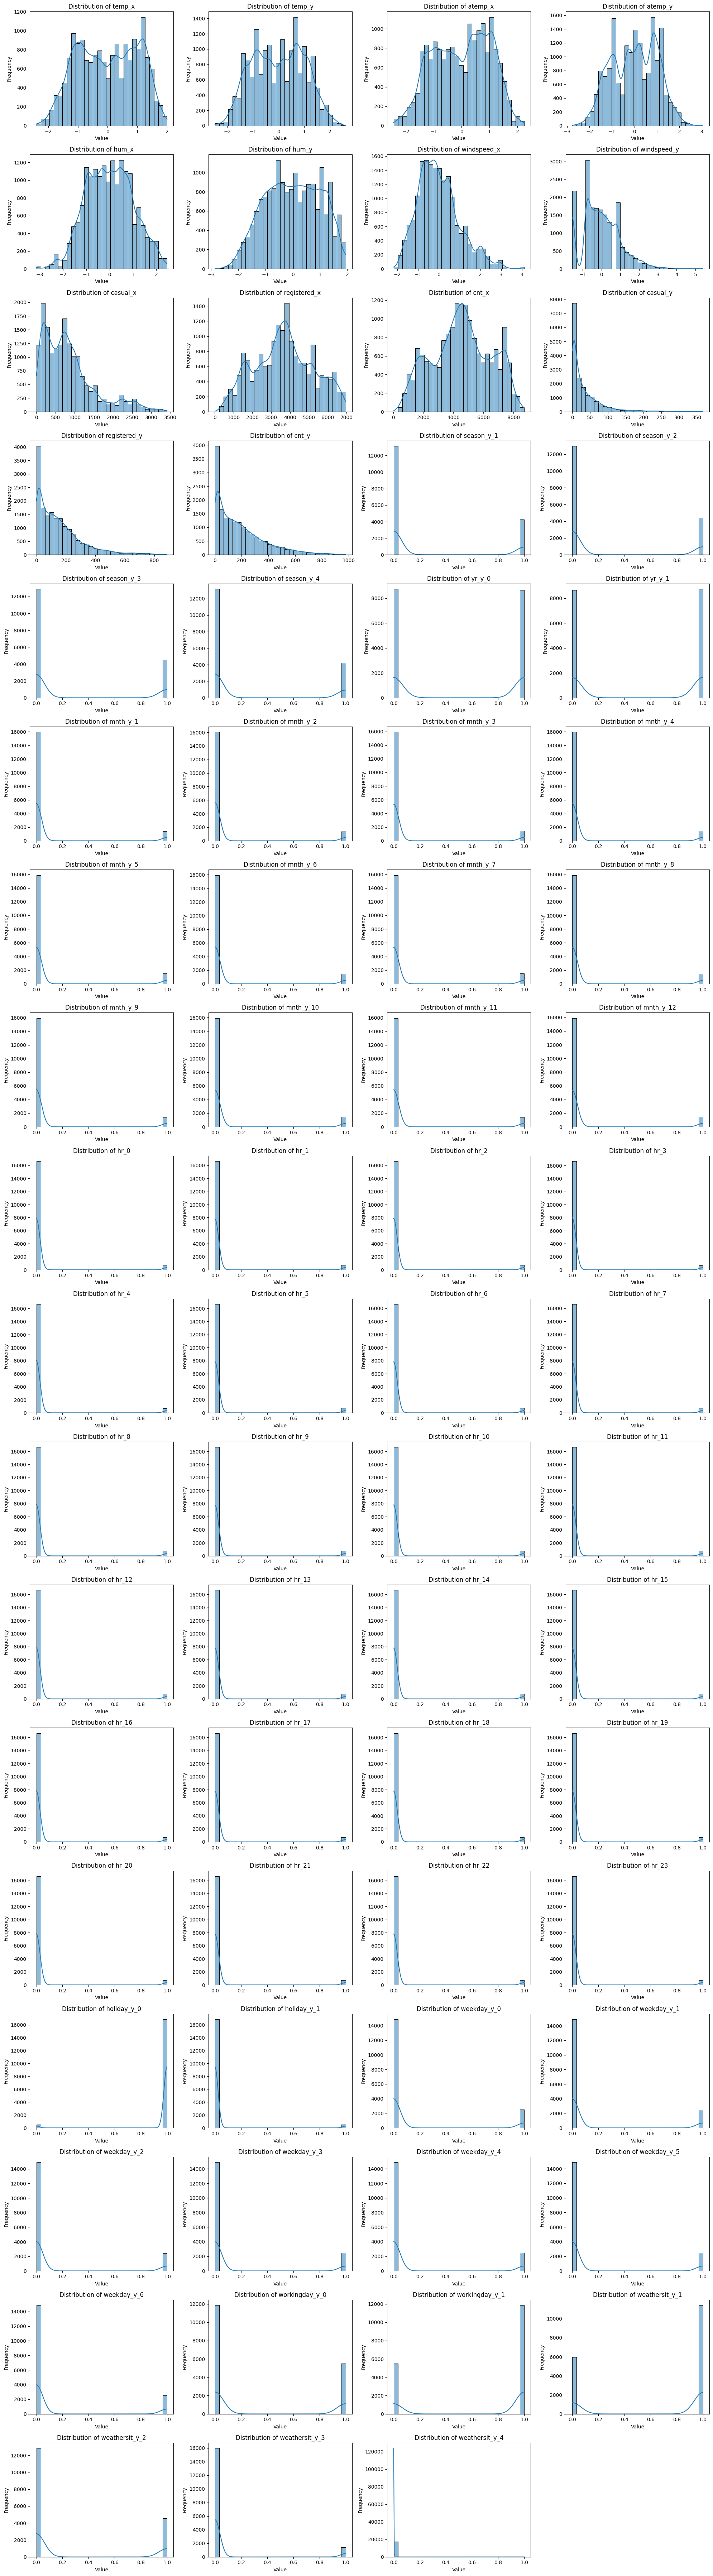

In [330]:
# distribution visualization 
df4_col_to_vis = df4_vis.columns
length = len(df4_col_to_vis)

n_cols = 4
n_rows = -(-length//n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,n_rows*4)) #figsize=(lebar, tinggi)

axes = axes.flatten() 

for i, column in enumerate(df4_col_to_vis):
    sns.histplot(data=df4_vis, x=column, ax=axes[i], bins=30, kde=True, edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')


# menghapus subplot yang tidak terpakai (jika ada)
for j in range(i +1, len(axes)): # i + 1 sampai len(axes) adalah sisa subplot yang gak dipakai.
    fig.delaxes(axes[j])

# menyesuaikan layput agar lebih rapi
plt.tight_layout()
plt.show()


I shall ask what 

``` 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,n_rows*4)) #figsize=(lebar, tinggi)

axes = axes.flatten() 

for i, column in enumerate(df4_col_to_vis):
    sns.histplot(data=df4_vis, x=column, ax=axes[i], bins=30, kde=True, edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')


# menghapus subplot yang tidak terpakai (jika ada)
for j in range(i +1, len(axes)): # i + 1 sampai len(axes) adalah sisa subplot yang gak dipakai.
    fig.delaxes(axes[j])
``` 

``` axes ``` itu apa?


### Correlation Analysis

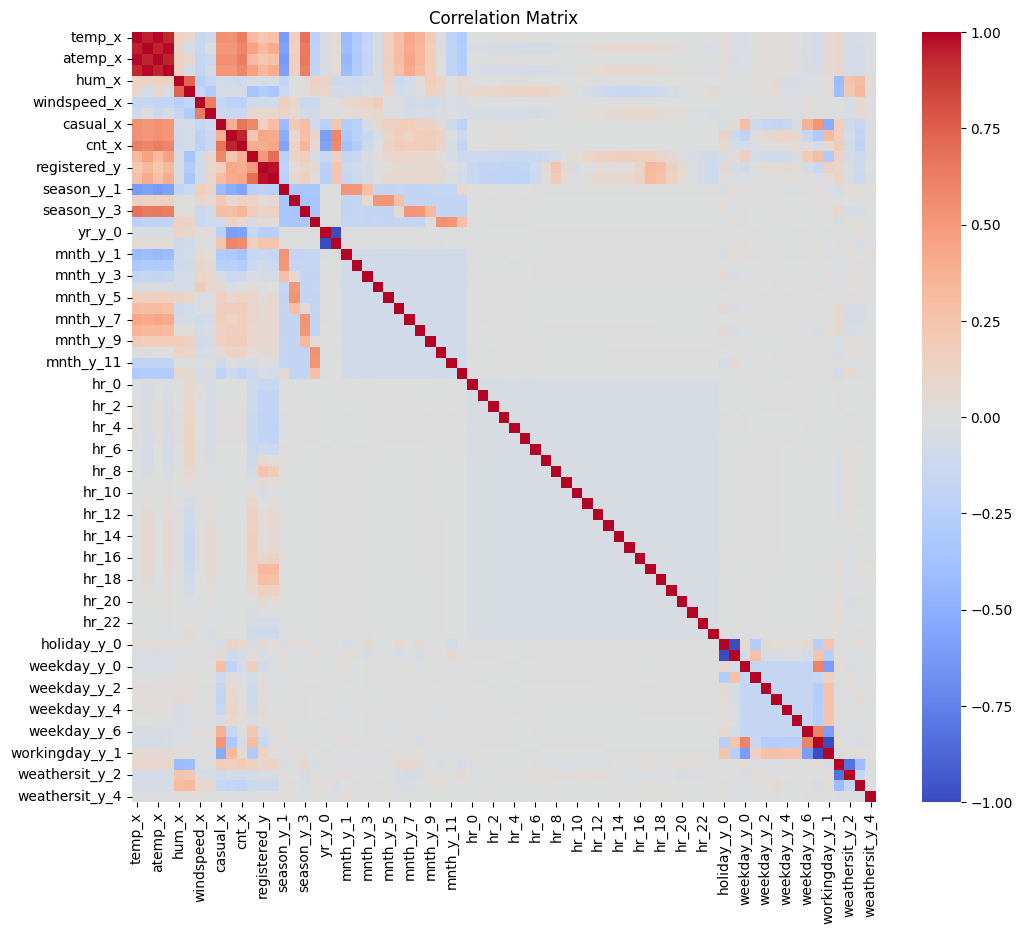

In [331]:
# visualisasi korelasi antar variabel numerik 

plt.figure(figsize=(12,10))
correlation_matrix = df4_vis.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

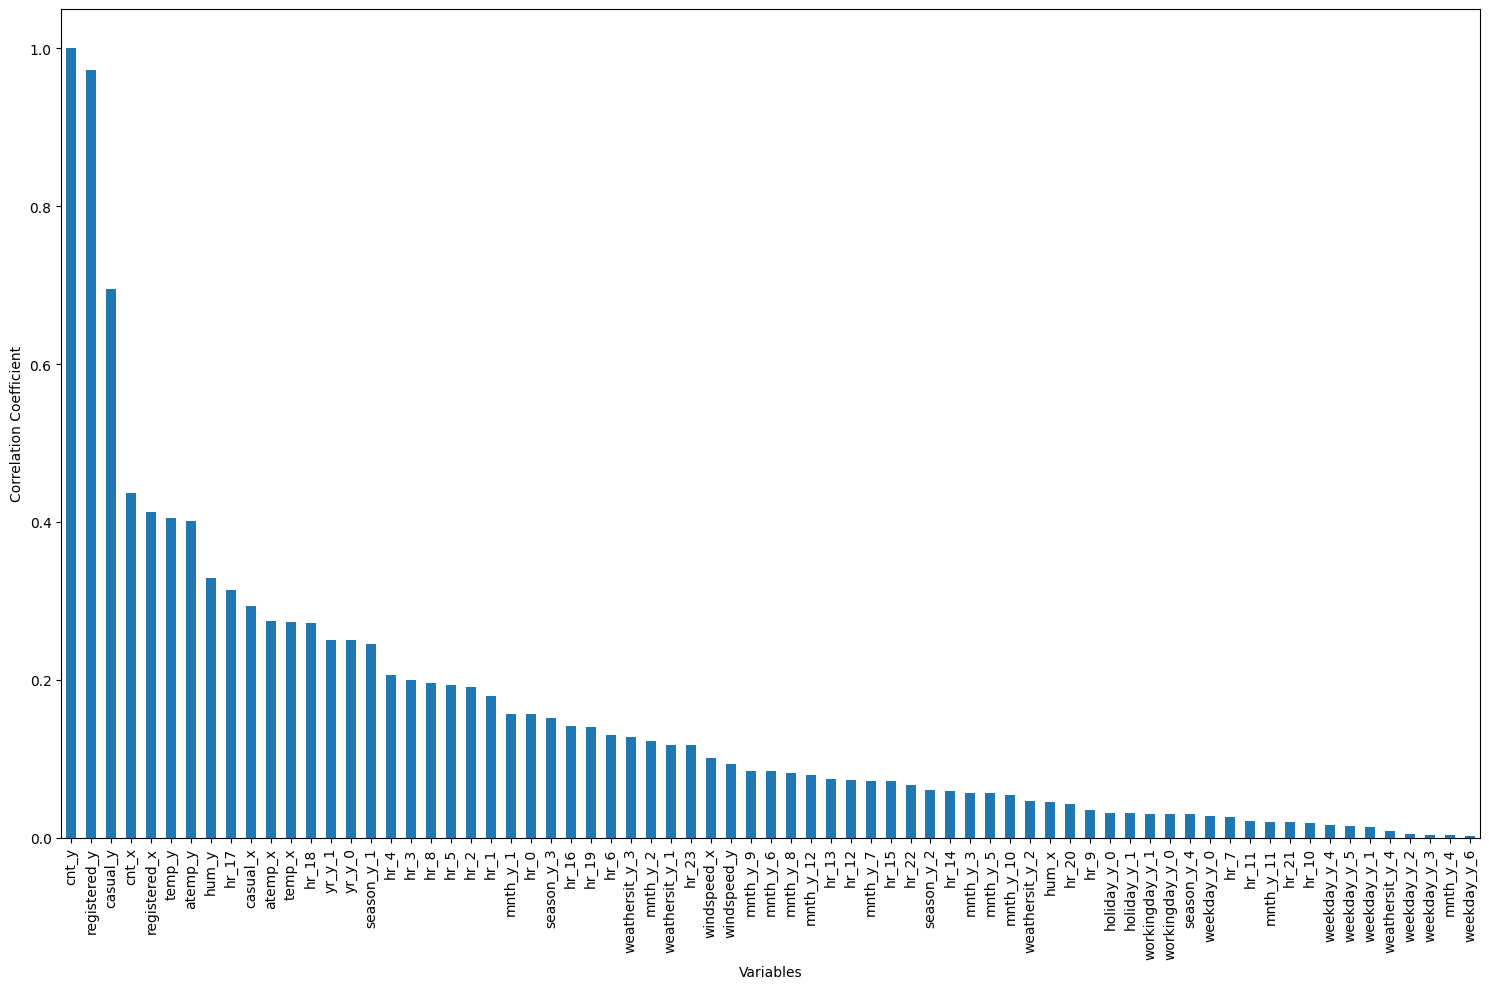

In [332]:
# menghitung korelasi antara variabel target dan semua variabel lainnya 
target_corr = df4_vis.corr()['cnt_y']

# mengurutkan hasil korelasi berdasarkan korelasi 
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(15,10)) #sumbu x, sumbu y 
target_corr_sorted.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

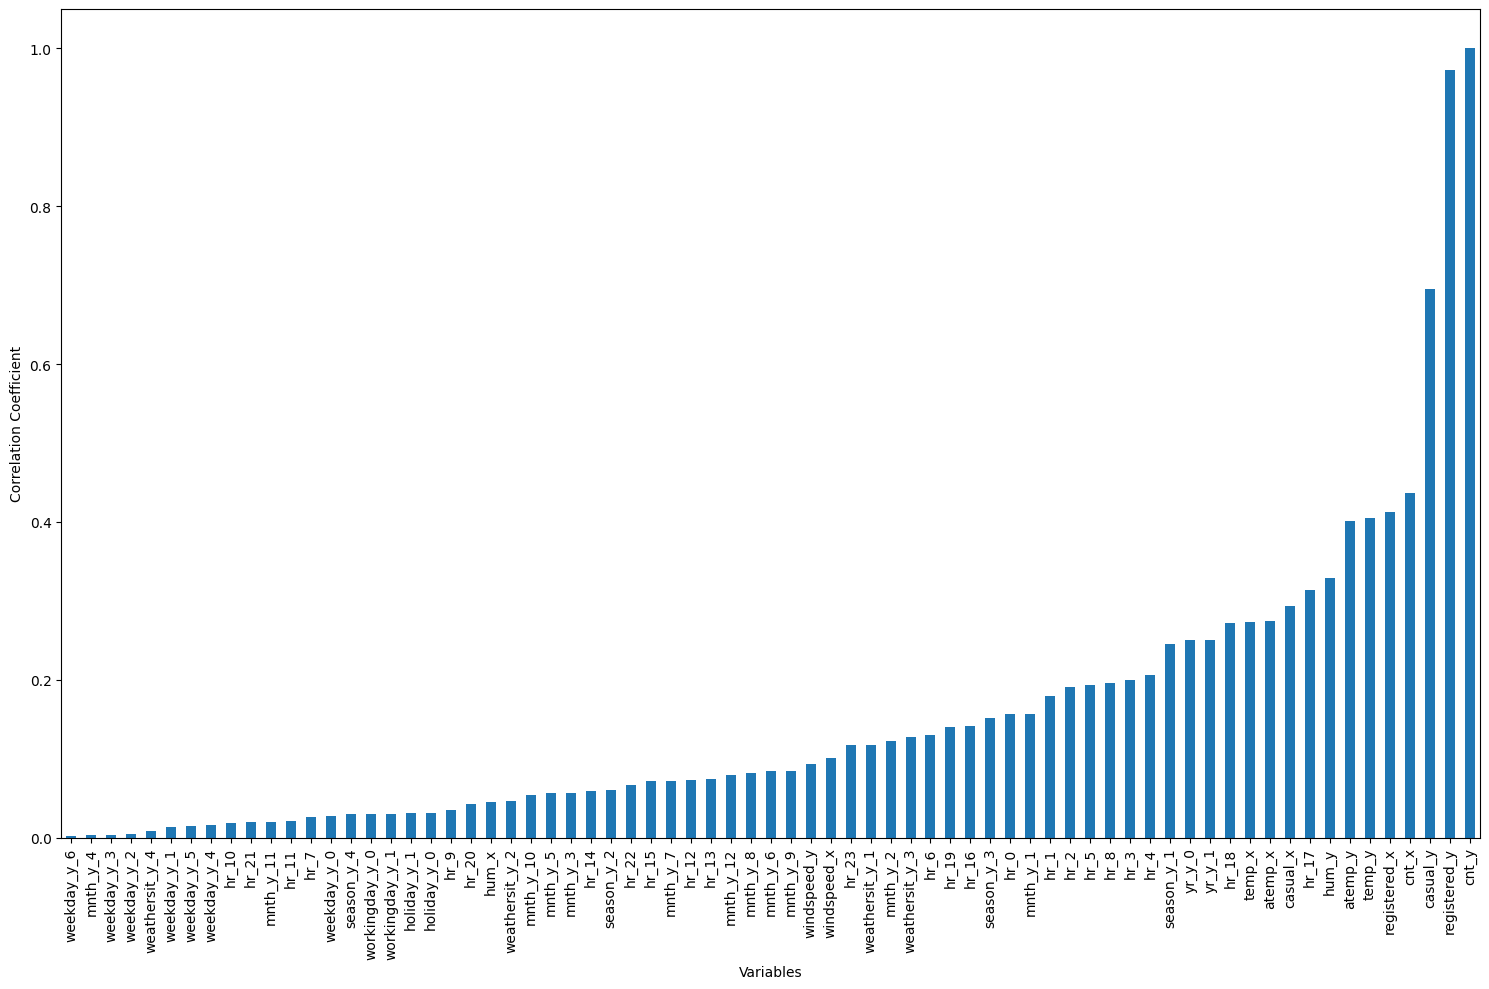

In [333]:
# menghitung korelasi antara variabel target dan semua variabel lainnya 
target_corr = df4_vis.corr()['cnt_y']

# mengurutkan hasil korelasi berdasarkan korelasi 
target_corr_sorted = target_corr.abs().sort_values(ascending=True)

plt.figure(figsize=(15,10)) #sumbu x, sumbu y 
target_corr_sorted.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

## Modelling

- Splitting [DONE]
- Modelling [DONE]
- Evaluation  [DONE]
- Saving models [DONE]
- Deployment [DONE]
- Visualization [DONE]
- Result 

### Splitting

- deleting the cnt_x, casual_x, registered_x, casual_y, registered_y columns [DONE]
- target is column cnt_y [DONE]
- splitting the train test set [DONE]

#### creating dataframe without cnt_x, casual_x, registered_x, casual_y, registered_y 


In [334]:
bike_df4

temp_x    temp_y   atemp_x   atemp_y     hum_x     hum_y  \
0     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.949852   
1     -0.837646 -1.438516 -0.690488 -1.181732  1.270349  0.897674   
2     -0.837646 -1.438516 -0.690488 -1.181732  1.270349  0.897674   
3     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.636786   
4     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.636786   
...         ...       ...       ...       ...       ...       ...   
17374 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17375 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17376 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17377 -1.541077 -1.230779 -1.553293 -1.181732 -0.360423 -0.354586   
17378 -1.541077 -1.230779 -1.553293 -1.181732 -0.360423  0.115011   

       windspeed_x  windspeed_y  casual_x  registered_x  ...  weekday_y_3  \
0        -0.384078    -1.553889       331           654  ...        False   
1        -0.384078    -1.553889       331           654  ...        False   
2        -0.384078    -1.553889       331           654  ...        False   
3        -0.384078    -1.553889       331           654  ...        False   
4        -0.384078    -1.553889       331           654  ...        False   
...            ...          ...       ...           ...  ...          ...   
17374    -0.456615    -0.211691       439          2290  ...        False   
17375    -0.456615    -0.211691       439          2290  ...        False   
17376    -0.456615    -0.211691       439          2290  ...        False   
17377    -0.456615    -0.456099       439          2290  ...        False   
17378    -0.456615    -0.456099       439          2290  ...        False   

       weekday_y_4  weekday_y_5  weekday_y_6  workingday_y_0  workingday_y_1  \
0            False        False         True            True           False   
1            False        False         True            True           False   
2            False        False         True            True           False   
3            False        False         True            True           False   
4            False        False         True            True           False   
...            ...          ...          ...             ...             ...   
17374        False        False        False           False            True   
17375        False        False        False           False            True   
17376        False        False        False           False            True   
17377        False        False        False           False            True   
17378        False        False        False           False            True   

       weathersit_y_1  weathersit_y_2  weathersit_y_3  weathersit_y_4  
0                True           False           False           False  
1                True           False           False           False  
2                True           False           False           False  
3                True           False           False           False  
4                True           False           False           False  
...               ...             ...             ...             ...  
17374           False            True           False           False  
17375           False            True           False           False  
17376            True           False           False           False  
17377            True           False           False           False  
17378            True           False           False           False  

[17379 rows x 71 columns]

In [335]:
print(bike_df4.columns.tolist())

['temp_x', 'temp_y', 'atemp_x', 'atemp_y', 'hum_x', 'hum_y', 'windspeed_x', 'windspeed_y', 'casual_x', 'registered_x', 'cnt_x', 'casual_y', 'registered_y', 'cnt_y', 'season_y_1', 'season_y_2', 'season_y_3', 'season_y_4', 'yr_y_0', 'yr_y_1', 'mnth_y_1', 'mnth_y_2', 'mnth_y_3', 'mnth_y_4', 'mnth_y_5', 'mnth_y_6', 'mnth_y_7', 'mnth_y_8', 'mnth_y_9', 'mnth_y_10', 'mnth_y_11', 'mnth_y_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_y_0', 'holiday_y_1', 'weekday_y_0', 'weekday_y_1', 'weekday_y_2', 'weekday_y_3', 'weekday_y_4', 'weekday_y_5', 'weekday_y_6', 'workingday_y_0', 'workingday_y_1', 'weathersit_y_1', 'weathersit_y_2', 'weathersit_y_3', 'weathersit_y_4']


In [336]:
bike_df4.head()

temp_x    temp_y   atemp_x   atemp_y     hum_x     hum_y  windspeed_x  \
0 -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.949852    -0.384078   
1 -0.837646 -1.438516 -0.690488 -1.181732  1.270349  0.897674    -0.384078   
2 -0.837646 -1.438516 -0.690488 -1.181732  1.270349  0.897674    -0.384078   
3 -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.636786    -0.384078   
4 -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.636786    -0.384078   

   windspeed_y  casual_x  registered_x  ...  weekday_y_3  weekday_y_4  \
0    -1.553889       331           654  ...        False        False   
1    -1.553889       331           654  ...        False        False   
2    -1.553889       331           654  ...        False        False   
3    -1.553889       331           654  ...        False        False   
4    -1.553889       331           654  ...        False        False   

   weekday_y_5  weekday_y_6  workingday_y_0  workingday_y_1  weathersit_y_1  \
0        False         True            True           False            True   
1        False         True            True           False            True   
2        False         True            True           False            True   
3        False         True            True           False            True   
4        False         True            True           False            True   

   weathersit_y_2  weathersit_y_3  weathersit_y_4  
0           False           False           False  
1           False           False           False  
2           False           False           False  
3           False           False           False  
4           False           False           False  

[5 rows x 71 columns]

In [337]:
bike_df4.iloc[:, 70]

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Name: weathersit_y_4, Length: 17379, dtype: bool

In [338]:
# new dataframe without cnt_x, casual_x, registered_x, casual_y, registered_y, cnt_y

bike_df5 = bike_df4.iloc[:, list(range(0,8)) + list(range(14,71))]

## DITULIS (0,8) KARENA NOMOR 8 GAK DIIKUTSERTAKAN. DITULIS (14,71) KARENA 71 GA DIIKUTSERTAKAN (GA ADA)

In [339]:
bike_df5

temp_x    temp_y   atemp_x   atemp_y     hum_x     hum_y  \
0     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.949852   
1     -0.837646 -1.438516 -0.690488 -1.181732  1.270349  0.897674   
2     -0.837646 -1.438516 -0.690488 -1.181732  1.270349  0.897674   
3     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.636786   
4     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.636786   
...         ...       ...       ...       ...       ...       ...   
17374 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17375 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17376 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17377 -1.541077 -1.230779 -1.553293 -1.181732 -0.360423 -0.354586   
17378 -1.541077 -1.230779 -1.553293 -1.181732 -0.360423  0.115011   

       windspeed_x  windspeed_y  season_y_1  season_y_2  ...  weekday_y_3  \
0        -0.384078    -1.553889        True       False  ...        False   
1        -0.384078    -1.553889        True       False  ...        False   
2        -0.384078    -1.553889        True       False  ...        False   
3        -0.384078    -1.553889        True       False  ...        False   
4        -0.384078    -1.553889        True       False  ...        False   
...            ...          ...         ...         ...  ...          ...   
17374    -0.456615    -0.211691        True       False  ...        False   
17375    -0.456615    -0.211691        True       False  ...        False   
17376    -0.456615    -0.211691        True       False  ...        False   
17377    -0.456615    -0.456099        True       False  ...        False   
17378    -0.456615    -0.456099        True       False  ...        False   

       weekday_y_4  weekday_y_5  weekday_y_6  workingday_y_0  workingday_y_1  \
0            False        False         True            True           False   
1            False        False         True            True           False   
2            False        False         True            True           False   
3            False        False         True            True           False   
4            False        False         True            True           False   
...            ...          ...          ...             ...             ...   
17374        False        False        False           False            True   
17375        False        False        False           False            True   
17376        False        False        False           False            True   
17377        False        False        False           False            True   
17378        False        False        False           False            True   

       weathersit_y_1  weathersit_y_2  weathersit_y_3  weathersit_y_4  
0                True           False           False           False  
1                True           False           False           False  
2                True           False           False           False  
3                True           False           False           False  
4                True           False           False           False  
...               ...             ...             ...             ...  
17374           False            True           False           False  
17375           False            True           False           False  
17376            True           False           False           False  
17377            True           False           False           False  
17378            True           False           False           False  

[17379 rows x 65 columns]

In [340]:
bike_df4.iloc[:,70]

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Name: weathersit_y_4, Length: 17379, dtype: bool

In [341]:
bike_df4

temp_x    temp_y   atemp_x   atemp_y     hum_x     hum_y  \
0     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.949852   
1     -0.837646 -1.438516 -0.690488 -1.181732  1.270349  0.897674   
2     -0.837646 -1.438516 -0.690488 -1.181732  1.270349  0.897674   
3     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.636786   
4     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.636786   
...         ...       ...       ...       ...       ...       ...   
17374 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17375 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17376 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17377 -1.541077 -1.230779 -1.553293 -1.181732 -0.360423 -0.354586   
17378 -1.541077 -1.230779 -1.553293 -1.181732 -0.360423  0.115011   

       windspeed_x  windspeed_y  casual_x  registered_x  ...  weekday_y_3  \
0        -0.384078    -1.553889       331           654  ...        False   
1        -0.384078    -1.553889       331           654  ...        False   
2        -0.384078    -1.553889       331           654  ...        False   
3        -0.384078    -1.553889       331           654  ...        False   
4        -0.384078    -1.553889       331           654  ...        False   
...            ...          ...       ...           ...  ...          ...   
17374    -0.456615    -0.211691       439          2290  ...        False   
17375    -0.456615    -0.211691       439          2290  ...        False   
17376    -0.456615    -0.211691       439          2290  ...        False   
17377    -0.456615    -0.456099       439          2290  ...        False   
17378    -0.456615    -0.456099       439          2290  ...        False   

       weekday_y_4  weekday_y_5  weekday_y_6  workingday_y_0  workingday_y_1  \
0            False        False         True            True           False   
1            False        False         True            True           False   
2            False        False         True            True           False   
3            False        False         True            True           False   
4            False        False         True            True           False   
...            ...          ...          ...             ...             ...   
17374        False        False        False           False            True   
17375        False        False        False           False            True   
17376        False        False        False           False            True   
17377        False        False        False           False            True   
17378        False        False        False           False            True   

       weathersit_y_1  weathersit_y_2  weathersit_y_3  weathersit_y_4  
0                True           False           False           False  
1                True           False           False           False  
2                True           False           False           False  
3                True           False           False           False  
4                True           False           False           False  
...               ...             ...             ...             ...  
17374           False            True           False           False  
17375           False            True           False           False  
17376            True           False           False           False  
17377            True           False           False           False  
17378            True           False           False           False  

[17379 rows x 71 columns]

In [342]:
bike_df5

temp_x    temp_y   atemp_x   atemp_y     hum_x     hum_y  \
0     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.949852   
1     -0.837646 -1.438516 -0.690488 -1.181732  1.270349  0.897674   
2     -0.837646 -1.438516 -0.690488 -1.181732  1.270349  0.897674   
3     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.636786   
4     -0.837646 -1.334648 -0.690488 -1.093281  1.270349  0.636786   
...         ...       ...       ...       ...       ...       ...   
17374 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17375 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17376 -1.541077 -1.230779 -1.553293 -1.269602 -0.360423 -0.145876   
17377 -1.541077 -1.230779 -1.553293 -1.181732 -0.360423 -0.354586   
17378 -1.541077 -1.230779 -1.553293 -1.181732 -0.360423  0.115011   

       windspeed_x  windspeed_y  season_y_1  season_y_2  ...  weekday_y_3  \
0        -0.384078    -1.553889        True       False  ...        False   
1        -0.384078    -1.553889        True       False  ...        False   
2        -0.384078    -1.553889        True       False  ...        False   
3        -0.384078    -1.553889        True       False  ...        False   
4        -0.384078    -1.553889        True       False  ...        False   
...            ...          ...         ...         ...  ...          ...   
17374    -0.456615    -0.211691        True       False  ...        False   
17375    -0.456615    -0.211691        True       False  ...        False   
17376    -0.456615    -0.211691        True       False  ...        False   
17377    -0.456615    -0.456099        True       False  ...        False   
17378    -0.456615    -0.456099        True       False  ...        False   

       weekday_y_4  weekday_y_5  weekday_y_6  workingday_y_0  workingday_y_1  \
0            False        False         True            True           False   
1            False        False         True            True           False   
2            False        False         True            True           False   
3            False        False         True            True           False   
4            False        False         True            True           False   
...            ...          ...          ...             ...             ...   
17374        False        False        False           False            True   
17375        False        False        False           False            True   
17376        False        False        False           False            True   
17377        False        False        False           False            True   
17378        False        False        False           False            True   

       weathersit_y_1  weathersit_y_2  weathersit_y_3  weathersit_y_4  
0                True           False           False           False  
1                True           False           False           False  
2                True           False           False           False  
3                True           False           False           False  
4                True           False           False           False  
...               ...             ...             ...             ...  
17374           False            True           False           False  
17375           False            True           False           False  
17376            True           False           False           False  
17377            True           False           False           False  
17378            True           False           False           False  

[17379 rows x 65 columns]

#### creating target column as cnt_y 

In [343]:
bike_df5_target = bike_df4['cnt_y']

In [344]:
bike_df5_target

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt_y, Length: 17379, dtype: int64

#### splitting 

In [345]:
# membuat variabel X dan y 
X = bike_df5
y = bike_df5_target

In [346]:
from sklearn.model_selection import train_test_split

# membagi dataset menjadi train dan test split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [347]:
# menghitung jumlah/panjang data 
print("Jumlah data:", len(X))

# menghitung panjang/jumlah data pada x_train
print("Jumlah data train:", len(x_train))

# menghitung panjang/jumlah data pada x_test
print("Jumlah data test:", len(x_test))

Jumlah data: 17379
Jumlah data train: 13903
Jumlah data test: 3476


### Modelling 

In [348]:
# melatih model 1 dengan algoritma Least Angle Regression
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

# melatih model 2 dengan algoritma Linear Regression 
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)


# melatih model 3 dengan algoritma Gradient Boosting Regressor 
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state= 184)
GBR.fit(x_train, y_train)



GradientBoostingRegressor(random_state=184)

In [349]:
# melatih model 4 dengan algoritma RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor().fit(x_train, y_train)

# melatih model 5 dengan algoritma XGBoost atau LightGBM
# tidak perlu


In [350]:
# melatih model 6 dengan algoritma Neural Network (MLPRegressor)

from sklearn.neural_network import MLPRegressor
MLPR = MLPRegressor(random_state=1, max_iter=2000, tol=0.1)
MLPR.fit(x_train, y_train)

MLPRegressor(max_iter=2000, random_state=1, tol=0.1)

### Evaluation 

- MAE, MSE, R2 Least Angle Regression [DONE]
- MAE, MSE, R2 Linear Regression [DONE]
- MAE, MSE, R2 Gradient Boosting Regressor [DONE]
- Comparison [DONE]

**BAD MODELs**
- Apakah semua variabel numerik sudah di-scale (standarisasi / normalisasi) kalau model kamu perlu itu? [DONE]
- Apakah fitur seperti “jam” dikodekan dengan baik? (Misal, jam 0 dan 23 bisa dekat secara makna, tapi beda jauh angkanya. Coba ubah jadi sin dan cos.) [NOTDONE]
- Sudahkah kamu ubah kategori seperti musim, cuaca, libur, dsb jadi one-hot encoding atau ordinal yang sesuai? [DONE]
- Lihat fitur mana yang paling pengaruh terhadap target (cnt atau jumlah peminjaman). Fitur yang tidak relevan bisa dibuang. [NOTDONE][DONELATER]
- Bisa pakai .feature_importances_ dari Gradient Boosting untuk lihat. [NOTDONE]
- Coba Model Lain. Coba juga: [DONE]
1) RandomForestRegressor — mirip GB tapi kadang lebih robust. [DONE]
2) XGBoost atau LightGBM — versi yang lebih cepat/efisien dari GradientBoosting. [NOTDONE]
3) Neural Network (MLPRegressor) kalau datanya banyak. [DONE]
- Hyperparameter Tuning. Model default biasanya belum optimal. Coba: [NOTDONE]
1) GridSearchCV atau RandomizedSearchCV untuk GradientBoostingRegressor. Contoh: atur n_estimators, max_depth, learning_rate, dsb.  [NOTDONE]
- Pakai K-Fold cross-validation buat pastiin model kamu nggak cuma bagus di data training, tapi juga generalizable.  [NOTDONE]
- Coba klasifikasi, bukan regresi. Misal, kelompokkan peminjaman jadi: rendah, sedang, tinggi.  [NOTDONE]
- Coba prediksi log(cnt) kalau distribusi target sangat skewed. [NOTDONE]
- Lihat apakah data kamu unbalanced (misal, terlalu banyak jam kosong vs sibuk).  [NOTDONE]






catatan:

BEFORE REMODEL

	                                MAE	            MSE	            R2
Lars	                            136.138899	    30777.857357	0.077455
LinearRegression	                75.407833	    10431.743302	0.687316
GradientBoostingRegressor	        60.130368	    6940.425774	    0.791966
RandomForestRegressor	            30.888058	    2444.868200	    0.926717
Multi-layer Perceptron regressor	40.907025	    3580.740797	    0.892670


									MAE				MSE				R2
Lars								138.407225		31433.997727	0.057788
LinearRegression					75.557718		10501.632910	0.685221
GradientBoostingRegressor			61.322512		7142.688202		0.785903
RandomForestRegressor				32.127028		2538.843843		0.923900
Multi-layer Perceptron regressor	25.189271		1532.273676		0.954071

In [351]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluasi Model LARs
pred_lars = lars.predict(x_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

# membuat dictionary untuk menyimpan hasil
data = {
    'MAE': [mae_lars], 
    'MSE': [mse_lars], 
    'R2': [r2_lars],
}

# konversi dictionary 
df_results = pd.DataFrame(data, index=['Lars'])
df_results

MAE           MSE        R2
Lars  138.407225  31433.997727  0.057788

In [352]:
# Evaluasi pada model Linear Regression 

pred_LR = LR.predict(x_test)
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

# menambahkan hasil evaluasi LR ke Data Frame 
df_results.loc['LinearRegression'] = [mae_LR, mse_LR, r2_LR]
df_results 

MAE           MSE        R2
Lars              138.407225  31433.997727  0.057788
LinearRegression   75.557718  10501.632910  0.685221

In [353]:
# Evaluasi pada gradient boosting regressor 

pred_GBR = GBR.predict(x_test)
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)

# menambahkan hasil evaluasi GBR ke Data Frame 
df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

MAE           MSE        R2
Lars                       138.407225  31433.997727  0.057788
LinearRegression            75.557718  10501.632910  0.685221
GradientBoostingRegressor   61.322512   7142.688202  0.785903

In [354]:
# Evaluasi pada random forest regressor 

pred_RFR = RFR.predict(x_test)
mae_RFR = mean_absolute_error(y_test, pred_RFR)
mse_RFR = mean_squared_error(y_test, pred_RFR)
r2_RFR = r2_score(y_test, pred_RFR)

# menambahkan hasil evaluasi RFR ke Data Frame 
df_results.loc['RandomForestRegressor'] = [mae_RFR, mse_RFR, r2_RFR]
df_results

MAE           MSE        R2
Lars                       138.407225  31433.997727  0.057788
LinearRegression            75.557718  10501.632910  0.685221
GradientBoostingRegressor   61.322512   7142.688202  0.785903
RandomForestRegressor       32.134442   2586.139098  0.922482

In [355]:
# Evaluasi pada Multi-layer Perceptron regressor 

pred_MLPR = MLPR.predict(x_test)
mae_MLPR = mean_absolute_error(y_test, pred_MLPR)
mse_MLPR = mean_squared_error(y_test, pred_MLPR)
r2_MLPR = r2_score(y_test, pred_MLPR)

# menambahkan hasil evaluasi RFR ke Data Frame 
df_results.loc['Multi-layer Perceptron regressor'] = [mae_MLPR, mse_MLPR, r2_MLPR]
df_results

MAE           MSE        R2
Lars                              138.407225  31433.997727  0.057788
LinearRegression                   75.557718  10501.632910  0.685221
GradientBoostingRegressor          61.322512   7142.688202  0.785903
RandomForestRegressor              32.134442   2586.139098  0.922482
Multi-layer Perceptron regressor   25.189271   1532.273676  0.954071

membuat prediction dataframe untuk diplot

In [356]:
prediction_df = pd.DataFrame(pred_MLPR, columns=['prediction'])

In [357]:
prediction_df

prediction
0     342.506494
1     134.291682
2     123.968842
3     180.635866
4     171.673735
...          ...
3471   13.164340
3472  242.182460
3473   10.612596
3474  318.069355
3475   70.766042

[3476 rows x 1 columns]

In [358]:
bike_df5_target.describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt_y, dtype: float64

### Saving Models 

In [359]:
import joblib

# saving model in a file 
joblib.dump(RFR, 'rfrmodel_bike_sharing.joblib')

['rfrmodel_bike_sharing.joblib']

In [360]:
import pickle

# saving model as a file 

with open('rfrmodel_bike_sharing.pkl', 'wb') as file:
    pickle.dump(RFR, file)


### Deployment

In [361]:
examplefordeploy = bike_df5.iloc[8690, :]
examplefordeploy 

temp_x           -1.227495
temp_y           -1.438516
atemp_x          -1.375872
atemp_y          -1.534375
hum_x             -1.76167
                    ...   
workingday_y_1       False
weathersit_y_1       False
weathersit_y_2        True
weathersit_y_3       False
weathersit_y_4       False
Name: 8690, Length: 65, dtype: object

In [362]:
# bike_df5.iloc[8690]
bike_df5.iloc[[8690]]

temp_x    temp_y   atemp_x   atemp_y    hum_x     hum_y  windspeed_x  \
8690 -1.227495 -1.438516 -1.375872 -1.534375 -1.76167 -0.980716      1.80782   

      windspeed_y  season_y_1  season_y_2  ...  weekday_y_3  weekday_y_4  \
8690     0.764304        True       False  ...        False        False   

      weekday_y_5  weekday_y_6  workingday_y_0  workingday_y_1  \
8690        False        False            True           False   

      weathersit_y_1  weathersit_y_2  weathersit_y_3  weathersit_y_4  
8690           False            True           False           False  

[1 rows x 65 columns]

In [363]:
examplefordeploy = bike_df5.iloc[[8690]]

examplefordeploy.to_csv('examplefordeploy.csv', encoding='utf-8')

In [364]:
#testresutlt = bike_df5_target[bike_df5_target['cnt_y']==8690]
bike_df5_target.iloc[8690]

39

Microsoft Windows [Version 10.0.26100.3775]
(c) Microsoft Corporation. All rights reserved.

(venv) D:\meatwork\project\datsci ml ai\bike sharing>curl -X POST http://127.0.0.1:5000/predict -H "Content-Type: application/json" -d @bikesharing_testdata.json
{
  "prediction": [
    49.42
  ]
}

(venv) D:\meatwork\project\datsci ml ai\bike sharing>

## What to do Eval

1. change columns that has false value to 0 and 1 [DONEBUTNONEEDTO]
2. delete columns [DONE]
3. resplit [DONE]
4. remodel  [DONE]
5. reeval  [DONE]
6. resave  [DONE]
7. redeploy [DONE]

pertahankan kolom:
```
temp_x,temp_y,atemp_x,atemp_y,hum_x,hum_y,windspeed_x,windspeed_y,
season_y_1,season_y_2,season_y_3,season_y_4,yr_y_0,yr_y_1,mnth_y_1,mnth_y_2,mnth_y_3,mnth_y_4,mnth_y_5,mnth_y_6,mnth_y_7,mnth_y_8,mnth_y_9,mnth_y_10,mnth_y_11,mnth_y_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,holiday_y_0,holiday_y_1,weekday_y_0,weekday_y_1,weekday_y_2,weekday_y_3,weekday_y_4,weekday_y_5,weekday_y_6,workingday_y_0,workingday_y_1,weathersit_y_1,weathersit_y_2,weathersit_y_3,weathersit_y_4
```

delet kolom: 
```
instant_y,season_x_1,season_x_2,season_x_3,season_x_4,yr_x_0,yr_x_1,mnth_x_1,mnth_x_2,mnth_x_3,mnth_x_4,mnth_x_5,mnth_x_6,mnth_x_7,mnth_x_8,mnth_x_9,mnth_x_10,mnth_x_11,mnth_x_12,holiday_x_0,holiday_x_1,weekday_x_0,weekday_x_1,weekday_x_2,weekday_x_3,weekday_x_4,weekday_x_5,weekday_x_6,workingday_x_0,workingday_x_1,weathersit_x_1,weathersit_x_2,weathersit_x_3,
```

### Explore ...

**To Do**

- bikin barplot untuk temp, atemp, hum, windspeed, vs cnt_x, dikasih per range dan frekuensi per rangenya 
- bikin control 2 variabel dalam kondisi tertentu dikombinasikan lalu dicari kaitannya ke variabel bebas (misal, cnt_y weekday yang bukan sabtu minggu dan bukan holiday, cnt_y holiday, cnt_y weekend)
- bikin control 3 variabel dalam kondisi tertentu dikombinasikan lalu dicari kaitannya ke variabel bebas 
- belajar statistik lanjut
- belajar compare jumlah baris setiap dataframe

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

In [365]:
bike_df.columns

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y',
       'weekday_y', 'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y',
       'hum_y', 'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')

### TO DO

- nilai season vs cnt_y [peminjaman per musim][DONE]
- nilai month vs cnt_y 
- nilai hr vs cnt_y [peminjaman per musim][DONE]
- nilai holiday vs cnt_y [peminjaman hari libur vs hari biasa]
- nilai weekday vs cnt_y [peminjaman hari libur vs hari biasa]
- nilai workingday vs cnt_y [peminjaman hari libur vs hari biasa][DONE]
- nilai weathersit vs cnt_y [pemijaman berdasarkan kondisi cuaca][DONE]
- nilai temp_x vs cnt_y [pemijaman berdasarkan kondisi cuaca][DONE]
- nilai atemp_x vs cnt_y [pemijaman berdasarkan kondisi cuaca][DONE]
- nilai hum vs cnt_y [pemijaman berdasarkan kondisi cuaca][DONE]
- nilai windspeed vs cnt_y [pemijaman berdasarkan kondisi cuaca][DONE]

^ yang kaya diatas harus dibikin gambaran besarnya 

#### 1. Visualisasi Data 
- distribusi target (cnt_y) (histplot) [DONE]

- rata-rata peminjaman sepeda per jam (dikelompokkan per jam, dirata-rata, diplot pakai lineplot) [DONE]

- peminjaman per musim (total?? boxplot) [DONE]

- peminjaman pada hari libur vs hari biasa (boxplot) note: hari libur = weekend + holiday 1 vs workingday [DONE]

- korelasi antar fitur numerik (heatmap?) [DONE]

- pemijaman berdasarkan kondisi cuaca (barplot?) [DONE]

#### 2. Visualisasi kinerja model 
- scatter plot prediksi vs actual (scatter?) [DONE]
- residual plot (histplot) [DONE]

In [366]:
bike_df3.columns

Index(['season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y', 'weekday_y',
       'workingday_y', 'weathersit_y', 'temp_x', 'temp_y', 'atemp_x',
       'atemp_y', 'hum_x', 'hum_y', 'windspeed_x', 'windspeed_y', 'casual_x',
       'registered_x', 'cnt_x', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')

TO DO 

- how to create default style, create theme and such, that is good [DONE]
- answer all questions [DONE]
- make subplots [DONE]
- fix each graphs and question in graphs [DONE]

### **Theme, default style**

In [367]:
# how to create default style that is good []

# import libraries
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import rcParams # used to set default parameters
import matplotlib.font_manager as fm

# ==================================
# COLOR PALETTES AND STYLING
# ==================================


# color palette
my_palette =["#2C5364","#203A43","#0F2027","#3EDBF0","#FFB830"] # custom palette
sns.set_palette(my_palette)                                     # setting palette in all sns plot
sns.set_context("paper", font_scale=1.2)                        # setting context visualization? # bisa pakai "paper" (jurnal), "poster" (presentasi), "talk" (presentasi tapi lebih kecil), "notebook" (default)
sns.set_style(style="whitegrid")                                 # bisa pakai "darkgrid", "whitegrid", "white", "dark", "ticks"

# style lewat rcParams
rcParams['axes.facecolor'] = '#f9f9f9'                          # axes background
rcParams['axes.edgecolor'] = '#2C5364'                          # axes edgecolor
rcParams['axes.linewidth'] = 1                                  # axes linewidth


rcParams['axes.prop_cycle'] = plt.cycler(color=my_palette)

# ==================================
# FONT SETTINGS
# ==================================

# set default font sizes
small_size = 10
medium_size = 12
large_size = 14

# change the fontsize for individual elements
matplotlib.rc("font", size=small_size)          #controls default text sizes
matplotlib.rc("axes", labelsize=medium_size)    #fontsize of the x and y labels
matplotlib.rc("xtick", labelsize=small_size)    #fontsize of the tick labels
matplotlib.rc("ytick", labelsize=small_size)    #fontsize of the tick labels
matplotlib.rc("legend", fontsize=small_size)    #legend fontsize 
matplotlib.rc("axes", titlesize=large_size)     #title fontsize

# set default font, karena sns.set_style dan sns.set_context ngubah font
# tambahkan ke sistem matplotlib manual 
futura_path = r"C:\Windows\Fonts\Futura Bk BT Book.ttf"
font_entry = fm.FontEntry(fname=futura_path, name='FuturaCustom')
fm.fontManager.ttflist.insert(0, font_entry)

# set font globally 
rcParams['font.family'] = 'FuturaCustom'


# TANYA 1 
# apakah rcParams hanya ada di matplotlib atau juga di library lain? [DONE]
# apa bedanya import matplotlib saja sama import matplotlib.pyplot as plt? [DONE]
# apa bedanya plt.rcparams dan sns? ngaruhnya di gambar apa? kenapa pas aku pakai plt, aku pakai sns juga? [DONE]
# apa bedanya plt.rcParams sama rcParams biasa? apa bedanya pula sama matplotlib.rc? [DONE]
# kenapa sebagian plot ada tulisan Text(0.5, 1.0, 'Correlation between numerical features'), Text(0, 0.5, 'Count'), sementara yang lain tidak? [DONE]
# facecolor sama edgecolor itu apa? kok gabisa ditampilkan? [DONE]
# ini ga ngubah apapun plt.rcParams['axes.facecolor'] = '#f9f9f9' plt.rcParams['axes.edgecolor'] = '#2C5364' [DONE]

# TANYA 2
# setting context visualization? sns.set_context("paper", font_scale=1.2)   apa maksudnya? [DONE]
# grid ilang-ilangan? jawaban: jangan ditimpa pakai ```figure=sns.histplot(...)` [DONE]
# kenapa kode ini dan bawahnya ini harus dipisah biar bekerja? [DONE]

In [368]:
# set default font, karena sns.set_style dan sns.set_context ngubah font
# tambahkan ke sistem matplotlib manual 
futura_path = r"C:\Windows\Fonts\Futura Bk BT Book.ttf"
font_entry = fm.FontEntry(fname=futura_path, name='FuturaCustom')
fm.fontManager.ttflist.insert(0, font_entry)

# set font globally 
rcParams['font.family'] = 'FuturaCustom'

#### Jawab Tanya

##### **TANYA 1**


##### apakah rcParams hanya ada di matplotlib atau juga di library lain?

- khusus matplotlib, yang lain pake config lain
- seaborn dibangun atas matplotlib

##### apa bedanya import matplotlib saja sama import matplotlib.pyplot as plt?


- matplotlib itu modul khusus matplotlib saja
- matplotlib.pyplot itu modul submodul khusus untuk plotting
- kudu dipisah biar efisien

##### apa bedanya plt dan sns rcparams? ngaruhnya di gambar apa? kenapa pas aku pakai plt, aku pakai sns juga?


- ``` plt.rcParams ``` mengatur konfigurasi tingkat rendah (font, warna axes, ketebalan garis, ukuran teks, dll secara manual). memberi kontrol total
- ```sns ``` mengatur styling tingkat tinggi dengan fungsi seperti ```set_style, set_context, set_palette```. seaborn akan mengubah ```rcParams``` di belakang layar sesuai preset mereka. memberi kemudahan cepat, cukup tulis satu baris langsung cantik

##### apa bedanya plt.rcParams sama rcParams biasa? apa bedanya pula sama matplotlib.rc?


- ```plt.rcParams``` dari pyplot (submodul dari matplotlib). bisa diakses langsung lewat pyplot pakai ```plt.rcParams``` tanpa import ```from matplotlib import rcParams```
- ```rcParams``` dari matplotlib (global). bisa diakses pakai import ```from matplotlib import rcParams``` kalau nggak import pyplot.
- ```matplotlib.rc``` bisa lebih cepat karena bisa 

```
import matplotlib as mpl 
mpl.rc('font', size=12, family='serif)
```

 gak perlu ngubah satu per satu kayak

```
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'serif
```

##### kenapa sebagian plot ada tulisan Text(0.5, 1.0, 'Correlation between numerical features'), Text(0, 0.5, 'Count'), sementara yang lain tidak?


karena aku tadi pakai ``` plt.title() ```,  ``` plt.xlabel() ``` tanpa  ``` plt.show() ```

hal ini akan menyebabkan interpreter menampilkan return valuenya. 

solusi: 
1. tambahkan ```;``` di akhir baris. misal ``` plt.title("Judul");```, atau
2. tambahkan ``` plt.show() ``` di akhir baris



##### facecolor sama edgecolor itu apa? kok gabisa ditampilkan? 


bisa kok. facecolor: ruang di dalam edgecolor. edgecolor: garis pinggir

##### ini ga ngubah apapun plt.rcParams['axes.facecolor'] = '#f9f9f9' plt.rcParams['axes.edgecolor'] = '#2C5364'

Ngubah kok

##### **TANYA 2**

##### setting context visualization? sns.set_context("paper", font_scale=1.2)   apa maksudnya?


buat: 
1. skala font
2. ukuran text, label, judul
3. ketebalan garis 
4. ukuran marker

##### grid ilang-ilangan? jawaban: jangan ditimpa pakai ```figure=sns.histplot(...)`

soalnya gridnya dark grid (garis putih, kotak gelap), terus warna facecolornya '#f9f9f9'(putih), jadi ga keliatan. pas diganti dari whitegrid (garis gelap, kotak putih) bisa

##### kenapa kode ini dan bawahnya ini harus dipisah biar bekerja?

karena sns.set_style, sns.set_context ngubah font, dll

#### Check Fonts

In [423]:
import matplotlib.font_manager as fm
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    print(fm.FontProperties(fname=font).get_name())


Humanst521 BT
Gloucester MT Extra Condensed
Dubai
Bookman Old Style
Algerian
Humanst521 Lt BT
Gabriola
Malgun Gothic
Copperplate Gothic Bold
Rockwell
Webdings
Banshee Pilot Title
Gigi
Copperplate Gothic Light
Clarendon Blk BT
Elephant
Born a Sinner
Bodoni MT
Franklin Gothic Medium
Courier New
Kunstler Script
Swis721 BT
Old English Text MT
Modern No. 20
Calibri
Gill Sans MT
Leelawadee UI
Tw Cen MT Condensed
Britannic Bold
Trebuchet MS
Agency FB
Perpetua Titling MT
Clarendon Lt BT
Microsoft Sans Serif
Tw Cen MT
Bangkit
Malgun Gothic
Amethyst
TypoUpright BT
CentSchbkCyrill BT
Cambria
Coco Gothic
Segoe UI Variable
Book Antiqua
Georgia
Niagara Engraved
Century751 SeBd BT
Palatino Linotype
Century Schoolbook
Magneto
Microsoft YaHei
Tahoma
Geometr212 BkCn BT
Segoe UI
Palatino Linotype
Calisto MT
Futura Md BT
Century Schoolbook
Swis721 BT
Century751 No2 BT
Ravie
Futura Bk BT
Niagara Solid
Perpetua
Banshee Pilot Laser
Lucida Fax
Clarendon BT
Segoe UI Emoji
Bodoni Bk BT
NewsGoth BT
Banshee Pilot

In [424]:
# finding futura 

for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if "Futura" in font:
        print(font)

C:\Windows\Fonts\Futura Md BT Bold Italic.ttf
C:\Windows\Fonts\Futura Bk BT Book.ttf
C:\Windows\Fonts\Futura Bk BT Book Italic.ttf
C:\Windows\Fonts\Futura Md BT Bold.ttf
C:\Windows\Fonts\Futura Md BT Medium Italic.ttf
C:\Windows\Fonts\Futura Md BT Medium.ttf
C:\Users\ACER\AppData\Local\Microsoft\Windows\Fonts\Futura Book font.ttf


In [425]:
# finding futura 

for f in fm.fontManager.ttflist:
    if 'Futura' in f.name:
        print(f.name)

FuturaCustom
FuturaCustom
FuturaCustom
FuturaCustom
FuturaCustom
FuturaCustom
Futura Md BT
Futura Md BT
Futura Bk BT
Futura Bk BT
Futura Md BT
Futura Md BT


In [430]:
#checking active font


print(plt.rcParams['font.family'])
print(matplotlib.get_cachedir())

['FuturaCustom']
C:\Users\ACER\.matplotlib


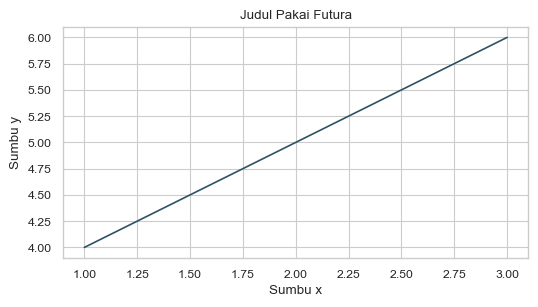

In [431]:
# asking matplotlib for checking font

# creating a font prop from path file ttf

## double ## artinya: "pas kemaren ga pakai ##"

## futura_path = r"C:\Windows\Fonts\Futura Bk BT Book.ttf"
## futura_prop = fm.FontProperties(fname=futura_path)

# set global font properties 
## plt.rcParams['font.family'] = futura_prop.get_name()
## print("Font Aktif: ", futura_prop.get_name()) # checking known name

# test plotting
sns.set_style('whitegrid')
sns.set_context('paper')

plt.figure(figsize=(6,3))
plt.title('Judul Pakai Futura')
plt.xlabel('Sumbu x')
plt.ylabel('Sumbu y')
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()

In [433]:
# cek apakah font benar benar dikenali matplotlib

print("Font aktif (dari properti):", futura_prop.get_name())
print("Font aktif (rcParams):", plt.rcParams['font.family'])

Font aktif (dari properti): Futura Bk BT
Font aktif (rcParams): ['FuturaCustom']


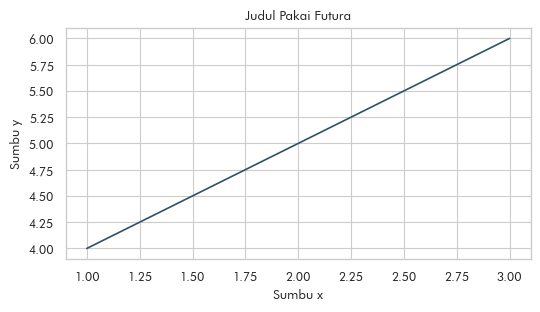

In [434]:
# pakai font langsung di objek teks 

plt.figure(figsize=(6,3))
plt.plot([1, 2, 3], [4, 5, 6])

plt.title('Judul Pakai Futura', fontproperties=futura_prop)
plt.xlabel('Sumbu x', fontproperties=futura_prop)
plt.ylabel('Sumbu y', fontproperties=futura_prop)
plt.show()


In [436]:
# tambahkan ke sistem matplotlib manual 

# KODE INI DAH DIPAKE DI ATAS

## futura_path = r"C:\Windows\Fonts\Futura Bk BT Book.ttf"
## font_entry = fm.FontEntry(fname=futura_path, name='FuturaCustom')
## fm.fontManager.ttflist.insert(0, font_entry)

# set font globally 
## plt.rcParams['font.family'] = 'FuturaCustom'

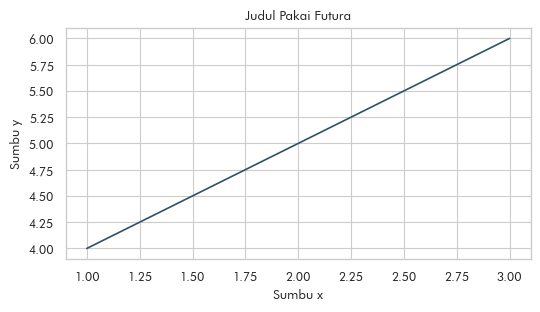

In [435]:
plt.figure(figsize=(6,3))
plt.title('Judul Pakai Futura')
plt.xlabel('Sumbu x')
plt.ylabel('Sumbu y')
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()

### **1.**

#### **1.1**

In [369]:
# validation 

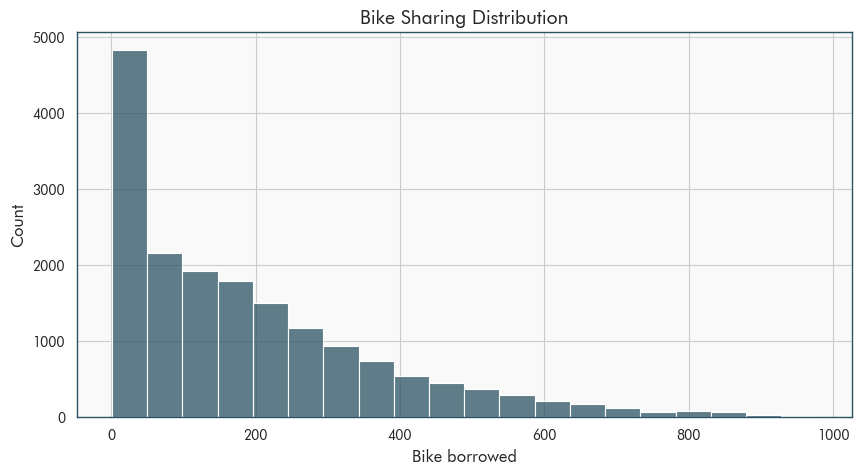

In [370]:
figure, axes = plt.subplots(figsize=(10,5))

# plot 

sns.histplot(
    data=bike_df3,
    x='cnt_y', # bisa nggak? bisa kok
    # hue='cylinders',  apaan? # digunakan untuk berbagai wanra berdasarkan kategori tertentu 
    # col= 'origin' # dipakai untuk membuat subplot per kategori per kolom 
    bins=20, 
    # palette='rocket' # apaan ini cok? tidak bisa digunakan tanpa hue
    legend= True, # disini ga ngaruh apa=apa, ini buat kotak penjelasan kategori, misal warna tertentu mewakili kategori apa, dll
    ax=axes # berarti ditaro di axes
)

# title, axes 
plt.title("Bike Sharing Distribution")
axes.set_xlabel("Bike borrowed")
axes.set_ylabel("Count")

# grid 
axes.grid(visible=True, axis='y') # menampilkan grid, which='both' artinya untuk major ticks dan minor ticks jika ada, dan axisnya untuk axis=x atau y
plt.show() # menampilkan grid, ticks, etc di bawah plot data

### TANYA ax=axes buat apa? buat milih axes keberapa. soalnya pas bikin subplots, ax tuh jadi banyak. lihat di subbab subplots di bawah aja.


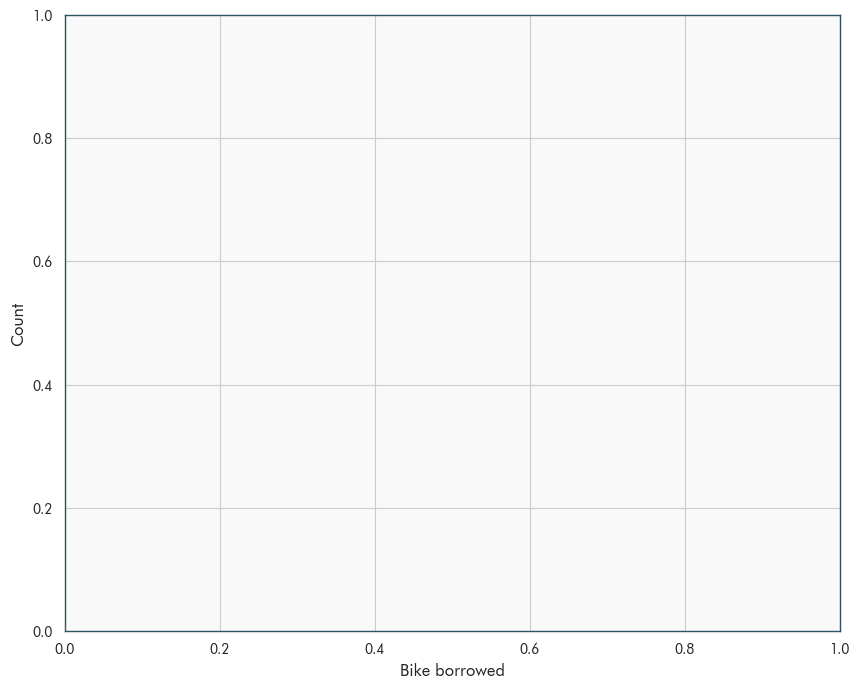

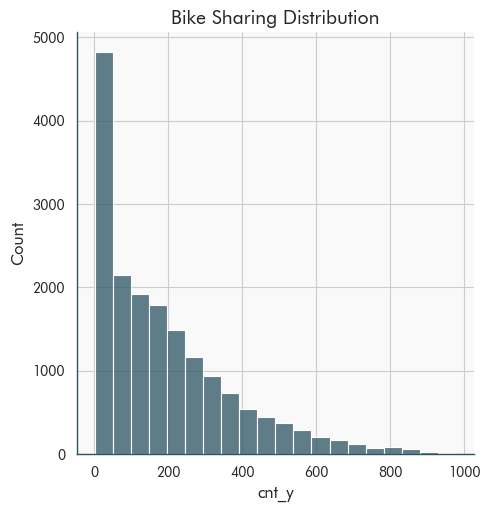

In [371]:
figure, axes = plt.subplots(figsize=(10,8))

sns.displot(
    data=bike_df3,
    x='cnt_y', # bisa nggak?
    #hue='cylinders',  apaan? # digunakan untuk berbagai wanra berdasarkan kategori tertentu 
    #col= 'origin' # dipakai untuk membuat subplot per kategori per kolom 
    bins=20, 
    #palette='rocket' # apaan ini cok? tidak bisa digunakan tanpa hue
    # legend= True,
)

# title, axes 
plt.title("Bike Sharing Distribution")
axes.set_xlabel("Bike borrowed")
axes.set_ylabel("Count")
plt.show()

# TANYA : kenapa gambarnya pisah? Karena sns.distplot itu high level function yang langsung menghasilkan objek FacetGrid sendiri, tidak menggambar di plt.subplots

#### **1.2**

In [376]:
# validation

testcnt = bike_df3['cnt_y'].max()
checkingmean = bike_df3[bike_df['hr']==10]
checkingmean['cnt_y'].mean()

173.6685006877579

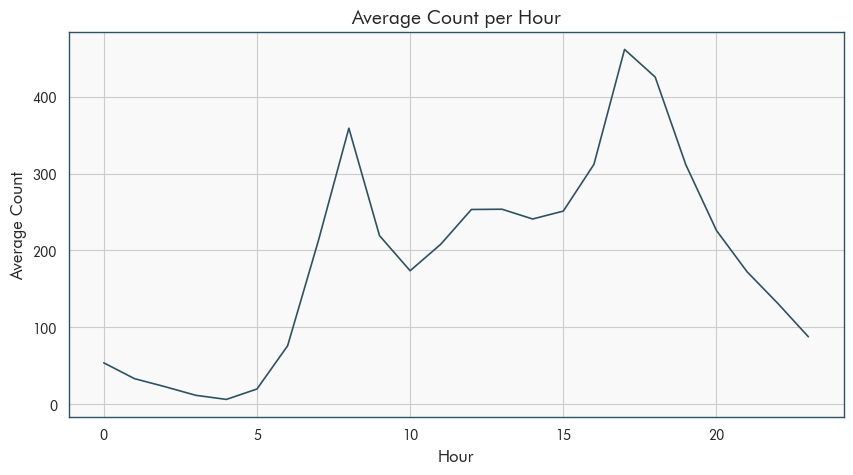

In [377]:
# average cnt per hr 

# dikelompokkan berdasarkan hr + mean 
# salah : hrs = bike_df3['cnt_y'].groupby('hr'), benar groubby dulu 
hrs = bike_df3.groupby('hr')['cnt_y'].mean() #fungsi yang dijalankan pakai tanda kurung, kalau bukan fungsi, atau biasa disebut atribut biasanya tanpa tanda kurung. contoh: index, values columns, shape, dtype, pi
hrs

# plot
figure, axes = plt.subplots(figsize=(10,5)) # figure itu kanvas besar, axes itu kanvas kecil 

# seaborn 
sns.lineplot(x=hrs.index, y=hrs.values) # hrs sudah jadi series jadi pakai index dan pakai values 

# title 
plt.title('Average Count per Hour')
axes.set_ylabel("Average Count")
axes.set_xlabel("Hour")

# gridlines 
axes.grid(visible=True, which='both') # buat apa?? # menampilkan grid, which='both' artinya untuk major ticks dan minor ticks jika ada, dan axisnya untuk axis=x atau y
axes.set_axisbelow(True) # menampilkan grid, ticks, etc di bawah plot data

plt.show()

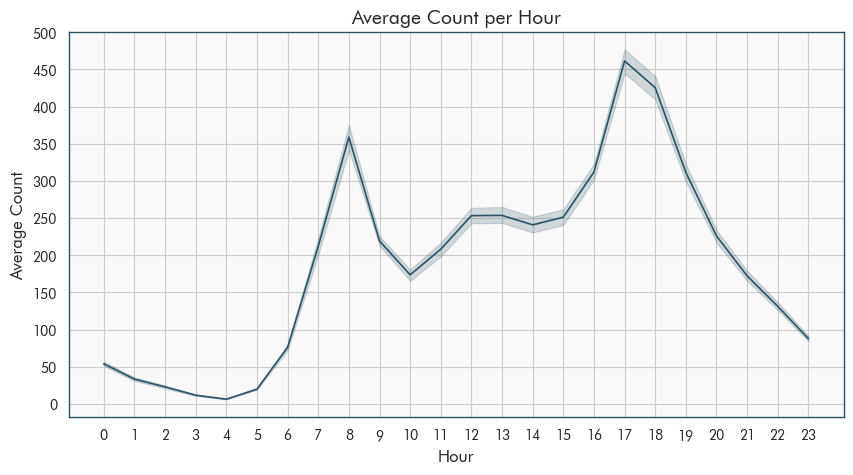

In [378]:
# plot
figure, axes = plt.subplots(figsize=(10,5)) # figure itu kanvas besar, axes itu kanvas kecil 

# seaborn 
sns.lineplot(x='hr', y='cnt_y', data=bike_df3) 

# title 
plt.title('Average Count per Hour')
axes.set_ylabel("Average Count")
axes.set_xlabel("Hour")

# gridlines 
axes.grid(visible=True, which='both', axis='y') # buat apa?? # menampilkan grid, which='both' artinya untuk major ticks dan minor ticks jika ada, dan axisnya untuk axis=x atau y
axes.set_axisbelow(True) # menampilkan grid, ticks, etc di bawah plot data

# TANYA: cara nampilin semua nomor
# xticks 
plt.xticks(ticks=range(24)) #mulai dari 0 sampai 24 (exclusive), dengan jarak 1

# TANYA: cara nampilin yticks banyak: 0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500 
plt.yticks(ticks=range(0, 501, 50)) #mulai dari 0 sampai 501 (exclusive), dengan jarak 50
plt.show()

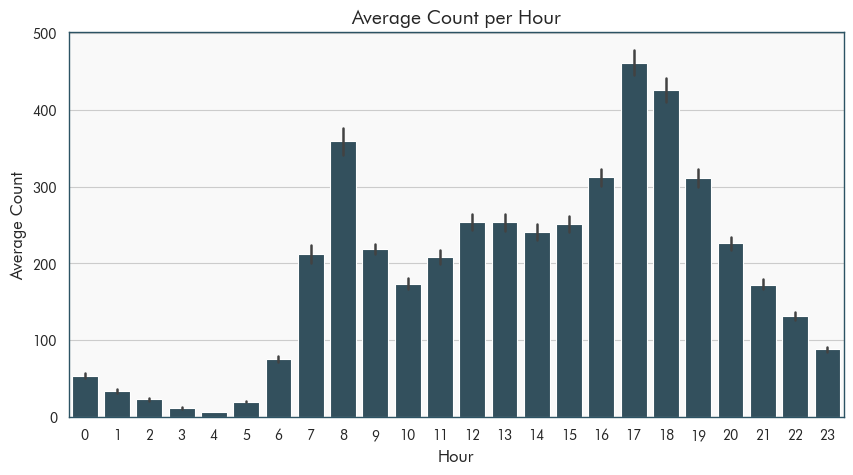

In [379]:
# plot
figure, axes = plt.subplots(figsize=(10,5)) # figure itu kanvas besar, axes itu kanvas kecil 

# seaborn 
sns.barplot(x='hr', y='cnt_y', data=bike_df3,
            # #hue='cylinders',  apaan? # digunakan untuk berbagai wanra berdasarkan kategori tertentu 
            # #col= 'origin' # dipakai untuk membuat subplot per kategori per kolom 
            #palette='rocket' # apaan ini cok? tidak bisa digunakan tanpa hue
            legend= True # disini ga ngaruh apa=apa, ini buat kotak penjelasan kategori, misal warna tertentu mewakili kategori apa, dll
            ) 

# title 
plt.title('Average Count per Hour')
axes.set_ylabel("Average Count")
axes.set_xlabel("Hour")

# gridlines 
axes.grid(visible=True, which='both', axis='y') # buat apa?? # menampilkan grid, which='both' artinya untuk major ticks dan minor ticks jika ada, dan axisnya untuk axis=x atau y
axes.set_axisbelow(True) # menampilkan grid, ticks, etc di bawah plot data
plt.show()

#### **1.3**

In [380]:
# validation

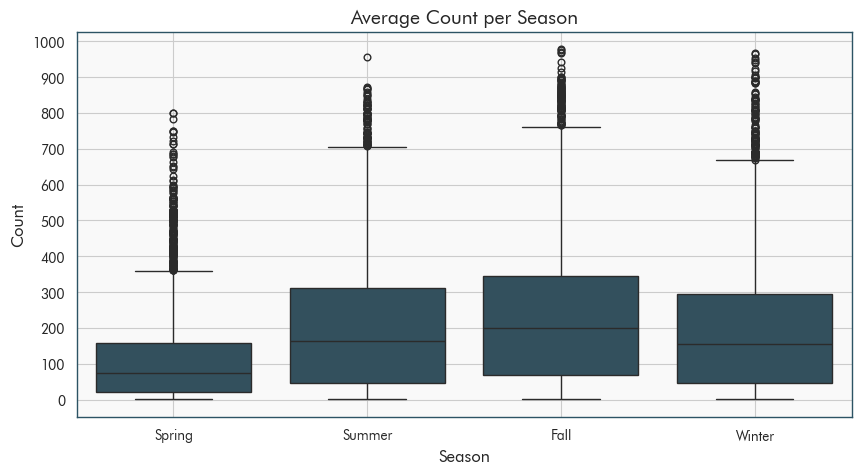

In [381]:
# average cnt per season
# dikelompokkan berdasarkan season + mean 
figure, axes = plt.subplots(figsize=(10,5))

# plot
sns.boxplot(data=bike_df3, y='cnt_y', x='season_y')

# title and axes 
plt.title("Average Count per Season")
axes.set_ylabel("Count")
axes.set_xlabel('Season')

# gridlines 
axes.grid(visible=True, which='both', axis='both') # buat apa?? # menampilkan grid, which='both' artinya untuk major ticks dan minor ticks jika ada, dan axisnya untuk axis=x atau y
axes.set_axisbelow(True) # menampilkan grid, ticks, etc di bawah plot data

# beri keterangan 1, 2, 3, 4 itu season apa
plt.xticks(ticks=[0,1,2,3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
# tambah ticks 
plt.yticks(range(0,1001,100))
plt.show()

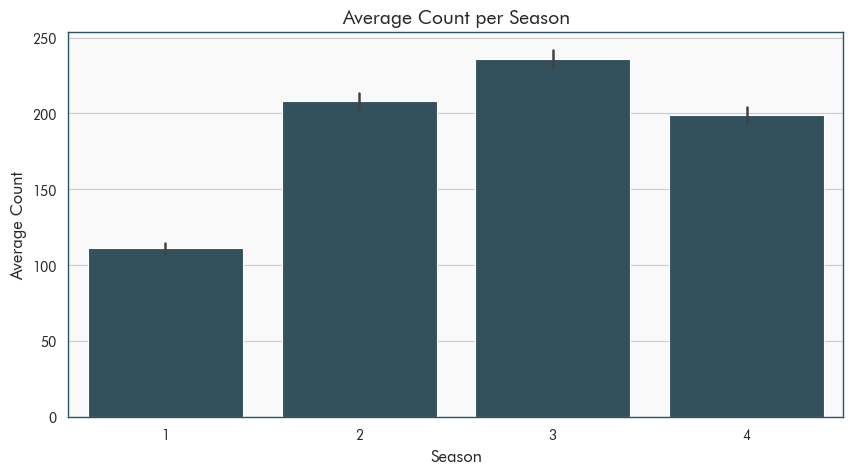

In [382]:
figure, axes = plt.subplots(figsize=(10, 5))

# plot 
sns.barplot(x= 'season_y', y= 'cnt_y' , data=bike_df3)

#title and axes 
plt.title('Average Count per Season')
axes.set_xlabel('Season')
axes.set_ylabel('Average Count')

#grid 
axes.grid(visible=True, which='both', axis='y') 
axes.set_axisbelow(True)
# kenapa axes gabisa dipake disini? bisa
# tambah xticks dan label yticks
plt.xticks(ticks=[0,1,2,3], label=['Spring', 'Summer', 'Fall', 'Winter'])
plt.yticks(range(0,251,50))
plt.show()



#### **1.4**

In [383]:
# Validation

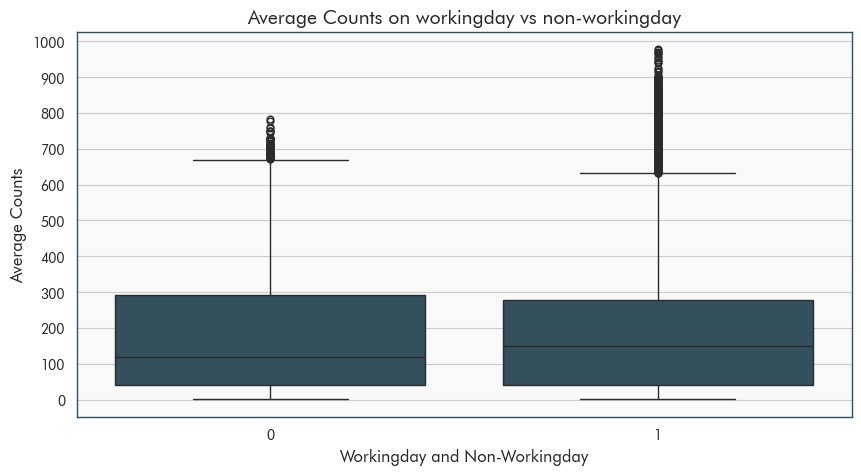

In [384]:
# peminjaman pada hari libur vs hari biasa (boxplot) 

figure, axes = plt.subplots(figsize=(10, 5))

# bikin variabel day = workingday 1, workingday 0
# plot
sns.boxplot(x ='workingday_y', y='cnt_y', data=bike_df3)

# title, axes 
plt.title("Average Counts on workingday vs non-workingday")
axes.set_xlabel("Workingday and Non-Workingday")
axes.set_ylabel("Average Counts")

# grid
axes.grid(visible=True, which='both', axis='y') # menampilkan grid, which='both' artinya untuk major ticks dan minor ticks jika ada, dan axisnya untuk axis=x atau y
axes.set_axisbelow(True) # buat apa? # menampilkan grid, ticks, etc di bawah plot data

# TANYA :Ticks?
plt.yticks(range(0,1001,100))
plt.show()


#### **1.5**

In [385]:
# validation 

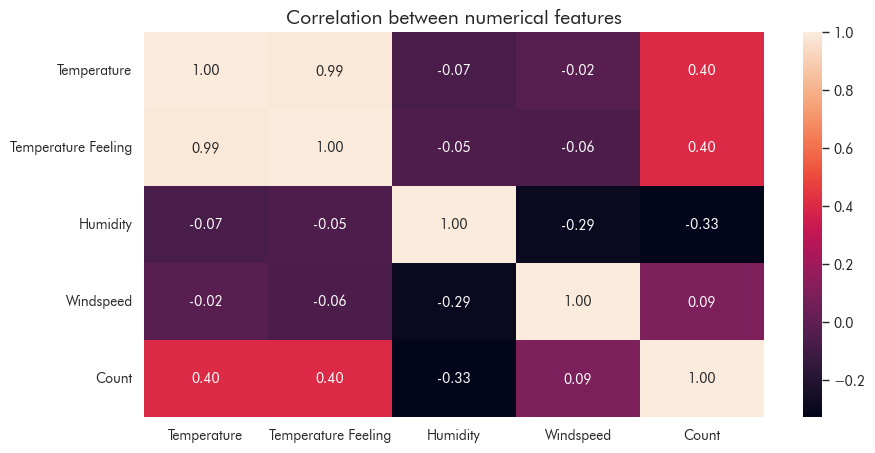

In [386]:
# korelasi antar fitur numerik (heatmap?)
figure, axes = plt.subplots(figsize=(10,5))
# pilih fitur [temp, atemp, hum, windspeed]
feature_toplot = bike_df3[['temp_y', 'atemp_y','hum_y', 'windspeed_y', 'cnt_y']]

# changing name of the plots
corr = feature_toplot.corr()
corr.index = ['Temperature','Temperature Feeling','Humidity','Windspeed','Count']
corr.columns = ['Temperature','Temperature Feeling','Humidity','Windspeed','Count']

# plot
sns.heatmap(corr, annot=True, fmt='.2f') #annot=True itu biar ditampilkan angkanya di kotak-kotak. terus fmt='.2f' itu buat floating point 2 digit, artinya menampilkan 2 angka di belakang koma

# title
plt.title("Correlation between numerical features")
plt.show()


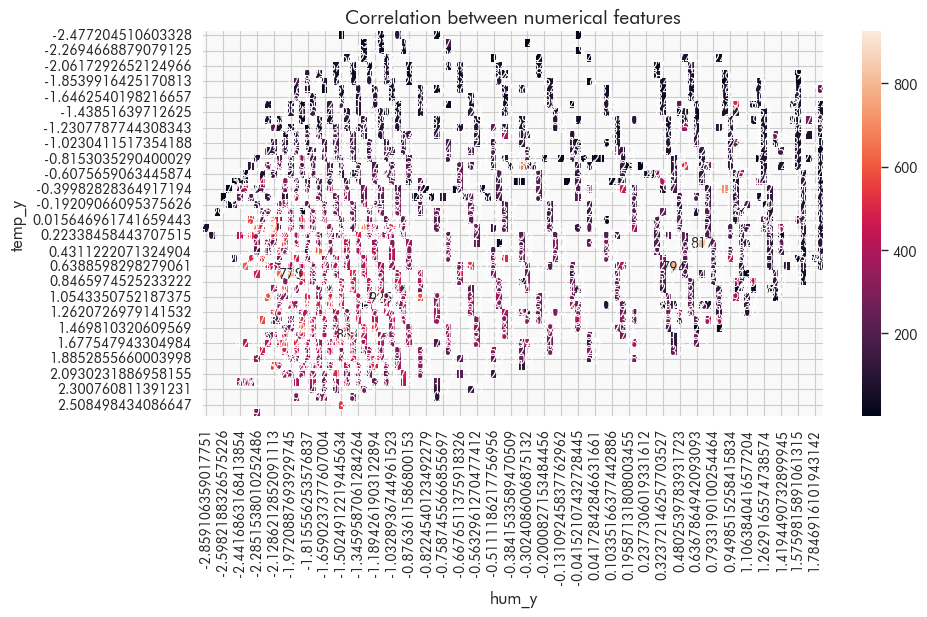

In [ ]:
# korelasi antar fitur numerik (heatmap?) # PIVOT 

figure, axes = plt.subplots(figsize=(10,5))

# pilih fitur [temp, atemp, hum, windspeed]
feature_toplot2 = bike_df3[['temp_y','hum_y', 'cnt_y']]

# pivoted dengan 3 argumen: index, column, values
pivoted = feature_toplot2.pivot_table(index='temp_y', columns='hum_y', values='cnt_y', aggfunc='mean') #aggfunc itu aggregation function yang digunakan untuk menentukan bagaimana cara menggabungkan nilai jika terjadi duplikat untuk kombinasi index dan column

# plot
sns.heatmap(pivoted, annot=True, fmt='.0f') # fmt='d' itu apa? d itu decimal integer

# title
plt.title("Correlation between numerical features")
plt.show()

# TANYA: Kenapa gak bisa?
# jawab: DI sns.heatmap(feature_toplot2.pivot('temp_y', 'hum_y', 'cnt_y'), annot=True, fmt='d') HARUSNYA annot=True, fmt='d' GA DIPAKE SOALNYA ITU FITUR HEATMAP
# kalo mau dimasukin annot=True, fmt='d'kudu dipisah dulu pivotnya ke dalam variabel pivoted
# aneh banget lol wkwk

#### **1.6**

In [396]:
# validation 

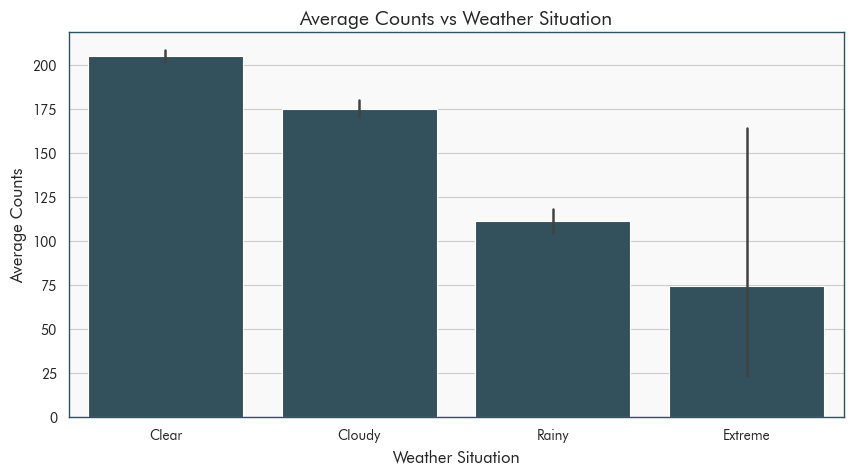

In [389]:
# pemijaman berdasarkan kondisi cuaca (barplot?)
# figure, axes 
figure, axes = plt.subplots(figsize=(10,5))

# plot weathersit vs cnt
sns.barplot(x='weathersit_y', y='cnt_y', data=bike_df3)

# title 
plt.title('Average Counts vs Weather Situation') # penamaannya benar atau tidak? 
axes.set_xlabel('Weather Situation')
axes.set_ylabel('Average Counts')

# grid
axes.grid(visible=True, which='both', axis='y') # menampilkan grid, which='both' artinya untuk major ticks dan minor ticks jika ada, dan axisnya untuk axis=x atau y
axes.set_axisbelow(True) # menampilkan grid, ticks, etc di bawah plot data

#TANYA : keterangan luar buat weathersit 1, 2, 3, 4
plt.xticks(ticks=[0,1,2,3], labels=['Clear', 'Cloudy', 'Rainy', 'Extreme'])
plt.show()

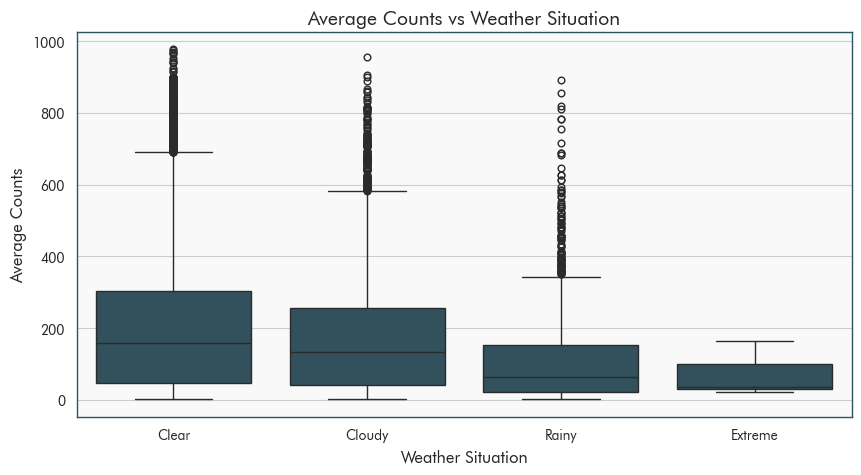

In [390]:
# pemijaman berdasarkan kondisi cuaca (boxplot?)
# figure, axes 
figure, axes = plt.subplots(figsize=(10,5))

# plot weathersit vs cnt
sns.boxplot(x='weathersit_y', y='cnt_y', data=bike_df3)

# title 
plt.title('Average Counts vs Weather Situation') # penamaannya benar atau tidak? 
axes.set_xlabel('Weather Situation')
axes.set_ylabel('Average Counts')

# grid
axes.grid(visible=True, which='both', axis='y') # menampilkan grid, which='both' artinya untuk major ticks dan minor ticks jika ada, dan axisnya untuk axis=x atau y
axes.set_axisbelow(True) # menampilkan grid, ticks, etc di bawah plot data

#TANYA : keterangan luar buat weathersit 1, 2, 3, 4
plt.xticks(ticks=[0,1,2,3], labels=['Clear', 'Cloudy', 'Rainy', 'Extreme'])
plt.show()

In [397]:
bike_df3[bike_df3['weathersit_y']==4]['cnt_y'].mean()

74.33333333333333

### **2.** 

#### **2.1**

In [391]:
# prediction_df harus satu dimensi 

prediction_series = prediction_df['prediction']

In [392]:
prediction_series

0       342.506494
1       134.291682
2       123.968842
3       180.635866
4       171.673735
           ...    
3471     13.164340
3472    242.182460
3473     10.612596
3474    318.069355
3475     70.766042
Name: prediction, Length: 3476, dtype: float64

In [393]:
y_test_forplot = y_test.reset_index(drop=True) #artinya apa drop=True?

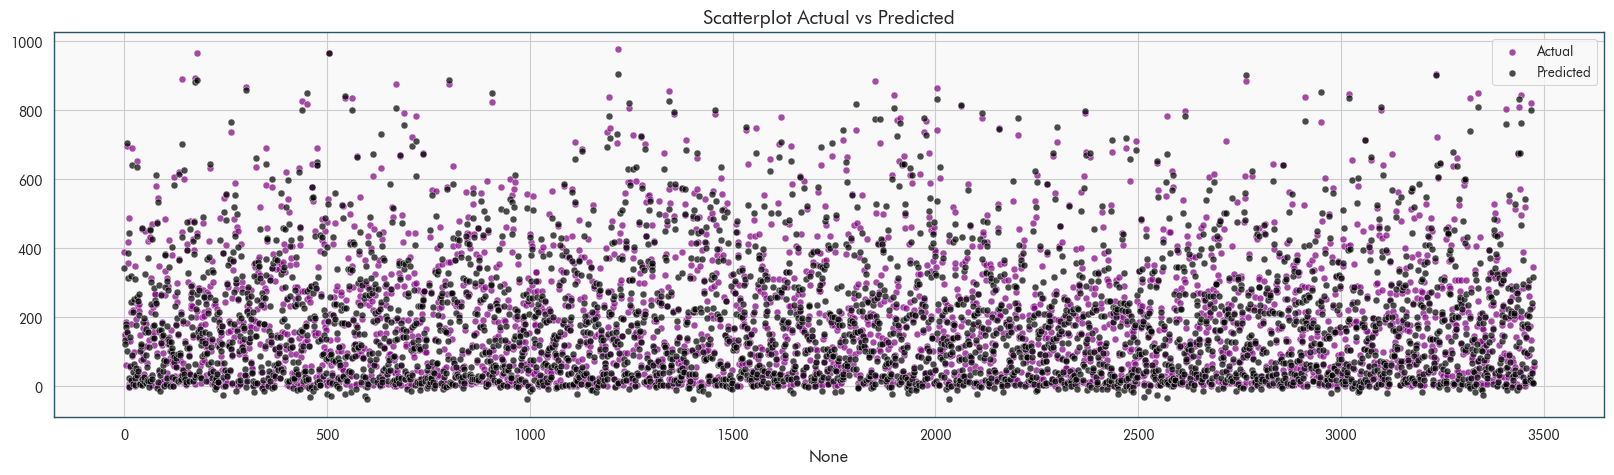

In [408]:
# scatterplot prediksi vs actual 
figure, axes = plt.subplots(figsize=(20,5))

# scatterplot cnt_y
sns.scatterplot(ax=axes, x=y_test_forplot.index, y=y_test_forplot.values, marker='o', alpha=0.7, s=25, color='purple', label='Actual') # alpha untuk transparasi, s untuk size
# scatterplot y_pred
sns.scatterplot(ax=axes, x=prediction_series.index, y=prediction_series.values, marker='o', alpha=0.7, s=25, color='black', label='Predicted')

axes.legend()
plt.title("Scatterplot Actual vs Predicted")
plt.show()

# TANYA : ax=axes buat apa?

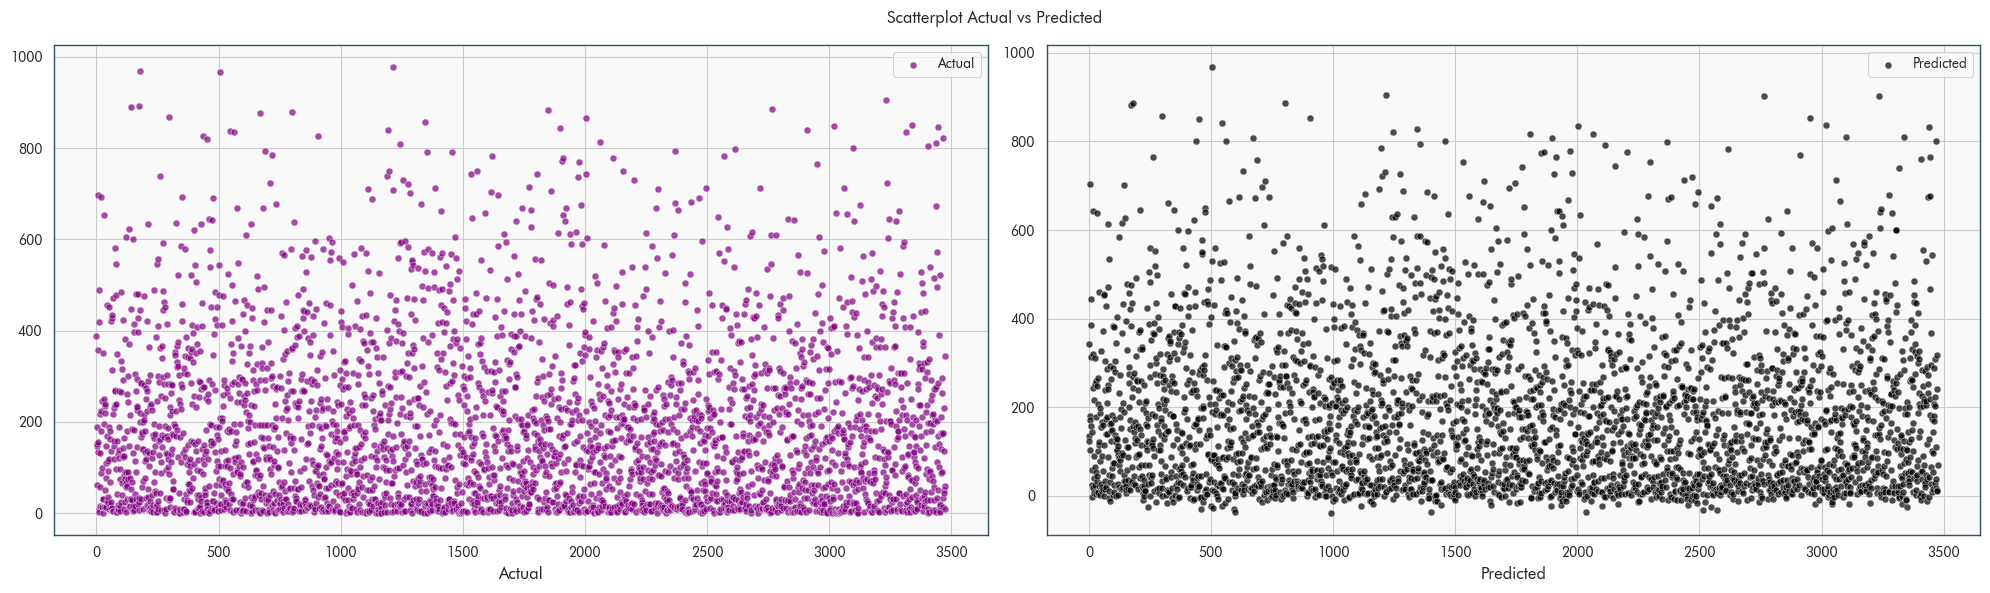

In [414]:
# scatterplot prediksi vs actual 
figure, axes = plt.subplots(1, 2, figsize=(20,6)) #rows, columns,figsize

# scatterplot cnt_y
sns.scatterplot(ax=axes[0], x=y_test_forplot.index, y=y_test_forplot.values, marker='o', alpha=0.7, s=25, color='purple', label='Actual') # alpha untuk transparasi, s untuk size
axes[0].set_xlabel("Actual")
# scatterplot y_pred
sns.scatterplot(ax=axes[1], x=prediction_series.index, y=prediction_series.values, marker='o', alpha=0.7, s=25, color='black', label='Predicted')
axes[1].set_xlabel("Predicted")

plt.suptitle("Scatterplot Actual vs Predicted")
plt.tight_layout()
plt.show()


# TANYA : ax=axes buat apa?
# TANYA : cara bikin subplot kanan kiri atau atas bawah?

#### **2.2**

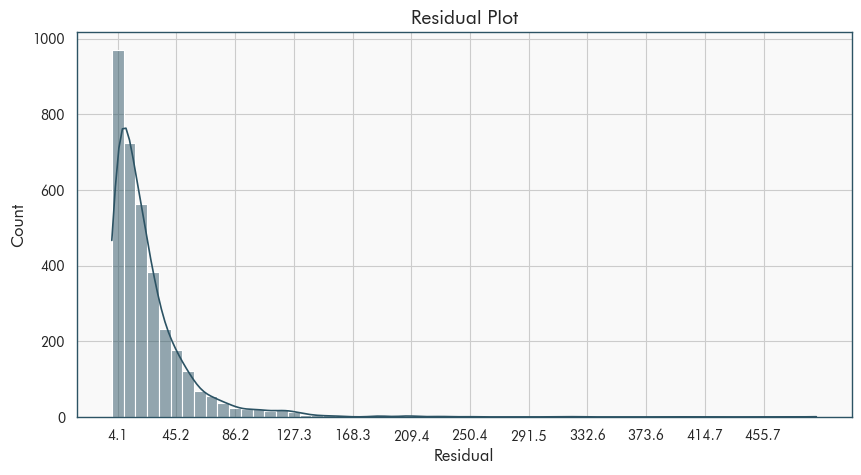

In [419]:
# residual plot (hist)
# figure, axes 
figure, axes = plt.subplots(figsize=(10,5))

# plot 
residual = abs(y_test_forplot - prediction_series)
sns.histplot(data= residual, kde=True, bins=60)

# title 
plt.title('Residual Plot')
axes.set_xlabel('Residual')
axes.set_ylabel('Count')

# grid
axes.grid(visible=True) # menampilkan grid, which='both' artinya untuk major ticks dan minor ticks jika ada, dan axisnya untuk axis=x atau y
axes.set_axisbelow(True) # menampilkan grid, ticks, etc di bawah plot data

# TANYA: cara membuat ticks sesuai dengan bins yang ada
bin_centers = [patch.get_x() + patch.get_width()/2 for patch in axes.patches]
axes.set_xticks(bin_centers[::5])
plt.show()

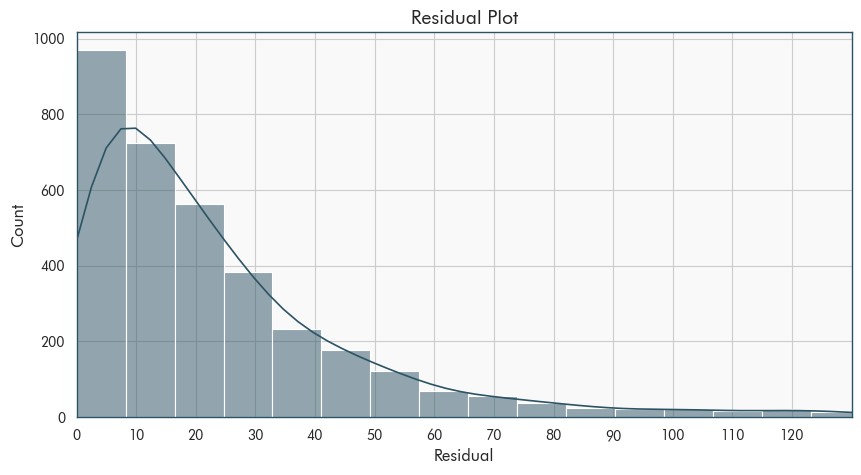

In [422]:
# residual plot (hist)
# figure, axes 
figure, axes = plt.subplots(figsize=(10,5))

# plot 
residual = abs(y_test_forplot - prediction_series)
sns.histplot(data= residual, kde=True, bins=60)

# title 
plt.title('Residual Plot')
axes.set_xlabel('Residual')
axes.set_ylabel('Count')

# grid
axes.grid(visible=True) # menampilkan grid, which='both' artinya untuk major ticks dan minor ticks jika ada, dan axisnya untuk axis=x atau y
axes.set_axisbelow(True) # menampilkan grid, ticks, etc di bawah plot data

# zooming/set limit
axes.set_xlim(0,130)
axes.set_xticks(range(0,121,10))

# TANYA: cara membuat ticks sesuai dengan bins yang ada
# bin_centers = [patch.get_x() + patch.get_width()/2 for patch in axes.patches]
# axes.set_xticks(bin_centers[::5])
plt.show()

### **Making Subplots** 

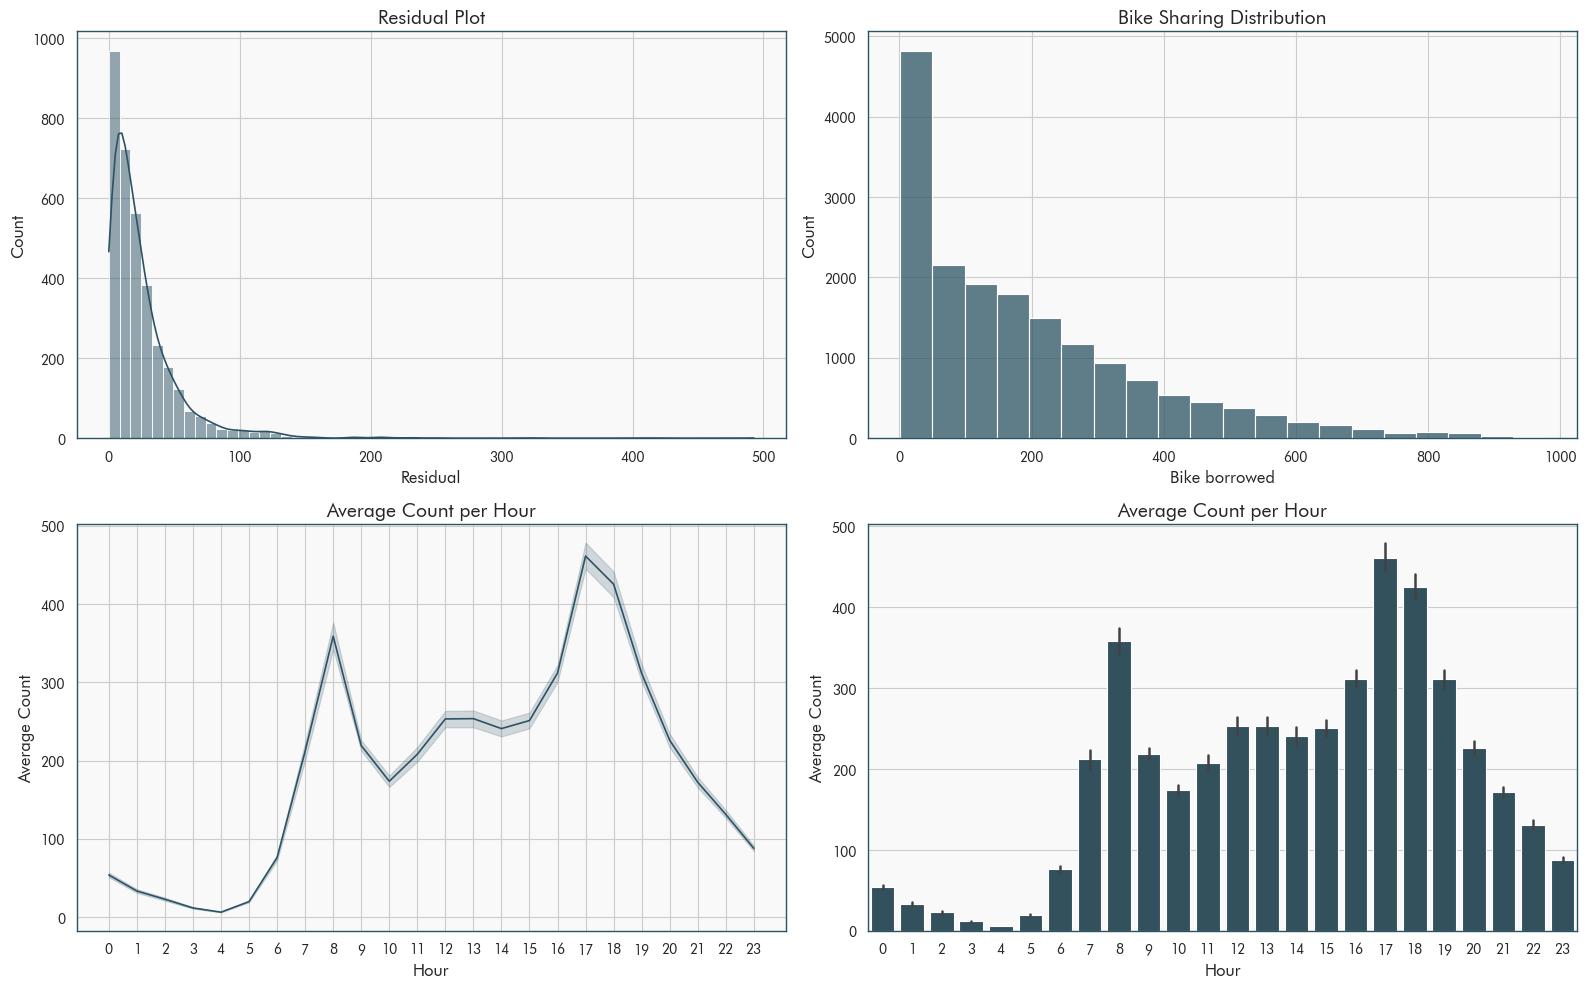

In [ ]:
figure, axs = plt.subplots(2, 2, figsize=(16,10)) # axes jadi array 2D [0,0], [0,1], dst. rows, cols, figsize(x,y)



# SUBPLOT 1

# plot 
residual = abs(y_test_forplot - prediction_series)
sns.histplot(data= residual, kde=True, bins=60, ax=axs[0,0])
# title 
axs[0,0].set_title('Residual Plot')
axs[0,0].set_xlabel('Residual')
axs[0,0].set_ylabel('Count')
# grid
axs[0,0].grid(visible=True)
axs[0,0].set_axisbelow(True)



# SUBPLOT 2

# plot
sns.histplot(
    data=bike_df3,
    x='cnt_y',
    bins=20, 
    legend= True,
    ax=axs[0,1]
)
# title
axs[0,1].set_title("Bike Sharing Distribution")
axs[0,1].set_xlabel("Bike borrowed")
axs[0,1].set_ylabel("Count")
# grid 
axs[0,1].grid(visible=True, axis='x')



# SUBPLOT 3
# plot 
sns.lineplot(x='hr', y='cnt_y', data=bike_df3, ax=axs[1,0]) 
# title 
axs[1,0].set_title('Average Count per Hour')
axs[1,0].set_ylabel("Average Count")
axs[1,0].set_xlabel("Hour")
# grid 
axs[1,0].grid(visible=True, which='both', axis='y') 
axs[1,0].set_axisbelow(True)
# xticks 
axs[1,0].set_xticks(ticks=range(24))



# SUBPLOT 4
# plot
sns.barplot(x='hr', y='cnt_y', data=bike_df3, ax=axs[1,1])
# title 
axs[1,1].set_title('Average Count per Hour')
axs[1,1].set_ylabel("Average Count")
axs[1,1].set_xlabel("Hour")
# gridlines 
axs[1,1].grid(visible=True, which='both', axis='y') 
axs[1,1].set_axisbelow(True)

plt.tight_layout()
plt.show()

#### Commentaries

Kodenya kamu banyak bagian yang membingungkan dan mengandung beberapa kesalahan kritis. Aku bantu bahas dan benarkan satu per satu ya.


---

Masalah-Masalah di Kode Kamu

1. ```plt.subplots()``` vs ```figure.add_subplot()```

Kamu sudah pakai ```figure, axes = plt.subplots(figsize=(10,10))```
Tapi lalu mengabaikan axes dan malah pakai ```figure.add_subplot(...)``` lagi.
Ini justru membuat subplot duplikat dan tidak sinkron.

2. Re-assign objek ```ax1, ax2,``` dst ke hasil ```sns.histplot()```

Kamu overwrite objek ```ax2 = sns.histplot(...),``` padahal harusnya biarkan ax2 adalah axis.

3. axes digunakan untuk semua subplot

Padahal axes hanya berlaku kalau kamu buat banyak subplot lewat ```plt.subplots().```
Kalau kamu pakai ```add_subplot```, kamu harus pakai ```ax1, ax2```, dst untuk ```set_xlabel```, dll.

4. Penempatan dan duplikasi subplot tidak konsisten

```add_subplot(111)``` akan menempati seluruh plot.

```add_subplot(112)``` dan ```add_subplot(212)``` akan saling tabrakan karena 112 berarti 1 baris 1 kolom subplot ke-2 (yang tidak ada).

222 di subplot 4 akan bentrok lagi dengan lainnya.


5. Ada karakter aneh di baris ini:

```ax2 = sns.histplot( data=bike_df3,    x='cnt_y', bins=20,   legend= True,   ax=axes)```

Tanda spasi di sini kelihatannya berasal dari copy-paste dan bukan ASCII normal (mungkin \xa0), jadi Python menganggapnya error syntax.

6. Ini juga error di akhir baris:

```axes.grid(visible=True, which='both', axis='y') axes.set_axisbelow(True)```

Tidak boleh dua perintah tanpa pemisah titik koma atau newline.


---

Saran Perbaikan

Berikut adalah versi perbaikan dari kode kamu:

```import matplotlib.pyplot as plt
import seaborn as sns

# Buat figure dengan 2x2 layout
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # axs jadi array 2D [0,0], [0,1], dst

# SUBPLOT 1 (top-left)
residual = abs(y_test_forplot - prediction_series)
sns.histplot(data=residual, kde=True, bins=60, ax=axs[0, 0])
axs[0, 0].set_title('Residual Plot')
axs[0, 0].set_xlabel('Residual')
axs[0, 0].set_ylabel('Count')
axs[0, 0].grid(True)
axs[0, 0].set_axisbelow(True)

# SUBPLOT 2 (top-right)
sns.histplot(data=bike_df3, x='cnt_y', bins=20, legend=True, ax=axs[0, 1])
axs[0, 1].set_title("Bike Sharing Distribution")
axs[0, 1].set_xlabel("Bike Borrowed")
axs[0, 1].set_ylabel("Count")
axs[0, 1].grid(True, axis='x')

# SUBPLOT 3 (bottom-left)
sns.lineplot(x='hr', y='cnt_y', data=bike_df3, ax=axs[1, 0])
axs[1, 0].set_title('Average Count per Hour')
axs[1, 0].set_xlabel("Hour")
axs[1, 0].set_ylabel("Average Count")
axs[1, 0].grid(True, which='both', axis='y')
axs[1, 0].set_axisbelow(True)
axs[1, 0].set_xticks(range(24))

# SUBPLOT 4 (bottom-right)
sns.barplot(x='hr', y='cnt_y', data=bike_df3, ax=axs[1, 1])
axs[1, 1].set_title('Average Count per Hour')
axs[1, 1].set_xlabel("Hour")
axs[1, 1].set_ylabel("Average Count")
axs[1, 1].grid(True, which='both', axis='y')
axs[1, 1].set_axisbelow(True)

plt.tight_layout()
plt.show()```

---

Catatan Tambahan

```plt.subplots()``` lebih modern dan rapi untuk banyak subplot dibanding ```add_subplot()```.

Kalau kamu ingin layout fleksibel (misal 3 plot vertikal, 1 besar horizontal), gunakan gridspec.

Gunakan ```axs[...]``` untuk mengatur label, grid, dsb, bukan axes global.



---

Kalau kamu ingin versi dengan layout yang tidak simetris (misalnya satu besar di atas dan dua kecil di bawah), aku bisa bantu pakai GridSpec. Mau?

## Pertanyaan 1:

Seberapa besar perbedaan jumlah pengguna sepeda umum pada hari libur (holiday dan weekend) dan hari kerja (weekdays)? Berapa perbandingannya?


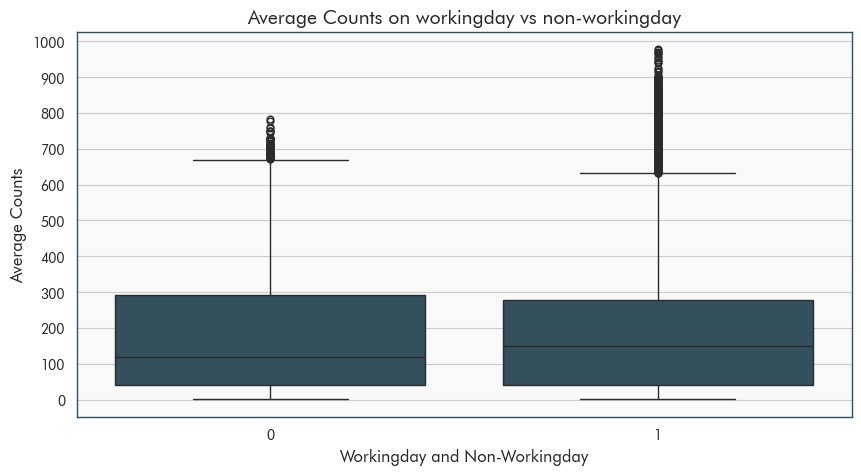

In [423]:
# peminjaman pada hari libur vs hari biasa (boxplot) 

figure, axes = plt.subplots(figsize=(10, 5))

# bikin variabel day = workingday 1, workingday 0
# plot
sns.boxplot(x ='workingday_y', y='cnt_y', data=bike_df3)

# title, axes 
plt.title("Average Counts on workingday vs non-workingday")
axes.set_xlabel("Workingday and Non-Workingday")
axes.set_ylabel("Average Counts")

# grid
axes.grid(visible=True, which='both', axis='y') # menampilkan grid, which='both' artinya untuk major ticks dan minor ticks jika ada, dan axisnya untuk axis=x atau y
axes.set_axisbelow(True) # buat apa? # menampilkan grid, ticks, etc di bawah plot data

# TANYA :Ticks?
plt.yticks(range(0,1001,100))
plt.show()


In [424]:
# perbandingannya 
bike_df3.groupby('workingday_y')['cnt_y'].mean()

workingday_y
0    181.405332
1    193.207754
Name: cnt_y, dtype: float64

In [425]:
# perbandingannya 
bike_df3.groupby('workingday_y')['cnt_y'].median()

workingday_y
0    119.0
1    151.0
Name: cnt_y, dtype: float64

In [428]:
# perbandingannya 
bike_df3.groupby('workingday_y')['cnt_y'].describe()

count        mean         std  min   25%    50%    75%    max
workingday_y                                                                 
0              5514.0  181.405332  172.853832  1.0  40.0  119.0  292.0  783.0
1             11865.0  193.207754  185.107477  1.0  40.0  151.0  277.0  977.0

1. pengguna sepeda hampir seimbang pada hari libur dan hari kerja, namun sedikit lebih tinggi pada hari kerja. berikut mean dan median dari jumlah pengguna sepeda per jam pada hari libur dan hari kerja: 

- hari libur

mean: 181.405332, median: 119.0

- hari kerja
mean: 193.207754, median: 151.0

2. lebih banyak outlier pada hari kerja

analisis lanjutan: 
- outlier disebabkan oleh?
- cek apakah hari minggu termasuk workingday 0?

## Pertanyaan 2:

Kategori cuaca nomor berapa yang memiliki jumlah pengguna sepeda umum paling banyak?

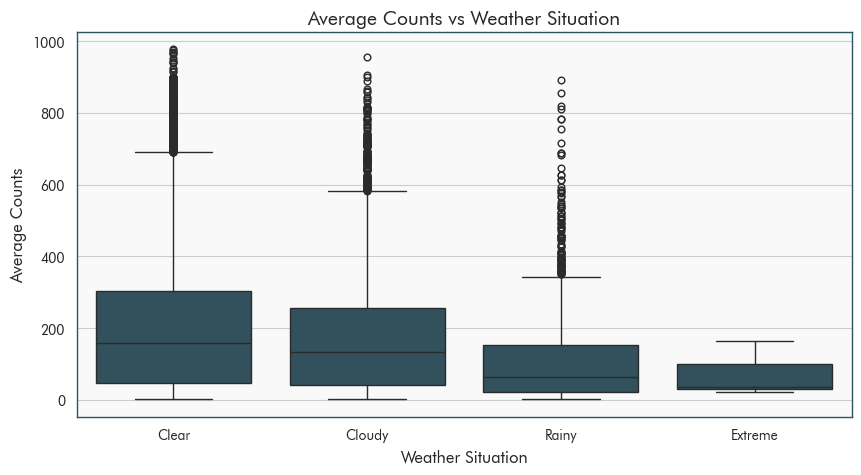

In [432]:
# pemijaman berdasarkan kondisi cuaca (boxplot?)
# figure, axes 
figure, axes = plt.subplots(figsize=(10,5))

# plot weathersit vs cnt
sns.boxplot(x='weathersit_y', y='cnt_y', data=bike_df3)

# title 
plt.title('Average Counts vs Weather Situation') # penamaannya benar atau tidak? 
axes.set_xlabel('Weather Situation')
axes.set_ylabel('Average Counts')

# grid
axes.grid(visible=True, which='both', axis='y') # menampilkan grid, which='both' artinya untuk major ticks dan minor ticks jika ada, dan axisnya untuk axis=x atau y
axes.set_axisbelow(True) # menampilkan grid, ticks, etc di bawah plot data

#TANYA : keterangan luar buat weathersit 1, 2, 3, 4
plt.xticks(ticks=[0,1,2,3], labels=['Clear', 'Cloudy', 'Rainy', 'Extreme'])
plt.show()

Kategori cuaca nomor 1

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2

In [ ]:
#result_temp = bike_df[(bike_df['temp_y'] * 41) <= 14]
#result_temp = bike_df[(bike_df['temp_y'] * 41).between(14, 20, inclusive="left")]
#result_temp = bike_df[(bike_df['temp_y'] * 41).between(20, 27, inclusive = 'left')]
#result_temp = bike_df[(bike_df['temp_y'] * 41) >= 27]

avg_temp_y_per_day = bike_df.groupby('dteday')['temp_y'].mean()



# Tampilkan kolom season_x dari hasil filter
# season_counts = result_temp['season_x'].value_counts()
# print(season_counts)

#season_group = result_temp.groupby('season_x').size()
#print(season_group)

#jam berapa
#hours_group = result_temp.groupby('weathersit_y').size()
#print(hours_group)

# Gabungkan kembali hasil rata-rata dengan temp_x
comparison = bike_df.drop_duplicates(subset='dteday')[['dteday', 'temp_x']].set_index('dteday')
comparison['avg_temp_y'] = avg_temp_y_per_day

# Tambahkan kolom untuk membandingkan
comparison['is_equal'] = comparison['temp_x'].round(6) == comparison['avg_temp_y'].round(6)
#print(comparison)


false_values = comparison[comparison['is_equal'] == False]
print(false_values)

Empty DataFrame
Columns: [temp_x, avg_temp_y, is_equal]
Index: []
